Question: can the effects of cannabis be predicted based on how it smells?

In [33]:
import kaggle
import pandas as pd
import numpy as np
import itertools
from collections import Counter
from collections import defaultdict
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.decomposition import PCA

from random import choices
from random import seed

import matplotlib.pyplot as plt
sns.set_theme()


In [2]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files('nvisagan/cannabis-strains-features', path='./cannabis-strains-features', unzip=True)

In [3]:
data = pd.read_csv('./cannabis-strains-features/Cannabis_Strains_Features.csv')


In [4]:
data


Strain    Type  Rating  \
0             100-Og  hybrid     4.0   
1     98-White-Widow  hybrid     4.7   
2               1024  sativa     4.4   
3           13-Dawgs  hybrid     4.2   
4           24K-Gold  hybrid     4.6   
...              ...     ...     ...   
2346         Zeus-Og  hybrid     4.7   
2347        Zkittlez  indica     4.6   
2348     Zombie-Kush  indica     5.0   
2349       Zombie-Og  indica     4.4   
2350        Zoom-Pie  indica     4.6   

                                         Effects                     Flavor  \
0     Creative,Energetic,Tingly,Euphoric,Relaxed        Earthy,Sweet,Citrus   
1       Relaxed,Aroused,Creative,Happy,Energetic      Flowery,Violet,Diesel   
2      Uplifted,Happy,Relaxed,Energetic,Creative    Spicy/Herbal,Sage,Woody   
3        Tingly,Creative,Hungry,Relaxed,Uplifted  Apricot,Citrus,Grapefruit   
4      Happy,Relaxed,Euphoric,Uplifted,Talkative       Citrus,Earthy,Orange   
...                                          ...                        ...   
2346   Happy,Uplifted,Relaxed,Euphoric,Energetic          Earthy,Woody,Pine   
2347      Relaxed,Happy,Euphoric,Uplifted,Sleepy          Sweet,Berry,Grape   
2348     Relaxed,Sleepy,Talkative,Euphoric,Happy  Earthy,Sweet,Spicy/Herbal   
2349        Relaxed,Sleepy,Euphoric,Happy,Hungry       Sweet,Earthy,Pungent   
2350        Hungry,Relaxed,Uplifted,Happy,Sleepy       Berry,Earthy,Pungent   

                                            Description  
0     $100 OG is a 50/50 hybrid strain that packs a ...  
1     The ‘98 Aloha White Widow is an especially pot...  
2     1024 is a sativa-dominant hybrid bred in Spain...  
3     13 Dawgs is a hybrid of G13 and Chemdawg genet...  
4     Also known as Kosher Tangie, 24k Gold is a 60%...  
...                                                 ...  
2346  Zeus OG is a hybrid cross between Pineapple OG...  
2347  Zkittlez is an indica-dominant mix of Grape Ap...  
2348  Zombie Kush by Ripper Seeds comes from two dif...  
2349  If you’re looking to transform into a flesh-ea...  
2350  Zoom Pie (also known as Zombie Pie) is a heavy...  

[2351 rows x 6 columns]

In [5]:
def cols_for_ranks(col_name):
    ranked_cols_appended = pd.concat([data, data[col_name].str.split(',', expand = True).add_prefix(col_name + '_')], axis = 1)
    return ranked_cols_appended

In [6]:
cols_for_ranks('Flavor')

Strain    Type  Rating  \
0             100-Og  hybrid     4.0   
1     98-White-Widow  hybrid     4.7   
2               1024  sativa     4.4   
3           13-Dawgs  hybrid     4.2   
4           24K-Gold  hybrid     4.6   
...              ...     ...     ...   
2346         Zeus-Og  hybrid     4.7   
2347        Zkittlez  indica     4.6   
2348     Zombie-Kush  indica     5.0   
2349       Zombie-Og  indica     4.4   
2350        Zoom-Pie  indica     4.6   

                                         Effects                     Flavor  \
0     Creative,Energetic,Tingly,Euphoric,Relaxed        Earthy,Sweet,Citrus   
1       Relaxed,Aroused,Creative,Happy,Energetic      Flowery,Violet,Diesel   
2      Uplifted,Happy,Relaxed,Energetic,Creative    Spicy/Herbal,Sage,Woody   
3        Tingly,Creative,Hungry,Relaxed,Uplifted  Apricot,Citrus,Grapefruit   
4      Happy,Relaxed,Euphoric,Uplifted,Talkative       Citrus,Earthy,Orange   
...                                          ...                        ...   
2346   Happy,Uplifted,Relaxed,Euphoric,Energetic          Earthy,Woody,Pine   
2347      Relaxed,Happy,Euphoric,Uplifted,Sleepy          Sweet,Berry,Grape   
2348     Relaxed,Sleepy,Talkative,Euphoric,Happy  Earthy,Sweet,Spicy/Herbal   
2349        Relaxed,Sleepy,Euphoric,Happy,Hungry       Sweet,Earthy,Pungent   
2350        Hungry,Relaxed,Uplifted,Happy,Sleepy       Berry,Earthy,Pungent   

                                            Description      Flavor_0  \
0     $100 OG is a 50/50 hybrid strain that packs a ...        Earthy   
1     The ‘98 Aloha White Widow is an especially pot...       Flowery   
2     1024 is a sativa-dominant hybrid bred in Spain...  Spicy/Herbal   
3     13 Dawgs is a hybrid of G13 and Chemdawg genet...       Apricot   
4     Also known as Kosher Tangie, 24k Gold is a 60%...        Citrus   
...                                                 ...           ...   
2346  Zeus OG is a hybrid cross between Pineapple OG...        Earthy   
2347  Zkittlez is an indica-dominant mix of Grape Ap...         Sweet   
2348  Zombie Kush by Ripper Seeds comes from two dif...        Earthy   
2349  If you’re looking to transform into a flesh-ea...         Sweet   
2350  Zoom Pie (also known as Zombie Pie) is a heavy...         Berry   

     Flavor_1      Flavor_2 Flavor_3  
0       Sweet        Citrus     None  
1      Violet        Diesel     None  
2        Sage         Woody     None  
3      Citrus    Grapefruit     None  
4      Earthy        Orange     None  
...       ...           ...      ...  
2346    Woody          Pine     None  
2347    Berry         Grape     None  
2348    Sweet  Spicy/Herbal     None  
2349   Earthy       Pungent     None  
2350   Earthy       Pungent     None  

[2351 rows x 10 columns]

In [7]:
Counter(cols_for_ranks('Flavor')['Flavor_3']).most_common()

[(None, 2308),
 ('Fruit', 16),
 ('Cheese', 5),
 ('Earthy', 4),
 ('Sweet', 3),
 ('Pine', 3),
 ('Flowery', 2),
 ('Chemical', 1),
 ('Blueberry', 1),
 ('Pineapple', 1),
 ('Pungent', 1),
 ('Berry', 1),
 ('Lemon', 1),
 ('Spicy/Herbal', 1),
 ('Orange', 1),
 ('Grape', 1),
 ('Apricot', 1)]

In [8]:
cols_for_ranks('Flavor')[cols_for_ranks('Flavor')['Flavor'].str.contains('Fruit')].head(5)

Strain    Type  Rating  \
32       Acid-Dough  sativa     5.0   
156  Bc-Sweet-Tooth  indica     4.3   
163    Banana-Candy  indica     4.2   
166     Banana-Kush  hybrid     4.3   
171      Bangi-Haze  sativa     0.0   

                                       Effects                     Flavor  \
32       Talkative,Giggly,Happy,Hungry,Relaxed    Earthy,Woody,Tree Fruit   
156     Uplifted,Happy,Relaxed,Sleepy,Euphoric     Sweet,Honey,Tree,Fruit   
163   Relaxed,Euphoric,Uplifted,Creative,Happy    Tree,Fruit,Earthy,Sweet   
166  Happy,Relaxed,Euphoric,Uplifted,Talkative  Sweet,Tropical,Tree,Fruit   
171           Aroused,Uplifted,Euphoric,Hungry    Berry,Tree,Fruit,Cheese   

                                           Description Flavor_0  Flavor_1  \
32   Acid Dough by Ripper Seeds is a sativa-dominan...   Earthy     Woody   
156  Developed in British Columbia by BC Bud Depot,...    Sweet     Honey   
163  Banana Candy is classified as a Indica cannabi...     Tree     Fruit   
166  This legendary West Coast strain crosses Ghost...    Sweet  Tropical   
171  Bangi Haze by Ace Seeds is an energetic sativa...    Berry      Tree   

       Flavor_2 Flavor_3  
32   Tree Fruit     None  
156        Tree    Fruit  
163      Earthy    Sweet  
166        Tree    Fruit  
171       Fruit   Cheese

In [9]:
cols_for_ranks('Flavor')[cols_for_ranks('Flavor')['Flavor'].str.contains(' ')]

Strain    Type  Rating  \
5                   3-Bears-Og  indica     4.4   
32                  Acid-Dough  sativa     5.0   
106         Amnesia-Ganja-Haze  sativa     5.0   
1237  Las-Vegas-Purple-Kush-Bx  indica     5.0   

                                       Effects                      Flavor  \
5     Relaxed,Happy,Sleepy,Creative,Euphoric\n      Sweet, Pungent, Earthy   
32       Talkative,Giggly,Happy,Hungry,Relaxed     Earthy,Woody,Tree Fruit   
106                          Euphoric, Relaxed         Spicy/Herbal, Sweet   
1237     Sleepy,Happy,Relaxed,Aroused,Creative  Sweet, Berry, Spicy/Herbal   

                                            Description      Flavor_0  \
5     3 Bears OG by Mephisto Genetics is an autoflow...         Sweet   
32    Acid Dough by Ripper Seeds is a sativa-dominan...        Earthy   
106   Amnesia Ganja Haze is another award-winning st...  Spicy/Herbal   
1237  Las Vegas Purple Kush BX is a clone-only strai...         Sweet   

      Flavor_1       Flavor_2 Flavor_3  
5      Pungent         Earthy     None  
32       Woody     Tree Fruit     None  
106      Sweet           None     None  
1237     Berry   Spicy/Herbal     None

In [10]:
data['Flavor'] = data['Flavor'].str.replace(' ', '')
data['Flavor'] = data['Flavor'].str.replace('Tree,Fruit', 'TreeFruit')
cols_for_ranks('Flavor')

Strain    Type  Rating  \
0             100-Og  hybrid     4.0   
1     98-White-Widow  hybrid     4.7   
2               1024  sativa     4.4   
3           13-Dawgs  hybrid     4.2   
4           24K-Gold  hybrid     4.6   
...              ...     ...     ...   
2346         Zeus-Og  hybrid     4.7   
2347        Zkittlez  indica     4.6   
2348     Zombie-Kush  indica     5.0   
2349       Zombie-Og  indica     4.4   
2350        Zoom-Pie  indica     4.6   

                                         Effects                     Flavor  \
0     Creative,Energetic,Tingly,Euphoric,Relaxed        Earthy,Sweet,Citrus   
1       Relaxed,Aroused,Creative,Happy,Energetic      Flowery,Violet,Diesel   
2      Uplifted,Happy,Relaxed,Energetic,Creative    Spicy/Herbal,Sage,Woody   
3        Tingly,Creative,Hungry,Relaxed,Uplifted  Apricot,Citrus,Grapefruit   
4      Happy,Relaxed,Euphoric,Uplifted,Talkative       Citrus,Earthy,Orange   
...                                          ...                        ...   
2346   Happy,Uplifted,Relaxed,Euphoric,Energetic          Earthy,Woody,Pine   
2347      Relaxed,Happy,Euphoric,Uplifted,Sleepy          Sweet,Berry,Grape   
2348     Relaxed,Sleepy,Talkative,Euphoric,Happy  Earthy,Sweet,Spicy/Herbal   
2349        Relaxed,Sleepy,Euphoric,Happy,Hungry       Sweet,Earthy,Pungent   
2350        Hungry,Relaxed,Uplifted,Happy,Sleepy       Berry,Earthy,Pungent   

                                            Description      Flavor_0  \
0     $100 OG is a 50/50 hybrid strain that packs a ...        Earthy   
1     The ‘98 Aloha White Widow is an especially pot...       Flowery   
2     1024 is a sativa-dominant hybrid bred in Spain...  Spicy/Herbal   
3     13 Dawgs is a hybrid of G13 and Chemdawg genet...       Apricot   
4     Also known as Kosher Tangie, 24k Gold is a 60%...        Citrus   
...                                                 ...           ...   
2346  Zeus OG is a hybrid cross between Pineapple OG...        Earthy   
2347  Zkittlez is an indica-dominant mix of Grape Ap...         Sweet   
2348  Zombie Kush by Ripper Seeds comes from two dif...        Earthy   
2349  If you’re looking to transform into a flesh-ea...         Sweet   
2350  Zoom Pie (also known as Zombie Pie) is a heavy...         Berry   

     Flavor_1      Flavor_2 Flavor_3  
0       Sweet        Citrus     None  
1      Violet        Diesel     None  
2        Sage         Woody     None  
3      Citrus    Grapefruit     None  
4      Earthy        Orange     None  
...       ...           ...      ...  
2346    Woody          Pine     None  
2347    Berry         Grape     None  
2348    Sweet  Spicy/Herbal     None  
2349   Earthy       Pungent     None  
2350   Earthy       Pungent     None  

[2351 rows x 10 columns]

In [11]:
Counter(cols_for_ranks('Flavor')['Flavor_3']).most_common()

[(None, 2342),
 ('Cheese', 4),
 ('Earthy', 2),
 ('Chemical', 1),
 ('Blueberry', 1),
 ('Pungent', 1)]

In [12]:
cols_for_ranks('Flavor')[cols_for_ranks('Flavor')['Flavor_3'] == 'Cheese']

Strain    Type  Rating  \
195   Bettie-Page  hybrid     4.2   
466      Cat-Piss  sativa     3.9   
1141    Josh-D-Og  indica     3.7   
2330    X-Tra-Chz  hybrid     4.0   

                                           Effects  \
195   Creative,Uplifted,Energetic,Euphoric,Relaxed   
466      Happy,Uplifted,Euphoric,Relaxed,Talkative   
1141     Aroused,Tingly,Uplifted,Creative,Euphoric   
2330         Sleepy,Uplifted,Euphoric,Happy,Hungry   

                           Flavor  \
195      Earthy,Sweet,Blue,Cheese   
466      Earthy,Woody,Blue,Cheese   
1141  Berry,Blueberry,Blue,Cheese   
2330    Pungent,Skunk,Blue,Cheese   

                                            Description Flavor_0   Flavor_1  \
195   Bettie Page, grown by Liberty Reach Farms in W...   Earthy      Sweet   
466   Originally a clone-only phenotype of Super Sil...   Earthy      Woody   
1141  Josh D OG by Karma Genetics is a handcrafted O...    Berry  Blueberry   
2330  X-tra Chz, bred by MTG Seeds, is a hybrid cros...  Pungent      Skunk   

     Flavor_2 Flavor_3  
195      Blue   Cheese  
466      Blue   Cheese  
1141     Blue   Cheese  
2330     Blue   Cheese

In [13]:
data['Flavor'] = data['Flavor'].str.replace('Blue,Cheese', 'BlueCheese')
cols_for_ranks('Flavor')

Strain    Type  Rating  \
0             100-Og  hybrid     4.0   
1     98-White-Widow  hybrid     4.7   
2               1024  sativa     4.4   
3           13-Dawgs  hybrid     4.2   
4           24K-Gold  hybrid     4.6   
...              ...     ...     ...   
2346         Zeus-Og  hybrid     4.7   
2347        Zkittlez  indica     4.6   
2348     Zombie-Kush  indica     5.0   
2349       Zombie-Og  indica     4.4   
2350        Zoom-Pie  indica     4.6   

                                         Effects                     Flavor  \
0     Creative,Energetic,Tingly,Euphoric,Relaxed        Earthy,Sweet,Citrus   
1       Relaxed,Aroused,Creative,Happy,Energetic      Flowery,Violet,Diesel   
2      Uplifted,Happy,Relaxed,Energetic,Creative    Spicy/Herbal,Sage,Woody   
3        Tingly,Creative,Hungry,Relaxed,Uplifted  Apricot,Citrus,Grapefruit   
4      Happy,Relaxed,Euphoric,Uplifted,Talkative       Citrus,Earthy,Orange   
...                                          ...                        ...   
2346   Happy,Uplifted,Relaxed,Euphoric,Energetic          Earthy,Woody,Pine   
2347      Relaxed,Happy,Euphoric,Uplifted,Sleepy          Sweet,Berry,Grape   
2348     Relaxed,Sleepy,Talkative,Euphoric,Happy  Earthy,Sweet,Spicy/Herbal   
2349        Relaxed,Sleepy,Euphoric,Happy,Hungry       Sweet,Earthy,Pungent   
2350        Hungry,Relaxed,Uplifted,Happy,Sleepy       Berry,Earthy,Pungent   

                                            Description      Flavor_0  \
0     $100 OG is a 50/50 hybrid strain that packs a ...        Earthy   
1     The ‘98 Aloha White Widow is an especially pot...       Flowery   
2     1024 is a sativa-dominant hybrid bred in Spain...  Spicy/Herbal   
3     13 Dawgs is a hybrid of G13 and Chemdawg genet...       Apricot   
4     Also known as Kosher Tangie, 24k Gold is a 60%...        Citrus   
...                                                 ...           ...   
2346  Zeus OG is a hybrid cross between Pineapple OG...        Earthy   
2347  Zkittlez is an indica-dominant mix of Grape Ap...         Sweet   
2348  Zombie Kush by Ripper Seeds comes from two dif...        Earthy   
2349  If you’re looking to transform into a flesh-ea...         Sweet   
2350  Zoom Pie (also known as Zombie Pie) is a heavy...         Berry   

     Flavor_1      Flavor_2  
0       Sweet        Citrus  
1      Violet        Diesel  
2        Sage         Woody  
3      Citrus    Grapefruit  
4      Earthy        Orange  
...       ...           ...  
2346    Woody          Pine  
2347    Berry         Grape  
2348    Sweet  Spicy/Herbal  
2349   Earthy       Pungent  
2350   Earthy       Pungent  

[2351 rows x 9 columns]

In [14]:
set(cols_for_ranks('Flavor')['Flavor_1'])

{'Ammonia',
 'Apple',
 'Apricot',
 'Berry',
 'Berry\n',
 'Bluberry',
 'BlueCheese',
 'Blueberry',
 'Butter',
 'Cheese',
 'Chemical',
 'Chestnut',
 'Citrus',
 'Citrus\n',
 'Coffee',
 'Diesel',
 'Earthy',
 'Earthy\n',
 'Flowery',
 'Grape',
 'Grapefruit',
 'Honey',
 'Lavender',
 'Lemon',
 'Lime',
 'Mango',
 'Menthol',
 'Mint',
 'Minty',
 None,
 'Nutty',
 'Orange',
 'Pear',
 'Pepper',
 'Pine',
 'Pineapple',
 'Plum',
 'Pungent',
 'Rose',
 'Sage',
 'Skunk',
 'Spicy/Herbal',
 'Strawberry',
 'Sweet',
 'Sweet\n',
 'Tea',
 'Tobacco',
 'TreeFruit',
 'Tropical',
 'Vanilla',
 'Violet',
 'Woody'}

In [15]:
data['Flavor'] = data['Flavor'].str.replace('\n', '')
data['Flavor'] = data['Flavor'].str.replace('Bluberry', 'Blueberry')
data['Flavor'] = data['Flavor'].str.replace('Grapes', 'Grape')
data['Flavor'] = data['Flavor'].str.replace('Minty', 'Mint')
data.drop(data[data.Flavor.str.contains('None')].index, axis = 0, inplace = True)
cols_for_ranks('Flavor')

Strain    Type  Rating  \
0             100-Og  hybrid     4.0   
1     98-White-Widow  hybrid     4.7   
2               1024  sativa     4.4   
3           13-Dawgs  hybrid     4.2   
4           24K-Gold  hybrid     4.6   
...              ...     ...     ...   
2346         Zeus-Og  hybrid     4.7   
2347        Zkittlez  indica     4.6   
2348     Zombie-Kush  indica     5.0   
2349       Zombie-Og  indica     4.4   
2350        Zoom-Pie  indica     4.6   

                                         Effects                     Flavor  \
0     Creative,Energetic,Tingly,Euphoric,Relaxed        Earthy,Sweet,Citrus   
1       Relaxed,Aroused,Creative,Happy,Energetic      Flowery,Violet,Diesel   
2      Uplifted,Happy,Relaxed,Energetic,Creative    Spicy/Herbal,Sage,Woody   
3        Tingly,Creative,Hungry,Relaxed,Uplifted  Apricot,Citrus,Grapefruit   
4      Happy,Relaxed,Euphoric,Uplifted,Talkative       Citrus,Earthy,Orange   
...                                          ...                        ...   
2346   Happy,Uplifted,Relaxed,Euphoric,Energetic          Earthy,Woody,Pine   
2347      Relaxed,Happy,Euphoric,Uplifted,Sleepy          Sweet,Berry,Grape   
2348     Relaxed,Sleepy,Talkative,Euphoric,Happy  Earthy,Sweet,Spicy/Herbal   
2349        Relaxed,Sleepy,Euphoric,Happy,Hungry       Sweet,Earthy,Pungent   
2350        Hungry,Relaxed,Uplifted,Happy,Sleepy       Berry,Earthy,Pungent   

                                            Description      Flavor_0  \
0     $100 OG is a 50/50 hybrid strain that packs a ...        Earthy   
1     The ‘98 Aloha White Widow is an especially pot...       Flowery   
2     1024 is a sativa-dominant hybrid bred in Spain...  Spicy/Herbal   
3     13 Dawgs is a hybrid of G13 and Chemdawg genet...       Apricot   
4     Also known as Kosher Tangie, 24k Gold is a 60%...        Citrus   
...                                                 ...           ...   
2346  Zeus OG is a hybrid cross between Pineapple OG...        Earthy   
2347  Zkittlez is an indica-dominant mix of Grape Ap...         Sweet   
2348  Zombie Kush by Ripper Seeds comes from two dif...        Earthy   
2349  If you’re looking to transform into a flesh-ea...         Sweet   
2350  Zoom Pie (also known as Zombie Pie) is a heavy...         Berry   

     Flavor_1      Flavor_2  
0       Sweet        Citrus  
1      Violet        Diesel  
2        Sage         Woody  
3      Citrus    Grapefruit  
4      Earthy        Orange  
...       ...           ...  
2346    Woody          Pine  
2347    Berry         Grape  
2348    Sweet  Spicy/Herbal  
2349   Earthy       Pungent  
2350   Earthy       Pungent  

[2307 rows x 9 columns]

In [16]:
cols_for_ranks('Effects')

Strain    Type  Rating  \
0             100-Og  hybrid     4.0   
1     98-White-Widow  hybrid     4.7   
2               1024  sativa     4.4   
3           13-Dawgs  hybrid     4.2   
4           24K-Gold  hybrid     4.6   
...              ...     ...     ...   
2346         Zeus-Og  hybrid     4.7   
2347        Zkittlez  indica     4.6   
2348     Zombie-Kush  indica     5.0   
2349       Zombie-Og  indica     4.4   
2350        Zoom-Pie  indica     4.6   

                                         Effects                     Flavor  \
0     Creative,Energetic,Tingly,Euphoric,Relaxed        Earthy,Sweet,Citrus   
1       Relaxed,Aroused,Creative,Happy,Energetic      Flowery,Violet,Diesel   
2      Uplifted,Happy,Relaxed,Energetic,Creative    Spicy/Herbal,Sage,Woody   
3        Tingly,Creative,Hungry,Relaxed,Uplifted  Apricot,Citrus,Grapefruit   
4      Happy,Relaxed,Euphoric,Uplifted,Talkative       Citrus,Earthy,Orange   
...                                          ...                        ...   
2346   Happy,Uplifted,Relaxed,Euphoric,Energetic          Earthy,Woody,Pine   
2347      Relaxed,Happy,Euphoric,Uplifted,Sleepy          Sweet,Berry,Grape   
2348     Relaxed,Sleepy,Talkative,Euphoric,Happy  Earthy,Sweet,Spicy/Herbal   
2349        Relaxed,Sleepy,Euphoric,Happy,Hungry       Sweet,Earthy,Pungent   
2350        Hungry,Relaxed,Uplifted,Happy,Sleepy       Berry,Earthy,Pungent   

                                            Description Effects_0  Effects_1  \
0     $100 OG is a 50/50 hybrid strain that packs a ...  Creative  Energetic   
1     The ‘98 Aloha White Widow is an especially pot...   Relaxed    Aroused   
2     1024 is a sativa-dominant hybrid bred in Spain...  Uplifted      Happy   
3     13 Dawgs is a hybrid of G13 and Chemdawg genet...    Tingly   Creative   
4     Also known as Kosher Tangie, 24k Gold is a 60%...     Happy    Relaxed   
...                                                 ...       ...        ...   
2346  Zeus OG is a hybrid cross between Pineapple OG...     Happy   Uplifted   
2347  Zkittlez is an indica-dominant mix of Grape Ap...   Relaxed      Happy   
2348  Zombie Kush by Ripper Seeds comes from two dif...   Relaxed     Sleepy   
2349  If you’re looking to transform into a flesh-ea...   Relaxed     Sleepy   
2350  Zoom Pie (also known as Zombie Pie) is a heavy...    Hungry    Relaxed   

      Effects_2  Effects_3  Effects_4  
0        Tingly   Euphoric    Relaxed  
1      Creative      Happy  Energetic  
2       Relaxed  Energetic   Creative  
3        Hungry    Relaxed   Uplifted  
4      Euphoric   Uplifted  Talkative  
...         ...        ...        ...  
2346    Relaxed   Euphoric  Energetic  
2347   Euphoric   Uplifted     Sleepy  
2348  Talkative   Euphoric      Happy  
2349   Euphoric      Happy     Hungry  
2350   Uplifted      Happy     Sleepy  

[2307 rows x 11 columns]

In [17]:
data['Effects'] = data['Effects'].str.replace('\n', '')
data['Effects'] = data['Effects'].str.replace(' ', '')
data['Effects'] = data['Effects'].str.replace('Dry,Mouth', 'DryMouth')
data['Effects'] = data['Effects'].str.replace('Energentic', 'Energetic')

data.drop(data[data.Effects.str.contains('None')].index, axis = 0, inplace = True)

In [18]:
def binarize_data(col_name, var_type):
    binarizer = MultiLabelBinarizer()
    bin_data = pd.DataFrame(binarizer.fit_transform(data[col_name].str.split(',')), columns=binarizer.classes_, index=data.index).add_prefix(var_type + '_')
    return bin_data


In [19]:
features = binarize_data('Flavor', 'feature')
targets = binarize_data('Effects', 'target')
targets = targets.drop(['target_DryMouth'], axis = 1)

Question: Which features cooccur most often?

In [ ]:
# features_bootstrap = features.sample(n=len(features)*100, replace=True, random_state=10)

In [246]:
#generate df of conditional probabilities between all pairs (bootstrap)

total = len(features)
event_base_df = pd.DataFrame()
ratios_df = pd.DataFrame()
 
for i in range(100):
    print('iteration: ' + str(i))
    features_bootstrap = features.sample(n=1000, replace=True, random_state=i)
    labels = []
    ratios = []
    event = []
    cond_event = []
    event_base = []
    for A in features_bootstrap.columns:
        for B in features_bootstrap.columns:
            #print('Pr(' + B + ' | ' + A + ')')
            event.append(B)
            cond_event.append(A)
            labels.append('Pr(' + B + ' | ' + A + ')')
            given_A = features_bootstrap[features_bootstrap[A] == 1].sum()
            prob = given_A[B]/given_A[A]
            event_br = len(features_bootstrap[(features_bootstrap[B] == 1)])/total
            event_base.append(event_br)
            ratios.append(prob/event_br)
            
    event_base_df[str(i)] = event_base
    ratios_df[str(i)] = ratios
            
            

iteration: 0


/home/cleber/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
/home/cleber/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in long_scalars


iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
iteration: 46
iteration: 47
iteration: 48
iteration: 49
iteration: 50
iteration: 51
iteration: 52
iteration: 53
iteration: 54
iteration: 55
iteration: 56
iteration: 57
iteration: 58
iteration: 59
iteration: 60
iteration: 61
iteration: 62
iteration: 63
iteration: 64
iteration: 65
iteration: 66
iteration: 67
iteration: 68
iteration: 69
iteration: 70
iteration: 71
iteration: 72
i

In [247]:
Pr_data = pd.DataFrame()
Pr_data['labels'] = labels
Pr_data['events'] = event
Pr_data['cond_events'] = cond_event
Pr_data['event_base'] = event_base_df.T.mean()
Pr_data['ratios'] = ratios_df.T.mean()


Pr_data#[(Pr_data['probs'] < 1) & (Pr_data['events'] == 'feature_Apple')].sort_values(by='ratios', ascending=False).head(50)

labels              events  \
0        Pr(feature_Ammonia | feature_Ammonia)     feature_Ammonia   
1          Pr(feature_Apple | feature_Ammonia)       feature_Apple   
2        Pr(feature_Apricot | feature_Ammonia)     feature_Apricot   
3          Pr(feature_Berry | feature_Ammonia)       feature_Berry   
4     Pr(feature_BlueCheese | feature_Ammonia)  feature_BlueCheese   
...                                        ...                 ...   
2299     Pr(feature_TreeFruit | feature_Woody)   feature_TreeFruit   
2300      Pr(feature_Tropical | feature_Woody)    feature_Tropical   
2301       Pr(feature_Vanilla | feature_Woody)     feature_Vanilla   
2302        Pr(feature_Violet | feature_Woody)      feature_Violet   
2303         Pr(feature_Woody | feature_Woody)       feature_Woody   

          cond_events  event_base      ratios  
0     feature_Ammonia    0.006192  172.885965  
1     feature_Ammonia    0.003268    0.000000  
2     feature_Ammonia    0.001765    0.000000  
3     feature_Ammonia    0.069054    0.516375  
4     feature_Ammonia    0.001691    0.000000  
...               ...         ...         ...  
2299    feature_Woody    0.006654    0.571478  
2300    feature_Woody    0.029490    0.545340  
2301    feature_Woody    0.006749    1.729820  
2302    feature_Woody    0.001294    2.360937  
2303    feature_Woody    0.049861   20.247317  

[2304 rows x 5 columns]

In [273]:
features_mod = features.copy(deep=True)
features_mod

feature_Ammonia  feature_Apple  feature_Apricot  feature_Berry  \
0                   0              0                0              0   
1                   0              0                0              0   
2                   0              0                0              0   
3                   0              0                1              0   
4                   0              0                0              0   
...               ...            ...              ...            ...   
2346                0              0                0              0   
2347                0              0                0              1   
2348                0              0                0              0   
2349                0              0                0              0   
2350                0              0                0              1   

      feature_BlueCheese  feature_Blueberry  feature_Bubblegum  \
0                      0                  0                  0   
1                      0                  0                  0   
2                      0                  0                  0   
3                      0                  0                  0   
4                      0                  0                  0   
...                  ...                ...                ...   
2346                   0                  0                  0   
2347                   0                  0                  0   
2348                   0                  0                  0   
2349                   0                  0                  0   
2350                   0                  0                  0   

      feature_Butter  feature_Cheese  feature_Chemical  ...  \
0                  0               0                 0  ...   
1                  0               0                 0  ...   
2                  0               0                 0  ...   
3                  0               0                 0  ...   
4                  0               0                 0  ...   
...              ...             ...               ...  ...   
2346               0               0                 0  ...   
2347               0               0                 0  ...   
2348               0               0                 0  ...   
2349               0               0                 0  ...   
2350               0               0                 0  ...   

      feature_Strawberry  feature_Sweet  feature_Tar  feature_Tea  \
0                      0              1            0            0   
1                      0              0            0            0   
2                      0              0            0            0   
3                      0              0            0            0   
4                      0              0            0            0   
...                  ...            ...          ...          ...   
2346                   0              0            0            0   
2347                   0              1            0            0   
2348                   0              1            0            0   
2349                   0              1            0            0   
2350                   0              0            0            0   

      feature_Tobacco  feature_TreeFruit  feature_Tropical  feature_Vanilla  \
0                   0                  0                 0                0   
1                   0                  0                 0                0   
2                   0                  0                 0                0   
3                   0                  0                 0                0   
4                   0                  0                 0                0   
...               ...                ...               ...              ...   
2346                0                  0                 0                0   
2347                0                  0                 0                0   
2348                0                  0           

In [307]:
for row in features_mod.index:
    true_feats = list(features_mod.columns[features_mod.loc[row] == 1])
    for col in features_mod.columns:
        if features_mod[col].loc[row] == 0:
            features_mod[col].loc[row] = np.prod(list(Pr_data[Pr_data['cond_events'].isin(true_feats)][Pr_data['events']==col]['ratios']))*Pr_data[Pr_data['events']==col]['event_base'].values[0]
            print(np.prod(list(Pr_data[Pr_data['cond_events'].isin(true_feats)][Pr_data['events']==col]['ratios']))*Pr_data[Pr_data['events']==col]['event_base'].values[0])


features_mod

/home/cleber/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/cleber/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/cleber/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0.012790119337159579
0.0
0.003921865438878899
0.21770633347339374
0.0
0.03286774149883231
0.0
0.017441329505162598
0.018516594333190504
0.01729341633989034
0.0031857640294535527
0.006862862433767442
0.2072363331821557
0.25640925428019545
0.03871532798034689
0.07870826674443596
0.009315645514986313
0.01971105081367846
0.37902922202537276
0.07665662069361834
0.03174648363021092
0.0018182988872188098
0.0345782883519929
0.0098036618142967
0.16720119912729042
0.004224362910658014
0.0
0.032129602027926744
0.319602147701555
0.019320399138886078
0.0
0.4528456507106414
0.012336997821500568
0.014438737571057838
0.09746867834784664
0.15941362275665766
0.024940282883019072
0.0
0.011063417857407961
0.0
0.017058589682510755
0.17283853768595636
0.006547558038312208
0.0006183221549704224
0.18204145266990268
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.23670696636587524
0.0
0.6013797779645905
0.3961363095254427
0.0
0.0
0.0
0.0
0.0
0.0
0.6361625028901619
0.3474833045353903
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0

0.0
0.042827574617356416
0.0
0.0
0.22692330289136933
0.13806242849562922
0.0
0.8653107949050152
0.0
0.05495699603507408
0.0017236864399001542
0.0
0.0
0.14291236995340212
0.04879161988077968
0.008389136795965287
0.0
0.025751354384746145
0.01736585029817273
0.0015606861932631882
0.0
0.0
0.0116338711275962
0.992349422745937
0.0032265652308943456
0.0
0.0
0.0
0.5427990429959871
0.0
0.0
0.0
0.0
0.0
0.12683762609050958
0.0
0.0
0.6134835972399515
0.0
0.0
0.14431814034182977
0.0
0.04914087929764567
0.0
0.0
0.0
0.0
0.9701400593114965
0.0
0.0
0.05709739052714835
0.0
0.0
0.0
0.4980720883736792
0.0
0.0
0.0
0.30839446369121704
0.0
0.0
0.0
0.0
0.6894462483195817
0.026337864268915382
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.005568871366482554
0.033920824799259404
0.0
0.002690887015630071
0.6067778809401406
0.0
0.011988706222767482
0.023196920116403067
0.009310783497240769
0.00429110767786526
0.24699231823363288
0.025512393409251807
0.11691017423812301
0.3953381789744534
0.46879356847946735
0.

0.0
0.02075717504598428
0.5521248244895051
0.010458158420113144
0.0
0.7389191659261316
0.0
0.01795495293868556
0.12353621111836571
0.32813113660924514
0.0
0.0
0.03941832632282978
0.009101290150330489
0.009611003619234955
0.03968806127317536
0.03734335827054193
0.0012378760518274889
0.11199110467832084
0.0
0.0
0.08861775493844617
0.0
0.018523760891466783
0.0
0.0
0.0
0.0
0.0
0.0
0.4416784496242744
0.33599087807750677
0.0
0.16113944510092887
0.0
0.0
0.0
0.0
0.0
0.0
0.6159724796037586
0.0
0.0
0.0
0.08054567435264304
0.0
0.30806035065808046
0.0
0.0
0.2690928221934222
0.0
0.030512585407373553
0.0
0.0
0.0
0.0
0.31911501422717176
0.0
0.0
0.0
0.09144300690153441
0.0
0.11532140152672338
0.07445769969076374
0.0
0.005720102705566526
0.0
0.0
0.00709119399735894
0.07670933373372052
0.0
0.01097503145408539
0.22375897869589967
0.0
0.0941294349592934
0.0
0.0
0.34947535746538616
0.07661488884495615
0.011549097279178664
0.12564603446409287
0.0
0.3284079133055176
0.0
0.0
0.0
0.012084388851504707
0.0
0.0
0

0.6134835972399515
0.011311285518707448
0.0
0.011205977023828891
0.044325697452404965
0.0
0.014996701762792343
0.0
0.00500685219543147
0.03373174733807076
0.030408352735922285
0.0
0.0
0.26521401087377405
0.7265474520653392
0.0600839560685356
0.0047440054905860405
0.045003022728242414
0.013583348618452873
0.0
0.1752014315644802
0.08570741868028907
0.024585323160380958
0.0
0.01797274695689746
0.003366664671265132
0.04628736845988284
0.0
0.0
0.009578635144691776
0.15741176724274294
0.01971944329095275
0.0
0.3590168785334592
0.0
0.0
0.1020219038423639
0.0
0.57371368715016
0.0
0.008960020221992627
0.0
0.0
0.08233975111381595
0.0017451678392080053
0.0
0.06285838358745686
0.0
0.0
0.0
0.25538103529662154
0.0038433825495687323
0.021558002367519223
0.0
0.035334369185743085
0.039921019693156694
0.009722961399964238
0.005422856713673786
0.33006923771261054
0.038347071125842874
0.112436075101536
0.2937538579630371
0.04343992522705164
0.0058835859065713425
0.008380184354411771
0.0
0.0842814186833074

0.0
0.0
0.0
0.0
0.02319258715212495
0.0
0.0
0.0
0.13446055609252303
0.012289661660447433
0.0
0.027522113147716208
0.0
0.0
0.1405248064740518
0.0
0.22449723690823747
0.0
0.0
0.0
0.0
0.23070985661114057
0.0
0.0
0.0
0.10632875620125981
0.0
0.0
0.35325669979163643
0.0
0.11524205635489077
0.0
0.0
0.0
0.0
0.35550023969989397
0.0992552811896893
0.11955246928270617
0.289201292753974
0.14657746456433302
0.0
0.0
0.0
0.07590793174362366
0.04262720538046183
0.0
0.04563524665843961
0.07375146895941012
0.0
0.0
0.0
0.0
0.3891570800702968
0.22839789066048458
0.02084022439476469
0.0
0.0
0.0
0.5765339797565286
0.0650473672713502
0.0
0.13873454874677685
0.0
0.2034204488962565
0.0
0.05901347076050444
0.0
0.8700969882542621
0.15326114457772097
0.0
0.0
0.1875754887569277
0.0
0.010866969805352684
0.0
0.0
0.0
0.4703185273041561
0.0
0.0
0.8289345589460141
0.02019418081969354
0.1279520857276525
0.0
0.0
0.48300047995559087
0.30092153386887055
0.09503088432770382
0.0
0.03717334653784663
0.0
0.3057400644344697
0.0

0.0
0.0
0.0
0.06385438755904062
0.19386993278863165
0.0
0.0
0.2035781235543917
0.0
0.20308560942080714
0.06614970990213835
0.08787584053866619
0.0
0.6752044433262273
0.0
0.0
0.0
0.0
0.06347476538063335
0.0
0.0
0.07996998990676249
0.012790119337159579
0.0
0.003921865438878899
0.21770633347339374
0.0
0.03286774149883231
0.0
0.017441329505162598
0.018516594333190504
0.01729341633989034
0.0031857640294535527
0.006862862433767442
0.2072363331821557
0.25640925428019545
0.03871532798034689
0.07870826674443596
0.009315645514986313
0.01971105081367846
0.37902922202537276
0.07665662069361834
0.03174648363021092
0.0018182988872188098
0.0345782883519929
0.0098036618142967
0.16720119912729042
0.004224362910658014
0.0
0.032129602027926744
0.319602147701555
0.019320399138886078
0.0
0.4528456507106414
0.012336997821500568
0.014438737571057838
0.09746867834784664
0.15941362275665766
0.024940282883019072
0.0
0.011063417857407961
0.0
0.017058589682510755
0.17283853768595636
0.006547558038312208
0.0006183

0.00636957886431282
0.028542371523086713
0.10862597532959364
0.16124040836100192
0.0021642633010596833
0.9697937595898486
0.0
0.0
0.0
0.01021801840671283
0.022894102836059846
0.0
0.0
0.48211329782353335
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.2412030054297505
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.09472714560098565
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.007739007666021125
0.00870462453155774
0.0
0.2651255096633333
0.004196659220130674
0.034818921788382
0.0
0.031828751322948864
0.10069056929432396
0.017401073370089736
0.003145161175967482
0.4256136314881712
0.007200875939733309
0.2926624814202419
0.3563854316511143
0.04447993777153025
0.002508376696328213
0.01550326840673395
0.014684106206795246
0.10857088435978991
0.016373921352055443
0.004480074565936883
0.004364700018338673
0.009357429101528992
0.01791487107685565
0.017932453599844553
0.004585969813512259
0.0
0.025373708618153887
0.31723563332901744
0.0030671541366037187
0.0
0.0
0.0170693196988

0.25255894623596364
0.0
0.0
0.0
0.21048031530454844
0.0
0.0
0.5557056562134729
0.0
0.0
0.0
0.954396140769546
0.0
0.5746505594807577
0.0
0.13026254036436574
0.0
0.74647638920921
0.0
0.0
0.0
0.0
0.07701563000173496
0.056672442437750714
0.0
0.6105459657584048
0.0
0.1905362213186231
0.5958103008114086
0.037626645152418994
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0161217293737675
0.0
0.0
0.13150806256083428
0.19085363598834906
0.021622916490445895
0.0
0.15941797789305892
0.0
0.0
0.08261784752850353
0.13858224513899414
0.0
0.0
0.0
0.0
0.0
0.23605301737376058
0.06791887340299119
0.0
0.0
0.0
0.0
0.0
0.0
0.19034071099772323
0.0
0.0
0.0
0.0
0.0
0.12179575026046527
0.0
0.0
0.0
0.2532856340144303
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.2734945938889129
0.0
0.0
0.15416011358537599
0.0
0.0
0.1421558673994361
0.1441752802934882
0.0
0.0
0.0
0.0
0.0
0.0
0.4114295088344747
0.0
0.0
0.0
0.0
0.0627404378438761
0.0
0.0003401951949637992
0.0
0.0
0.05728956121626245
0.17951186675922087
0.0
0.017585670279895025
0.48995

0.025295051559907508
0.0
0.0
0.06413066739994822
0.0
0.007047621626379589
0.0
0.0
0.21419211813854433
0.03299915923665455
0.0
0.1765858613335547
0.0
0.6357742255980708
0.09978022243337878
0.004809174233265118
0.0007342419362499666
0.05424117882386864
0.0
0.06856908428853377
0.023811982688980327
0.0
0.0
0.00993366679971757
0.02284851539501043
0.0032264253726694628
0.0
0.0
0.055505013289638847
0.20665059231825034
0.002953577963904999
0.0
0.0
0.0
0.0
0.5882597325495141
0.0
0.0
0.03533580076891259
0.0
0.050622482804970996
0.004970335506267196
0.0
0.35940033799806403
0.0
0.0
0.0
0.10766565562288383
0.0
0.0011447424705027928
0.0
0.0
0.32414976231090725
0.3256507710800242
0.0
0.0
0.736404839287416
0.0073855261199561855
0.0030523307942579734
0.0
0.0
2.781368261605218
0.0
0.0
0.0
0.09466252704294117
0.11738401735755442
0.0
0.0
0.0
0.41130962966391993
0.0063931880701129035
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.051773428074203355
0.0
0.0
0.02281250066871379
0.19998228411602223
0.0
0.0
0.0
0.0
0.09404

0.03986145030185156
0.12585163703951874
0.03285898685929845
0.0018200788946659903
0.23761016998221052
0.024762591953972443
0.010896320335309876
0.0
0.11320982439819796
0.0
0.006499751609549735
0.0
0.0
0.09953933676212418
0.026383328036773585
0.015892156590448594
0.26990363321955463
0.006330197675553212
0.37433761796388576
0.20436344725538597
0.016129588030935185
0.0007271482522951659
0.017490262250133868
0.008101506288370119
0.10018560862994866
0.011199606551287966
0.0
0.02296638752509534
0.010677218170445112
0.056755395215485754
0.005218398277083026
0.0
0.0
0.17212544071282176
0.35136759701080444
0.0008701631949828763
0.0
0.0
0.13349692740959213
0.4079355462528948
0.011811523030666076
0.8327331526668028
0.0
0.0
0.019398862167997275
0.023704983122842065
0.038856749959567484
0.00636347646538992
0.003560842931890805
0.8854529202320964
0.004093277415231441
0.07237990193834039
0.0
0.008872626922731766
0.0
0.0
0.04748086642569737
0.009780982619911322
0.0
0.06719701274397812
0.0
0.0434114426

1.3880660483154625
0.0
0.6951579075465237
0.031689953392523534
0.0
0.0
0.0
0.40768331806381586
0.0
0.0
0.0
0.09885603833508941
0.0
0.0
0.0
0.0
0.6789510894099418
0.007309194102896806
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.02448638172858474
0.5069181913552342
0.0
0.08633255428335208
0.0
0.0
0.12111145461777896
0.0
0.0
0.3555513134854282
0.0
0.1454720302832156
0.5664949679387712
0.2301819226085682
0.0
0.07312948205108001
0.0
0.18597431752579438
0.0
0.0
0.018014546505055056
0.0
0.08507024849524679
0.14071306339381143
0.0
0.0
0.0
0.2353293128508887
0.05209807275536974
0.0
0.48375088394040977
0.0
0.03536960817881615
0.0
0.29068003108423907
0.0
0.0
0.0
0.0
0.11534214526250816
0.0
0.0
0.11048241209956042
0.023002047380420297
0.0
0.08603883500038936
0.04044630412066095
0.0
0.02354907577876124
0.0
0.0
0.018581940977291028
0.0
0.0
0.2854694471713711
0.0
0.1397641072027091
0.635587929185503
0.09687889363836243
0.0
0.012695208833834404
0.010572960323874765
0.0
0.12075316366487525
0.

0.0
0.0
0.0
0.0
0.07022336016306735
0.0
0.0
0.0
0.1306043982013268
0.0
0.6215057288825643
0.0
0.38761212986566235
0.0
0.0
0.04699237209430869
0.0
0.0
0.5235306811651322
0.0
0.0
0.0
0.33676862589427176
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.31880319826052467
0.6876177922981794
0.0
0.4620345276882394
0.0
0.0
0.0
0.12882880647783007
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.030274429992381044
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.28890185623151104
0.4130270805797056
0.0
0.0
0.0
0.0
0.0
0.0
1.176428098017903
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.04713512607109627
0.3336007149900928
0.012874679036538385
0.0
0.12169672931908569
0.0
0.0
0.0915950357345619
0.02355316662046258
0.07255292654727984
0.09651777673217232
0.00856009146500666
0.0
0.0
0.0
0.030520938553722638
0.0
0.0
0.0291599337649539
0.007909074734802941
0.0
0.0
0.0
0.0
0.06946591882808614
0.3201530903175005
0.003627125587718221
0.0
0.0
0.0
0.5640898133365525
0.18545411520882527
0.0
0.4705793826101606
0.0
0

0.0
0.0
0.0
0.13366587733319205
0.0
0.0
0.0
0.8805037848973967
0.0
0.0
0.0
0.10527770024686371
0.0
0.022217164487912423
0.0
0.0
0.0
0.0
0.0
0.0
0.13945270846255434
0.4333568637166553
0.012732791054188612
0.0
0.0
0.0
0.0
0.1350899798201879
0.06460917797331554
0.0
0.02968326271324478
0.0
0.0
0.0
0.0
0.17268837435912154
0.018504950996164928
0.0
0.13489244522428848
0.0
0.0
0.020010670824506086
0.0524160894007974
0.0
0.0
0.0
0.0
0.18979358498924534
0.2012017963554294
0.0
0.0
0.0
0.0
0.0
0.0
0.40433206852386583
0.0
0.042827574617356416
0.0
0.0
0.22692330289136933
0.13806242849562922
0.0
0.8653107949050152
0.0
0.05495699603507408
0.0017236864399001542
0.0
0.0
0.14291236995340212
0.04879161988077968
0.008389136795965287
0.0
0.025751354384746145
0.01736585029817273
0.0015606861932631882
0.0
0.0
0.0116338711275962
0.992349422745937
0.0032265652308943456
0.0
0.0
0.0
0.5427990429959871
0.0
0.0
0.0
0.0
0.0
0.12683762609050958
0.0
0.0
0.6134835972399515
0.0
0.0
0.0
0.2624827388809746
0.0
0.0
0.0
0.0

0.1317453456803956
0.0
0.046996239465072996
0.0
0.07462681300241948
0.02010923608088239
0.0
0.0
0.2897926511035238
0.190175562219673
0.0
0.6780562553215
0.11817834473424167
0.0
0.0
0.28802548482466983
0.0
0.35066848760633373
0.0
0.0
0.0
0.0
0.0
0.4906976394703477
0.0
0.0
0.0
0.0
0.0
0.12303951964671316
0.0
0.0
0.03955383122812706
0.1005016379045799
0.08560213757264741
0.0
0.0
0.0
0.0
0.03959563958174721
0.0
0.09921615149631557
0.0
0.0
0.0
0.0
0.7182504264043924
0.0
0.0
0.0
0.0
0.0
0.10420159976224877
0.0
0.0
0.0
0.23301164277386538
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.3114085031007971
0.0
0.0
0.0
0.0
0.0
0.21865474285206538
0.49285765658776126
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.03132095289808626
0.0
0.0
0.01597496302493028
0.0
0.044168294054832774
0.0
0.0
0.0633578317819827
0.020844057216092976
0.0
0.5861467761231931
0.05808157860967898
0.3282343312386995
0.06805146756236513
0.13051156226043653
0.01332276342462421
0.01894105128946164
0.0
0.0
0.024007294969334424
0.0
0.0396701216696

0.09746867834784664
0.15941362275665766
0.024940282883019072
0.0
0.011063417857407961
0.0
0.017058589682510755
0.17283853768595636
0.006547558038312208
0.0006183221549704224
0.18204145266990268
0.006086618140080272
0.0
0.0067284825249146925
0.19667723887092528
0.0
0.05300169557224399
0.0
0.0
0.023469950035623972
0.007631768389675509
0.0
0.6316837211904601
0.03531365736316032
0.23347731478139805
0.2500367623994094
0.14856908738971666
0.005850333658438072
0.008637132354495678
0.02337764183435316
0.20410669916230126
0.012341735236701361
0.02981641428006158
0.007016193134984704
0.043447288899954827
0.017084676654047667
0.02438630823798293
0.0
0.012528717179513826
0.0188511787224574
0.015164255573704604
0.0
0.667124101997332
0.009885313938743574
0.01706219666137893
0.13650299520120385
0.15970428369871634
0.007678731683536569
0.016580293747868246
0.0
0.0
0.022315512141680285
0.026362310733482736
0.0
0.0
0.601855886401195
0.0
0.0
0.0
0.005770883952916479
0.1748186769505303
0.0
0.0241232910117

0.0
0.0037587088645412484
0.11289546310317593
0.0071885837156621035
0.0
0.32003580647030117
0.005984308339351105
0.01174033695265158
0.08405696119912082
0.14345612934301483
0.12523619892481322
0.0
0.008756225998069153
0.0
0.027592502787692295
0.0792559435229502
0.02788558237336198
0.0
0.15979613406225393
0.00950797935152766
0.0
0.0
0.058080453830859524
0.0
0.0
0.2939470917330786
0.03141084626171548
0.0
0.11460484927896414
0.0
0.2399076829982351
0.6334318842519951
0.38437080959900044
0.0
0.11232865831609377
0.0
0.017407774725203152
0.0
0.06975971486079652
0.0
0.02714955634669769
0.0
0.009679738787598079
0.0
0.0
0.0032256818540658274
0.11830226013584438
0.009447049958582173
0.0
0.510526565592016
0.0
0.0
0.10894336465230135
0.0
0.0
0.08610969603794745
0.0
0.0
0.08007833443366809
0.046336980788323365
0.0
0.0616387281574324
0.027749725612043242
0.0
0.0
0.039333483025491035
0.37756499874377053
0.0
0.0
0.0
0.0
0.1439117602000678
0.0
0.22687222450173097
0.5617306696022506
0.073303114985557
0.2

0.332681799866426
0.0
0.014130043847892805
0.04123105312739177
0.011326382110702011
0.0
0.01788530767201117
0.0021794215423852127
0.014064895953938812
0.0
0.010049112662311472
0.0
0.0
0.006881618879608875
0.06696816290114324
0.002050922627145025
0.0
0.09122742779852076
0.0
0.0
0.07816047177023627
0.04866780396843598
0.05798455266555005
0.0
0.028755763784223738
0.0
0.014371468763294265
0.024907107563309275
0.018547816137147524
0.0
0.039165553293770645
0.005793665956796935
0.04232608664191788
0.0
0.0
0.4409021408319133
0.0
0.0
0.03316351120067362
0.02751111910924982
0.0
0.046694059146488845
0.0
0.13300424330761393
0.3270037395631045
0.004682479334969468
0.009093539120061812
0.16333046400972115
0.0
0.0029076513511326757
0.011140562928680669
0.0037743442822673412
0.0
0.0
0.00630875092258491
0.0
0.0
0.007427717131719197
0.14278927705478744
0.001800808138850096
0.0
0.08864674621732559
0.004825123075915586
0.034363881537813896
0.03006778532520277
0.09680203372442887
0.12491707470743335
0.0
0.

0.03382660226482008
0.002285911757646709
0.001887565144851065
0.01237658682179922
0.07050762656646924
0.029401435191472997
0.0008979510177474179
0.1408026565558956
0.008764124789727844
0.006333200590016098
0.04469850810383398
0.05902769072193529
0.030652961722156896
0.002523084827762045
0.0045237510518083305
0.0019603818290595282
0.014739082517871146
0.08064652567501013
0.019778900546862807
0.0007562047563546593
0.05861075263172648
0.011953499377466158
0.014143650811368173
0.006028595678156187
0.013020507690133121
0.0
0.0
0.083684462481364
0.014863817988604259
0.0
0.15397414368241424
0.0
0.07737187361885986
0.3555871610711745
0.16986124535882258
0.0
0.03257375365367391
0.023717206085534022
0.03159149547145346
0.0
0.03221116209354215
0.0038397237720018125
0.02736075519556805
0.035544450329703686
0.021743056919358673
0.0
0.0
0.03293795181950058
0.1256254707433865
0.011383444085753619
0.0
0.17355132164464623
0.0
0.0
0.1138903836226485
0.0535661889145936
0.04096973977872488
0.0307052075457

0.01182050607646487
0.0
0.0
0.18453976411199996
0.0
0.0
0.0
0.0
0.4161487572848906
0.1150756811917531
0.0
0.0
0.29472892954618657
0.0
0.0
0.0
0.12533383001305573
0.0
0.5936210953447335
0.0
0.0
0.0
0.2798536186122315
0.0
0.0
0.0
0.02432281426000087
0.005343894446670277
0.02769169743906802
0.0
0.04063903346186578
0.0
0.0
0.06818023813865384
0.02203348594792324
0.0
0.05211467477614092
0.0
0.05900591972663183
0.28228399000918875
0.332681799866426
0.0
0.014130043847892805
0.04123105312739177
0.011326382110702011
0.0
0.01788530767201117
0.0021794215423852127
0.014064895953938812
0.0
0.010049112662311472
0.0
0.0
0.006881618879608875
0.06696816290114324
0.002050922627145025
0.0
0.09122742779852076
0.0
0.0
0.07816047177023627
0.04866780396843598
0.05798455266555005
0.0
0.028755763784223738
0.0
0.014371468763294265
0.024907107563309275
0.018547816137147524
0.0
0.039165553293770645
0.004093277415231441
0.07237990193834039
0.0
0.008872626922731766
0.0
0.0
0.04748086642569737
0.009780982619911322
0

0.024907107563309275
0.018547816137147524
0.0
0.039165553293770645
0.0
0.0
0.0
0.040955407307050114
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.24145070028313428
0.5599962490342525
0.03416701638459636
0.0
0.0
0.0
0.0
0.0
0.0
0.38191467853462174
0.0
0.0
0.0
0.0
0.08031950052391952
0.8730123519592545
0.0
0.15024853545205932
0.0
0.0
0.04686170057982144
0.1354232953415078
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.007739007666021125
0.00870462453155774
0.0
0.2651255096633333
0.004196659220130674
0.034818921788382
0.0
0.031828751322948864
0.10069056929432396
0.017401073370089736
0.003145161175967482
0.4256136314881712
0.007200875939733309
0.2926624814202419
0.3563854316511143
0.04447993777153025
0.002508376696328213
0.01550326840673395
0.014684106206795246
0.10857088435978991
0.016373921352055443
0.004480074565936883
0.004364700018338673
0.009357429101528992
0.01791487107685565
0.017932453599844553
0.004585969813512259
0.0
0.025373708618153887
0.31723563332901744
0.0030671541366037187
0.0
0.0
0.01706931969884

0.0
0.0
0.140488057577171
0.630992516215042
0.3185921504874144
0.0
0.01800630323118418
0.06867504978928061
0.07380643715416582
0.0
0.08294793997393798
0.001625730780384633
0.03824130825974052
0.0
0.1590302727209521
0.0
0.0
0.014379011240516503
0.1441076873776644
0.010983379265647792
0.0
0.18082173398935167
0.0
0.0
0.10959629910679561
0.08401494150658152
0.17399856493306826
0.0
0.04284268369381044
0.0
0.03229157171770416
0.161763097786701
0.0164851590767302
0.0
0.04335119211936942
0.006086618140080272
0.0
0.0067284825249146925
0.19667723887092528
0.0
0.05300169557224399
0.0
0.0
0.023469950035623972
0.007631768389675509
0.0
0.6316837211904601
0.03531365736316032
0.23347731478139805
0.2500367623994094
0.14856908738971666
0.005850333658438072
0.008637132354495678
0.02337764183435316
0.20410669916230126
0.012341735236701361
0.02981641428006158
0.007016193134984704
0.043447288899954827
0.017084676654047667
0.02438630823798293
0.0
0.012528717179513826
0.0188511787224574
0.015164255573704604
0

0.0
0.0
0.00553891333217248
0.03179168563181848
0.016714308609306006
0.0
0.05622264554995738
0.0
0.0
0.05026015687103593
0.031109060176382347
0.21385368304041993
0.0
0.017518061590017002
0.0
0.027900790688866823
0.07547872131751064
0.04979846226180361
0.0
0.013957513304434838
0.0044293802885852634
0.0802663281335589
0.0
0.04578187913293351
0.0
0.0
0.33642843752923096
0.030885046401458262
0.0
0.1317316249492975
0.0
0.19839949351113587
0.8770219346848651
0.3660296778415984
0.0
0.029966420636874054
0.051160728790925154
0.02114145740651264
0.0
0.011705641497266822
0.0039024536707559765
0.010348699945687536
0.0
0.01705611563448189
0.0
0.0
0.011355535655776315
0.1430406328668454
0.0017436346374809636
0.0
0.0
0.0
0.3556728048940622
0.08239196507995897
0.14005348140991075
0.0
0.0
0.0
0.04129276799567252
0.06609897885247386
0.03767682674346484
0.0
0.09121331797105751
0.004093277415231441
0.07237990193834039
0.0
0.008872626922731766
0.0
0.0
0.04748086642569737
0.009780982619911322
0.0
0.06719701

0.05622264554995738
0.0
0.0
0.05026015687103593
0.031109060176382347
0.21385368304041993
0.0
0.017518061590017002
0.0
0.027900790688866823
0.07547872131751064
0.04979846226180361
0.0
0.013957513304434838
0.005343894446670277
0.02769169743906802
0.0
0.04063903346186578
0.0
0.0
0.06818023813865384
0.02203348594792324
0.0
0.05211467477614092
0.0
0.05900591972663183
0.28228399000918875
0.332681799866426
0.0
0.014130043847892805
0.04123105312739177
0.011326382110702011
0.0
0.01788530767201117
0.0021794215423852127
0.014064895953938812
0.0
0.010049112662311472
0.0
0.0
0.006881618879608875
0.06696816290114324
0.002050922627145025
0.0
0.09122742779852076
0.0
0.0
0.07816047177023627
0.04866780396843598
0.05798455266555005
0.0
0.028755763784223738
0.0
0.014371468763294265
0.024907107563309275
0.018547816137147524
0.0
0.039165553293770645
0.0
0.0
0.0
0.0
0.0
0.0
0.04070764606839615
0.011717835158493405
0.0
0.034628099294146945
0.0
0.03808118133968953
0.8802346959975972
0.36003133793054953
0.0
0.0

0.0
0.0
0.02394150774039961
0.07620250476464864
0.0
0.0
0.0
0.0
0.1412946745294779
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.037696988316916306
0.0
0.0
0.0
0.4895783038147596
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.12331792423506602
0.0
0.0
0.06155629187728456
0.0
0.0
0.0
0.07491967548226484
1.0058543436558276
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.053298222917701234
0.0
0.0
0.2444452420198665
0.0
0.028786546554553552
0.0
0.0
0.22407361735126266
0.16201283094815036
0.0
0.8065858229123408
0.0
0.44681965228623755
0.03188765632568197
0.0038966471329310317
0.0
0.0
0.1994480657757457
0.03373259663414187
0.004799049019123092
0.0
0.014461133889592482
0.012796062973207088
0.009516738269781458
0.0
0.0
0.020515126368353714
0.9485777047812295
0.0038193238391718734
0.0
0.0
0.0
0.45429648065847744
0.0
0.0
0.0
0.24143909900818128
0.0
0.07334688302491768
0.0
0.0
0.49915052779013963
0.007739007666021125
0.00870462453155774
0.0
0.2651255096633333
0.004196659220130674
0.034818921788382
0.0
0.031828

0.0
0.36331111772560865
0.0
0.057252454815957594
0.5944540808639694
0.3099411204913491
0.4736691810952116
0.04127420406168074
0.01159606265479565
0.0
0.016588554996986762
0.01995794510465349
0.1548321540675146
0.0027481408318373863
0.030579901732872186
0.0
0.15830703918702407
0.0
0.0
0.0013033850121351213
0.016257930672068842
0.23856448776742276
0.0
0.11724918639154636
0.01527291615055622
0.0
0.04787243099610895
0.10551254988996073
0.20278785294739116
0.0
0.0
0.0
0.03832551026934448
0.022795986792959487
0.0
0.026419063590895398
0.009178201637962463
0.0
0.0
0.18681278753610192
0.0
0.015294481343339775
0.0
0.031613027090295176
0.07735070574992314
0.03407882732891271
0.00510650820288035
0.0031167160119646917
0.5250516086444686
0.38233273186120403
0.01750593065258365
0.016319388724114967
0.00928892402579351
0.012083944444917408
0.4778134329912606
0.07246389454200637
0.009577495886899844
0.0031962972675172634
0.014213867390518832
0.012565601636131149
0.12706633545313306
0.007946097410894987

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.27443698256353155
0.0
0.0
0.631369478785139
0.0
0.8510552722716558
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.22433142849826318
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9027420125883284
0.0
0.052357696483893344
0.023491929982411067
0.007934367749166005
0.0
0.2649750505835568
0.034605940443073246
0.13610290105073122
0.8079454325856078
0.0032058569599051814
0.03630547782589049
0.4763475117376582
0.0327602180132055
0.012701544210868861
0.031269682113085714
0.003306024090839968
0.03729876507279887
0.0
0.00399433487997543
0.0
0.0
0.002131516703873729
0.11810497661539468
0.006072916372903789
0.0
0.47720650537629483
0.05551022874573443
0.01828701598580391
0.09052550048254762
0.17140315418343524
0.041045542852780365
0.0
0.04351936118447216
0.0
0.06539958512633579
0.1370560726704553
0.04244450491366432
0.0
0.19639828406785803
0.0
0.0
0.0
0.07800266788562729
0.4007389872858836
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.

0.0
0.0
0.017225541292427867
0.15033284662212365
0.10847998248512178
0.034343082434890544
0.0
0.0
0.0
0.07434212720024912
0.14738557173043834
0.02695624038702027
0.0
0.11796557272727766
0.0
0.0
0.0
0.050137788643471924
0.0
0.002990148902547814
0.0
0.0
0.13746758887138724
0.023280601359748077
0.0
0.34691309245738233
0.023371306162374653
0.4338570145279256
0.2199209730290639
0.01219194175905503
0.0003340428417913384
0.0021825584824554825
0.0
0.17005483759148535
0.0
0.0
0.012378024244509823
0.01103046953373272
0.05381515971929769
0.0
0.0
0.0
0.033181059162579324
0.0010161214342780634
0.0
0.0
0.05655312449726892
0.471973671132103
0.42969498420410424
0.0
0.8939117748761327
0.0
0.0
0.0
0.0074670839869619594
0.005101599744927876
0.0
0.0
0.0
0.0
0.0
0.11255470449531561
0.0
0.0
0.0
0.5298360150278875
0.0
0.0
0.26182378468959366
0.0
0.0
0.7056220675956049
0.0
0.0
0.08482071312194872
0.0
0.10677004059436725
0.0
0.0
0.0
0.0
0.07553402226450902
0.0
0.2775463894095158
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.2

0.0014355832836168813
0.020945789008818275
0.0
0.02435661940156263
0.0
0.0
0.0037587088645412484
0.11289546310317593
0.0071885837156621035
0.0
0.32003580647030117
0.005984308339351105
0.01174033695265158
0.08405696119912082
0.14345612934301483
0.12523619892481322
0.0
0.008756225998069153
0.0
0.027592502787692295
0.0792559435229502
0.02788558237336198
0.0
0.15979613406225393
0.009178201637962463
0.0
0.0
0.18681278753610192
0.0
0.015294481343339775
0.0
0.031613027090295176
0.07735070574992314
0.03407882732891271
0.00510650820288035
0.0031167160119646917
0.5250516086444686
0.38233273186120403
0.01750593065258365
0.016319388724114967
0.00928892402579351
0.012083944444917408
0.4778134329912606
0.07246389454200637
0.009577495886899844
0.0031962972675172634
0.014213867390518832
0.012565601636131149
0.12706633545313306
0.007946097410894987
0.0
0.049015506406163034
0.5716803785162312
0.004939160422648562
0.0
0.0
0.02300597927669854
0.3341334543002238
0.20639055309520626
0.018461908605498782
0.0

0.0
0.0
0.616335144921429
0.008370228963368193
0.00596219953432917
0.0
0.0
0.0
0.0
0.0
0.04634853579347237
0.03160648568561429
0.0
0.0
0.0
0.05605558633348829
0.006776152923143856
0.0
0.0
0.0
2.1555627637989807
0.0
0.0
0.0
0.0
0.0
0.03441028941570351
0.0
0.0
0.0
0.0
0.0
0.5110608093594304
0.0
0.11132285625377064
0.0
0.07669045555916755
0.024410349560406185
0.007524857689189975
0.0
0.37605372876552556
0.02150764417759896
0.13447638660858233
0.16953614173890946
0.005351510779528825
0.03935116097772905
0.13537848457218135
0.06171172791105934
0.02505394747086225
0.02595918099951346
0.00571807873598234
0.04053643073141455
0.018968736580589146
0.003869688984759754
0.0
0.0
0.009432044753902682
0.18553680536888056
0.010135671572082288
0.0
0.5561229504968839
0.06198607812928097
0.01668656691413263
0.09937158427973258
0.14427433479715032
0.008888132537800414
0.018742544261067445
0.04837926995905235
0.0
0.03986145030185156
0.12585163703951874
0.03285898685929845
0.0018200788946659903
0.2376101699

0.0
0.0
0.04432522048167783
0.0
0.0
0.0
0.10731131747101404
0.0
0.0
0.40395916873196674
0.0
0.0
0.0
0.0
0.24519807878231642
0.006086618140080272
0.0
0.0067284825249146925
0.19667723887092528
0.0
0.05300169557224399
0.0
0.0
0.023469950035623972
0.007631768389675509
0.0
0.6316837211904601
0.03531365736316032
0.23347731478139805
0.2500367623994094
0.14856908738971666
0.005850333658438072
0.008637132354495678
0.02337764183435316
0.20410669916230126
0.012341735236701361
0.02981641428006158
0.007016193134984704
0.043447288899954827
0.017084676654047667
0.02438630823798293
0.0
0.012528717179513826
0.0188511787224574
0.015164255573704604
0.0
0.667124101997332
0.009885313938743574
0.01706219666137893
0.13650299520120385
0.15970428369871634
0.007678731683536569
0.016580293747868246
0.0
0.0
0.022315512141680285
0.026362310733482736
0.0
0.0
0.601855886401195
0.005269555180318712
0.0
0.0067838967987587685
0.0706898359835744
0.0
0.02230333646443349
0.0
0.0
0.019869235111440224
0.01072911700299473
0.

0.0
0.002540695766654243
0.0
0.0
1.8079081628070341
0.0
0.0
0.0
0.0
0.10983447686213699
0.024232372837776538
0.0
0.0
0.0
0.0
0.0
0.5110608093594304
0.0
0.11132285625377064
0.0
0.07669045555916755
0.024410349560406185
0.007524857689189975
0.0
0.37605372876552556
0.02150764417759896
0.13447638660858233
0.16953614173890946
0.005351510779528825
0.03935116097772905
0.13537848457218135
0.06171172791105934
0.02505394747086225
0.02595918099951346
0.00571807873598234
0.04053643073141455
0.018968736580589146
0.003869688984759754
0.0
0.0
0.009432044753902682
0.18553680536888056
0.010135671572082288
0.0
0.5561229504968839
0.06198607812928097
0.01668656691413263
0.09937158427973258
0.14427433479715032
0.008888132537800414
0.018742544261067445
0.04837926995905235
0.0
0.03986145030185156
0.12585163703951874
0.03285898685929845
0.0018200788946659903
0.23761016998221052
0.01787387467017186
0.0
0.0
0.09170628209277445
0.34275556887552
0.05086916331411777
0.0
0.12359125481556767
0.0
0.0
0.157053696715616

0.006106756637208948
0.0
0.0
0.029835664430983063
0.0612976815717015
0.0
0.4093794421636164
0.004597948826516018
0.09443963522713603
0.026174516427836414
0.0013454407382115458
0.0
0.0
0.20278523834881118
0.00755733966920236
0.0023085025003258064
0.04056264746163308
0.012335501198120684
0.006718486736526018
0.014637248366574712
0.0
0.0
0.03691229810110701
0.0025682189526491325
0.0
0.0
0.06539317386683474
0.5231861207816293
0.13121211541710734
0.004119904705066285
0.537078924191319
0.0
0.0
0.0
0.014421196326675198
0.009157442728572792
0.0
0.0
0.29933998614569207
0.0
0.0
0.0
0.1169266677914251
0.0
0.03318209097559969
0.0
0.0
0.020121924708097608
0.00914302861309338
0.0
0.3255205213246586
0.028863679263510206
0.20480987075016466
0.10523103568612965
0.0014653890321741753
0.010278208185854754
0.06528124404930272
0.09877321710807241
0.009387450115207106
0.024025644505203447
0.015862240514967933
0.04322349761162896
0.019778217736594352
0.0017906562492650796
0.0
0.0
0.009883248203504065
0.00385

0.3165921671381785
0.005568871366482554
0.033920824799259404
0.0
0.002690887015630071
0.6067778809401406
0.0
0.011988706222767482
0.023196920116403067
0.009310783497240769
0.00429110767786526
0.24699231823363288
0.025512393409251807
0.11691017423812301
0.3953381789744534
0.46879356847946735
0.007247311948526515
0.01434450005319325
0.08427967015155559
0.045720059916829016
0.00878134541429192
0.01788798310515901
0.0014355832836168813
0.020945789008818275
0.0
0.02435661940156263
0.0
0.0
0.0037587088645412484
0.11289546310317593
0.0071885837156621035
0.0
0.32003580647030117
0.005984308339351105
0.01174033695265158
0.08405696119912082
0.14345612934301483
0.12523619892481322
0.0
0.008756225998069153
0.0
0.027592502787692295
0.0792559435229502
0.02788558237336198
0.0
0.15979613406225393
0.0
0.0
0.0
0.03643371224981603
0.0
0.0
0.0
0.0
0.013323910084784982
0.036409243417192774
0.0
0.0
0.22213276985343994
0.889586395084865
0.12047949834968932
0.0
0.3448771444530277
0.0
0.0
0.0
0.0
0.198364957390

0.026050549417460565
0.0
0.05695774997885304
0.0
0.02905111041952105
0.03148660630471328
0.0
0.0
0.0
0.021380320347542225
0.0
0.026770988210787976
0.0
0.02994442993359287
0.0
0.0
0.0
0.05978895093696756
0.0
0.0
0.028706877450707144
0.05625283233940495
0.02350792983922359
0.6083831474860073
0.0
0.02682846084463474
0.0
0.0
0.026312772245023906
0.0
0.08624981335347348
0.0
0.0
0.0
0.25538103529662154
0.0038433825495687323
0.021558002367519223
0.0
0.035334369185743085
0.039921019693156694
0.009722961399964238
0.005422856713673786
0.33006923771261054
0.038347071125842874
0.112436075101536
0.2937538579630371
0.04343992522705164
0.0058835859065713425
0.008380184354411771
0.0
0.08428141868330742
0.0
0.0
0.0025383706576753173
0.025165805225517743
0.04026807970747151
0.0
0.0
0.0
0.02075717504598428
0.5521248244895051
0.010458158420113144
0.0
0.7389191659261316
0.0
0.01795495293868556
0.12353621111836571
0.32813113660924514
0.0
0.0
0.03941832632282978
0.009101290150330489
0.009611003619234955
0.03

0.0
0.09003977640510138
0.0
0.28300056588170763
0.0
0.0
0.0
0.2693753093482111
0.0
0.0
0.9714130471602483
0.028476522896155165
0.010031856650208636
0.0
0.26794555571091405
0.0
0.0
0.0
0.03166529561546782
0.1636018004460268
0.0
0.0
0.0
0.05128606900450129
0.26071015322800484
0.0
0.0
0.0
0.0
0.6421641108733679
0.0
0.0
0.0
0.0
0.0
0.08089843255173919
0.11980042086810314
0.0
0.2764009794138434
0.0
0.0
0.0
0.18866498020318792
0.0
0.008401050831164039
0.0
0.0
0.027483225022679015
0.006544121816934104
0.011801551201787247
0.26989086599329487
0.029263913449319095
0.10580610654450796
0.1591209191171669
0.024068224068677375
0.0033987857002612206
0.016683615585178384
0.0
0.07592955729105019
0.0
0.0
0.026411751629445743
0.044342346156988434
0.06733521787367869
0.0
0.0
0.0
0.11333480918861186
0.29031012944939744
0.0241801764049752
0.0
0.36116788812242373
0.0
0.0668847735508857
0.10244780243648316
0.0
0.0
0.058892904728760354
0.007628474287868893
0.02027663164727489
0.0661716123307569
0.042635408771

0.0
0.016171118413456923
0.0
0.0
0.0
0.06406104357533868
0.5908139579781809
0.005647543637098453
0.0
0.0
0.0
0.14411015458242524
0.13413700966525707
0.0
0.0
0.0
0.0
0.13194340283232153
0.760461922070953
0.0
0.0
0.0
0.0
0.0
0.0
0.07418079336643607
0.0
0.009759061748881276
0.0
0.0
0.0
0.0
0.0
0.0
0.2501853621713604
0.6996786057702048
0.013659825446320573
0.0
0.0
0.0
0.0
0.5978498272280401
0.13812139221973105
0.0
0.045088662211189325
0.0
0.0
0.0
0.0
0.3111962996810835
0.02979925935007477
0.0
0.16378525242826814
0.0
0.0
0.02113789617020442
0.06919913539077105
0.0
0.0
0.0
0.0
0.19251095774787924
0.47783725897815643
0.0
0.0
0.0
0.0
0.0
0.0
0.13973731599132572
0.0
0.026605142864252487
0.0
0.0
0.0
0.0
0.0
0.0
0.14136419981641424
0.46134690032534936
0.019063610553734952
0.014063113759095776
0.0
0.0
0.0
0.3860154482176077
0.1020810829476549
0.06846585515490342
0.0
0.0339388444508104
0.0
0.0
0.0
0.031247188955972498
0.13131214007153869
0.05413679288417818
0.0
0.12992392536660058
0.0
0.0
0.0203642

0.3302989169437127
0.022091365310322953
0.0
0.34414488449861125
0.0
0.0
0.04203777300022202
0.10360584016953295
0.0
0.0
0.0
0.0
0.10172529141664519
0.7836353540291529
0.0
0.0
0.0
0.0
0.0
0.0
0.40433206852386583
0.0
0.042827574617356416
0.0
0.0
0.22692330289136933
0.13806242849562922
0.0
0.8653107949050152
0.0
0.05495699603507408
0.0017236864399001542
0.0
0.0
0.14291236995340212
0.04879161988077968
0.008389136795965287
0.0
0.025751354384746145
0.01736585029817273
0.0015606861932631882
0.0
0.0
0.0116338711275962
0.992349422745937
0.0032265652308943456
0.0
0.0
0.0
0.5427990429959871
0.0
0.0
0.0
0.0
0.0
0.12683762609050958
0.0
0.0
0.6134835972399515
0.00859412868058342
0.02352515065948241
0.0
0.9156060129666386
0.0
0.11350279318430476
0.0
0.0
0.02399804856150251
0.011582264984608924
0.0
0.08544693313181288
0.0
0.09668359269575677
0.6523393762239389
0.18674825069954157
0.015576131648063339
0.01739329563577795
0.05770114478110794
0.0
0.012297200564058799
0.01874882436842638
0.012908908044126

0.003145161175967482
0.4256136314881712
0.007200875939733309
0.2926624814202419
0.3563854316511143
0.04447993777153025
0.002508376696328213
0.01550326840673395
0.014684106206795246
0.10857088435978991
0.016373921352055443
0.004480074565936883
0.004364700018338673
0.009357429101528992
0.01791487107685565
0.017932453599844553
0.004585969813512259
0.0
0.025373708618153887
0.31723563332901744
0.0030671541366037187
0.0
0.0
0.01706931969884798
0.3163150443931935
0.15633411633581124
0.020074725595917782
0.011211956053327931
0.0
0.008515504296729622
0.021813629644638746
0.07062458004149182
0.014964442178206767
0.0007055188166449329
0.3830253355103024
0.0
0.0
0.0
0.3991014288959988
0.0
0.14584680147345885
0.0
0.10224944234954964
0.05287581097152518
0.0
0.04491595062165916
0.10631518598584873
0.46054057191225756
0.0
0.36379264258262817
0.1009464398099919
0.0
0.14600478490115704
0.0
0.06523666889363036
0.0531042965220683
0.0
0.0
0.0
0.055667909364290794
0.0
0.058512095963244276
0.0
0.043527108532

0.0
0.0
0.0
0.6431632489020448
0.0
0.22913962430867962
0.0
0.0
0.0
0.22283060746956415
0.0
0.09003977640510138
0.0
0.28300056588170763
0.0
0.0
0.0
0.2693753093482111
0.0
0.0
0.9714130471602483
0.028476522896155165
0.010031856650208636
0.0
0.26794555571091405
0.0
0.0
0.0
0.03166529561546782
0.1636018004460268
0.0
0.0
0.0
0.05128606900450129
0.26071015322800484
0.0
0.0
0.0
0.0
0.6421641108733679
0.0
0.0
0.0
0.0
0.0
0.08089843255173919
0.11980042086810314
0.0
0.2764009794138434
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5705145368275605
0.0
0.41443301790387244
0.0
0.0
0.33467214846833204
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5140554255479042
0.0
0.0
0.5296956858004246
0.3189678398829844
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.2847954883779824
0.01787387467017186
0.0
0.0
0.09170628209277445
0.34275556887552
0.05086916331411777
0.0
0.12359125481556767
0.0
0.0
0.15705369671561614
0.018617985850522545
0.13445608479482934
0.17321754930118632
0.030870265848186383
0.0
0.0
0.0
0.

0.0008320138651752708
0.36066515844052777
0.01898392936480189
0.005119268527634495
0.0
0.05058636394963206
0.0
0.005374497459655108
0.0
0.020652431366991755
0.05498790911564211
0.027026581322725177
0.0
0.8997413057412103
0.003425341531639154
0.3902838916480767
0.12255852100141336
0.0
0.0020234518126936215
0.017330997000216865
0.006810428048591803
0.05042843523199494
0.004166100047839711
0.005581170292975671
0.006945225326767304
0.0
0.012401704970733647
0.020015958213174142
0.0
0.0
0.629599055734127
0.0005076675146915557
0.0
0.0
0.03019335438229377
0.2473461984789839
0.16335222470330218
0.0068660520090716715
0.9429424335026022
0.0
0.0
0.0
0.021263712493218328
0.014210868797988805
0.0038680419579456503
0.0
0.3188684380833645
0.0
0.0
0.0
0.40433206852386583
0.0
0.042827574617356416
0.0
0.0
0.22692330289136933
0.13806242849562922
0.0
0.8653107949050152
0.0
0.05495699603507408
0.0017236864399001542
0.0
0.0
0.14291236995340212
0.04879161988077968
0.008389136795965287
0.0
0.025751354384746145

0.0
0.14984046292628353
0.0
0.0
0.0
0.0
0.09885913596607342
0.10009494448433459
0.04763090222080738
0.08856649729417533
0.2676369252341957
0.0586159651082018
0.0
0.14213244401325403
0.44627473785929156
0.0
0.0
0.0
0.0
0.0
0.17645722477320822
0.0
0.0
0.0
0.20510399195328388
0.0
0.0
0.029814770258791246
0.0
0.027661304545554554
0.0
0.0
0.07598200192251528
0.026010218933216592
0.0
0.4294089670386883
0.03804621939268185
0.2756611559707424
0.07772227203083405
0.07624766406025342
0.01410418484979897
0.08181205002247449
0.0
0.0
0.0438249888986941
0.0
0.07524669355314231
0.14867523825540122
0.0
0.00897442474094484
0.0
0.0
0.2226387840874322
0.0
0.0
0.45125032991549713
0.0
0.6518541987769855
0.051567813829571214
0.022649901769269707
0.5517682205072939
0.0
0.10341292949868294
0.0
0.0
0.018659154606952208
0.024024277900188375
0.0
0.5577557090600449
0.04727020877913455
0.0
0.022080146811939753
0.25864303790078896
0.0
0.014580460192551178
0.0
0.0
0.021622110110261817
0.018650717195229753
0.01217577

0.004587721170584203
0.0
0.38774185316020926
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.009528043760704284
0.0
0.006517566999316508
0.0
0.0
0.0
0.04309283882880109
0.0
0.0
0.0
0.0
0.5354550746066727
0.0
0.0
0.0
0.0
0.0
0.0
0.09062488330212895
0.0
0.0025805152310927923
0.0
0.0
0.27759314985000394
0.30195162506316725
0.0
0.0
0.616335144921429
0.008370228963368193
0.00596219953432917
0.0
0.0
0.0
0.0
0.0
0.04634853579347237
0.03160648568561429
0.0
0.0
0.0
0.05605558633348829
0.006776152923143856
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.03441028941570351
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.04559958577818634
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.11981013466827102
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.007739007666021125
0.00870462453155774
0.0
0.2651255096633333
0.004196659220130674
0.034818921788382
0.0
0.031828751322948864
0.10069056929432396
0.017401073370089736
0.003145161175967482
0.4256136314881712
0.007200875939733309
0.2926624814202419
0.3563854316511

0.06750394730241856
0.15795932571545035
0.05206394299771609
0.0
0.031293462559689955
0.016320030896203194
0.04048508130986783
0.10949921938380716
0.02690170116155151
0.0015463318701279694
0.5253535452240805
0.0
0.0
0.0
0.15097351051915991
0.0
0.0038907757719883612
0.0
0.0
0.6920666665578413
0.03579359816563598
0.0
1.0071628649580067
0.0
2.9943357712382856
0.5896306107269458
0.012429061466811038
0.00027026000209705623
0.041631773511367896
0.0
0.3571009928314613
0.0
0.0
0.0
0.04348728432500313
0.20949754141804602
0.0
0.0
0.0
0.11412246328405395
0.004415977276000239
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.024678383796214332
0.0
0.0
0.018712957702410105
0.0
0.0
0.0
0.09776685549604835
0.0
0.01775929905670224
0.011495165736881984
0.020145177957536783
0.0
0.008717101843281378
0.3712014874356831
0.30389971108572744
0.0
0.06717119565222641
0.020434628538793465
0.06510648880614565
0.22760241774078618
0.07714628512443839
0.001369325372055308
0.042269074324640984
0.0
0.2665696968711552
0.0
0.0
0.0
0.48

0.0
0.01706931969884798
0.3163150443931935
0.15633411633581124
0.020074725595917782
0.011211956053327931
0.0
0.008515504296729622
0.021813629644638746
0.07062458004149182
0.014964442178206767
0.0007055188166449329
0.3830253355103024
0.0
0.0
0.0
0.6251719262717804
0.0
0.04361967249059159
0.0
0.0
0.013639011171956674
0.0
0.0
0.0
0.24037895300103052
0.5851124495807953
0.03809902138683936
0.07912106479735545
0.0
0.0
0.06033507960551428
0.27891094297651253
0.0
0.1148553538096643
0.0
0.0
0.0
0.0
0.0
0.0
0.033937987215159234
0.03597679861663124
0.12894740527156917
0.0
0.1265532309946964
0.0
0.025089754165260478
0.0
0.1496078923113176
0.0
0.0
0.0
0.0
0.27437708095187263
0.015011268992074557
0.0
0.0
0.003996227318141928
0.04093494003939542
0.0
0.0063013330151141635
0.2823544471383872
0.0
0.021729954387121445
0.09690216839778873
0.018348056674461013
0.0068782798581037445
0.29989595875792374
0.01158625658164432
0.2962022832003916
0.5894901352162738
0.21197463971749747
0.001502659196866232
0.01430

0.0037587088645412484
0.11289546310317593
0.0071885837156621035
0.0
0.32003580647030117
0.005984308339351105
0.01174033695265158
0.08405696119912082
0.14345612934301483
0.12523619892481322
0.0
0.008756225998069153
0.0
0.027592502787692295
0.0792559435229502
0.02788558237336198
0.0
0.15979613406225393
0.0
0.0
0.0
0.0
0.0
0.2655374368222686
0.0
0.0
0.0
0.17582289112866475
0.0
0.0
0.0
0.0
0.5177307948885218
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.33985516998060544
0.0
0.0
0.4832898955190018
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.11547704140560555
0.04873061806418037
0.09298752990451721
0.03373026833336251
0.0
0.012194865131412555
0.0
0.0
0.012310451037165967
0.0
0.0
0.6971613313933792
0.0
0.12237828943228948
0.3832166393200325
0.06635558072146365
0.0
0.037399295916388985
0.04525192131969735
0.0
0.3010572798792198
0.0
0.054373643454133536
0.0
0.026615084825287256
0.12746553403006317
0.0
0.0
0.26707491853412824
0.0
0.0
0.04469585454139141
0.0
0.02444760901162159

0.0
0.0
0.0
0.18178713426331225
0.0
0.009073712179883788
0.0
0.0
0.08582387787881868
0.0
0.0
0.7017115622104925
0.0
0.17158688875525957
0.29650856696271216
0.03193202442084198
0.0
0.0
0.0
0.0633862123276395
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9229687383224281
0.0
0.24456727955399976
0.0
0.0
0.29292223959500135
0.0
0.0
0.0
0.0
0.10046566269649775
0.8086693360637198
0.0
0.0
0.029528317163706082
0.0
0.0
0.0
0.17852594217191087
0.0
0.0
0.010864959266823343
0.08470966822627478
0.0
0.010043966711451949
0.4937480226695387
0.278563844431683
0.08185152543637238
0.0
0.0
0.35610184828406255
0.04245751321749779
0.022784118333054163
0.0018142176896407166
0.04559450766492204
0.0
0.21236433667411392
0.0
0.0
0.013546790934935694
0.41120799118251455
0.010407202025642026
0.0
0.9845138548636384
0.0
0.05187306539379236
0.2720279252935382
0.3214848142615558
0.2409836860749312
0.0
0.0
0.0
0.03524630249551138
0.16627312085437457
0.0
0.0
0.14645954376914203
0.0
0.0
0.0
0.06099824878244223
0.0
0.015218709806

0.0
0.15950337404803608
0.0
0.0
0.20684856600696258
0.0
0.5193899132277313
0.02638802555168239
0.023544601749656124
0.6112997173996021
0.0
0.05462297272424871
0.0
0.0
0.049105863874735305
0.006675856850229975
0.0
0.1592224882749838
0.05582993647991002
0.0
0.049740251569152766
0.12456411095231504
0.0
0.034703549241030446
0.0
0.0
0.01731693550707837
0.0
0.0
0.0
0.1646363560080551
0.7666049582098158
0.20700242010248535
0.0
0.3016299396106104
0.024253749461418436
0.0
0.33202593245478557
0.43260876289157185
0.0
0.03113940605183439
0.014583475706372518
0.2726948677221661
0.0506023013811045
0.0
0.13684840261441295
0.24250590773480732
0.0
0.0
0.0702759594618681
0.0
0.018627979493925525
0.050918880915826685
0.15915999613195303
0.0
0.0
0.0
0.0
0.0
0.3241211850831459
0.0
0.011067880306076958
0.06101224983848104
0.0
0.0
0.0
0.15217797865646862
0.0
0.022864676086010855
0.0
0.0
0.0
0.0
0.0
0.0
0.12487672210475433
0.4163268027896529
0.03296640576434965
0.022628934066791985
0.0
0.0
0.0
0.2124112129779

0.0
1.0071628649580067
0.0
2.9943357712382856
0.5896306107269458
0.012429061466811038
0.00027026000209705623
0.041631773511367896
0.0
0.3571009928314613
0.0
0.0
0.0
0.04348728432500313
0.20949754141804602
0.0
0.0
0.0
0.11412246328405395
0.004415977276000239
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.024678383796214332
0.0
0.0
0.0
0.0
0.0
0.05842915936321986
0.0
0.0064258106545571755
0.0
0.0
0.03290767100849392
0.011813820002414554
0.0
0.28571531702703734
0.05146251967587208
0.17124209379769084
0.14748873950825664
0.026963149419847583
0.001611085656470135
0.002188837058180685
0.0
0.13489732256047882
0.0
0.0
0.007041568986242017
0.026833988647572457
0.04198649946480368
0.0
0.0
0.0
0.021750142024947416
0.00397473862031439
0.0
0.8096596493490924
0.0
0.035493195643554784
0.13767747392002608
0.33189132489384304
0.0
0.5475914082112284
0.0
0.0
0.0
0.00575694789054051
0.005257059960799179
0.0
0.0
0.009336845652148366
0.003003075317554064
0.0019304852656783522
0.11105007355577387
0.00372523316440834
0.03

0.028715236836138587
0.12757171226974623
0.0
0.0
0.0
0.14080865972375067
0.6115289470955673
0.002967018982149868
0.0
0.5860346327451967
0.0
0.1404233496933167
0.15931841579416148
0.0
0.5996362958042682
0.0
0.09667225156418591
0.020733319721888712
0.010444326886403031
0.02183586893353219
0.015879882368037182
0.0062477174041485105
0.0
0.0
0.0
0.050137788643471924
0.0
0.002990148902547814
0.0
0.0
0.13746758887138724
0.023280601359748077
0.0
0.34691309245738233
0.023371306162374653
0.4338570145279256
0.2199209730290639
0.01219194175905503
0.0003340428417913384
0.0021825584824554825
0.0
0.17005483759148535
0.0
0.0
0.012378024244509823
0.01103046953373272
0.05381515971929769
0.0
0.0
0.0
0.033181059162579324
0.0010161214342780634
0.0
0.0
0.05655312449726892
0.471973671132103
0.42969498420410424
0.0
0.8939117748761327
0.0
0.0
0.0
0.0074670839869619594
0.005101599744927876
0.0
0.0
0.0
0.0
0.0
0.050137788643471924
0.0
0.002990148902547814
0.0
0.0
0.13746758887138724
0.023280601359748077
0.0
0.34

0.0
0.26317914163068823
0.0
0.0
0.0
0.0
0.23940111521310456
0.0
0.04886003832326183
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.8649536824392023
0.0
0.0
0.12206316458695986
0.0
0.0
0.0
0.0
0.0
0.0
0.2064850526334058
0.2471435699828216
0.0
0.3951863422742465
0.0
0.0
0.1378586062898944
0.6022372380604836
0.0
0.038297988046863476
0.0
0.0
0.14142369596906224
0.0
0.0
0.469394870191715
0.0
0.24693622403112994
0.6768551805937689
0.20310252075628113
0.0
0.17547063916393443
0.0
0.25409902087378977
0.0
0.0
0.09655532899160646
0.0
0.3159442535087854
0.09145200330839182
0.0
0.0
0.0
0.3112455939490409
0.04915366890229092
0.0
0.6263053983106746
0.0
0.2228715874514517
0.0
0.0
0.0
0.0
0.0
0.17354280835974456
0.0
0.0
0.30022801198776716
0.0
0.0
0.0
0.19214811226907216
0.0
0.01998906111913665
0.0
0.06756180184351451
0.046182959150202464
0.018123781319886782
0.0
0.0022114365567939896
0.3388572810002539
0.018945080966556272
0.00814568599349871
0.01950638504080179
0.04194574649852633
0.22574979256671

0.020074725595917782
0.011211956053327931
0.0
0.008515504296729622
0.021813629644638746
0.07062458004149182
0.014964442178206767
0.0007055188166449329
0.3830253355103024
0.0
0.0
0.0
0.3386038013213645
0.0
0.0
0.0
0.0
0.0
0.05719064319975798
0.0
0.47244675851441753
0.0
0.3786760133524662
0.37228405977104206
0.23198129151102415
0.039350052249259845
0.0
0.0
0.12274173739547288
0.0
0.0
0.010851312522508112
0.049678191067506934
0.08917703382376418
0.0
0.0
0.0
0.1294036418725687
0.2824675727246499
0.0
0.0
0.5942573132799173
0.0
0.0
0.7608759156714188
0.07971187903012597
0.0
0.0
0.0
0.0555257885702294
0.0
0.0
0.0
0.32402100448315446
0.02991952840968451
0.09109019995958618
0.0
0.0
0.7018014998350379
0.0
0.0
0.02388437124623391
0.09090915194235585
0.0
0.1743971654813033
0.0
0.7932027612622651
0.014355206575621612
0.0
0.0
0.0
0.006040750505474022
0.01439970892615374
0.0066347472013585365
0.0
0.0
0.017337180331433628
0.0
0.0
0.014989681729934614
0.34463292686407404
0.005384058102115288
0.0
0.3666

0.03923828403097328
0.08299436199880898
0.07779530140563141
0.023683624336190832
0.007831542924443154
0.01005152649420807
0.016663041415931477
0.024312710079900983
0.002940811436779467
0.0
0.0
0.014389112247835883
0.3318743377814225
0.002591132177235097
0.0
0.0
0.026587560770913954
0.3406568271724844
0.1867899320102694
0.006579391715647114
0.024286963848836992
0.0
0.0
0.051702534555700126
0.12212998980554916
0.02277730230120225
0.002449096905071149
0.4707593152374536
0.03623911043684466
0.0
0.014894832377744808
0.1155713377159523
0.0
0.0120562524497605
0.0
0.026012770357247632
0.011944570501537573
0.01910544129616439
0.0
0.005417691942618913
0.3667653984500689
0.18372729795418968
0.0
0.11212832702846522
0.022148898879846498
0.01850333542887463
0.44894848403073245
0.06404460306768836
0.002368376659530392
0.0459381805295048
0.0
0.2582512109398803
0.037784058144442266
0.0
0.0
0.7574242996928228
0.010634792975608447
0.0
0.5708682138675006
0.0
0.02057755518553995
0.10117170605158372
0.21780

0.0
0.3167894616669035
0.0
0.9074612586469623
0.6348538985791461
0.10065150326691771
0.0013446836467856675
0.05346210197811496
0.0
0.059825515330830616
0.015653289346123315
0.00970249764250266
0.0
0.009285198702897707
0.0
0.007983305535693644
0.0
0.0
0.002484899847703211
0.2987427007944128
0.0025454122795253334
0.0
0.0
0.0
0.3179536380817171
0.0
0.0
0.0
0.0
0.0
0.09042302366950132
0.016478943615894782
0.0
0.4238668752688039
0.0
0.0
0.0
0.07479904224862934
0.0
0.0
0.0
0.0
0.050567973646279345
0.0
0.0
0.1501723741461013
0.0
0.0
0.46546299674735064
0.028269790445960136
0.0
0.0
0.0
0.12191287379607339
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0628141014951668
0.0
0.0
0.0
0.08427537989993393
0.0
0.0
0.05829828187960487
0.08742149071765627
0.0
0.0
0.0
0.0
0.0
0.09172074455945232
0.0
0.0
0.011921023278712166
0.0
0.0
0.24152396911980034
0.012467433499691951
0.042977129951365226
0.0
0.04291738891937453
0.3675093849399039
0.034874762763949414
0.0
0.4495889633046655
0.0
0.8966165313745459
0.38381080049374117

0.001800808138850096
0.0
0.08864674621732559
0.004825123075915586
0.034363881537813896
0.03006778532520277
0.09680203372442887
0.12491707470743335
0.0
0.0
0.0
0.029146492238123618
0.0466344055875869
0.009765070809282265
0.0
0.06003069025180033
0.0
0.0
0.0
0.09062488330212895
0.0
0.0025805152310927923
0.0
0.0
0.27759314985000394
0.30195162506316725
0.0
0.0
0.616335144921429
0.008370228963368193
0.00596219953432917
0.0
0.0
0.0
0.0
0.0
0.04634853579347237
0.03160648568561429
0.0
0.0
0.0
0.05605558633348829
0.006776152923143856
0.0
0.0
0.0
2.1555627637989807
0.0
0.0
0.0
0.0
0.0
0.03441028941570351
0.0
0.0
0.0
0.0
0.0
0.06460613748606153
0.0
0.0
0.0
0.0
0.0
0.0888259900101351
0.0
0.9987458858229219
0.0
0.5049883656004484
0.12802595085482368
0.0
0.03174281385643009
0.0
0.0
0.0
0.0
0.013875643878377957
0.03687190434963142
0.0
0.0
0.0
0.0
0.0
0.5605969140248007
0.0
0.0
0.4589043385000867
0.0
0.0
0.7950329490532152
0.027263431549618276
0.46538946456625674
0.0
0.0
0.0
0.0541259947725742
0.0
0.0


0.01632187547679839
0.0
0.6752397265602006
0.11443754771188508
0.022490106190446935
0.1049693060864965
0.19046936429579497
0.008174053976598289
0.0
0.054986346603827535
0.0
0.040432167268792396
0.29888699986874984
0.00996600521404636
0.002146407495233544
0.2237390106049777
0.024762591953972443
0.010896320335309876
0.0
0.11320982439819796
0.0
0.006499751609549735
0.0
0.0
0.09953933676212418
0.026383328036773585
0.015892156590448594
0.26990363321955463
0.006330197675553212
0.37433761796388576
0.20436344725538597
0.016129588030935185
0.0007271482522951659
0.017490262250133868
0.008101506288370119
0.10018560862994866
0.011199606551287966
0.0
0.02296638752509534
0.010677218170445112
0.056755395215485754
0.005218398277083026
0.0
0.0
0.17212544071282176
0.35136759701080444
0.0008701631949828763
0.0
0.0
0.13349692740959213
0.4079355462528948
0.011811523030666076
0.8327331526668028
0.0
0.0
0.019398862167997275
0.023704983122842065
0.038856749959567484
0.00636347646538992
0.003560842931890805
0.

0.0
0.04215802051054535
0.0
0.03036208622696823
0.00435340072684481
0.0
0.43625128982805633
0.006249514417679962
0.0
0.013895287396090937
0.04980948580666783
0.0
0.009796913457651301
0.0
0.0
0.015263587934323966
0.021012251253720977
0.0
0.009210095651674034
0.31562453218881015
0.12873865886995992
0.024030593232292955
0.021552461646894193
0.002433172023637181
0.009504921869249259
0.6066583598400052
0.028722428016527204
0.029381887279263687
0.005044053362830852
0.036870403659844564
0.010222028080537217
0.07737052597277028
0.0
0.0
0.03366659508166747
0.007342931090958609
0.0
0.4961988640585524
0.00636957886431282
0.028542371523086713
0.10862597532959364
0.16124040836100192
0.0021642633010596833
0.9697937595898486
0.0
0.0
0.0
0.01021801840671283
0.022894102836059846
0.0
0.0
0.48211329782353335
0.06408751458046039
0.0
0.0
0.24857534120562685
0.0
0.025059648913422192
0.0
0.0
0.0
0.008809658618367976
0.0
0.6807061200249553
0.0
0.09602361774111792
0.756179364279082
0.22388360966111653
0.087699

0.0
0.014371468763294265
0.024907107563309275
0.018547816137147524
0.0
0.039165553293770645
0.0
0.0
0.0
0.15097351051915991
0.0
0.0038907757719883612
0.0
0.0
0.6920666665578413
0.03579359816563598
0.0
1.0071628649580067
0.0
2.9943357712382856
0.5896306107269458
0.012429061466811038
0.00027026000209705623
0.041631773511367896
0.0
0.3571009928314613
0.0
0.0
0.0
0.04348728432500313
0.20949754141804602
0.0
0.0
0.0
0.11412246328405395
0.004415977276000239
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.024678383796214332
0.0
0.0
0.014769408687894324
0.12307788981852592
0.0
0.0
0.12525526820384997
0.0
0.0
0.11315414256629676
0.01978813262756328
0.026288331566801108
0.3959192929207525
0.016903068324194172
0.5027981889061685
0.7043300903127909
0.18703720594184345
0.0007692820264502959
0.034320201867983804
0.05769701940893577
0.07874853259059851
0.010797101264663309
0.0
0.013525807349866031
0.017585210337804757
0.0
0.012030036159514142
0.0
0.0
0.042074291716735546
0.2670836312530956
0.0017338625029983878
0.0

0.0
0.0
0.0
0.1412946745294779
0.0
0.0
0.0
0.03623911043684466
0.0
0.014894832377744808
0.1155713377159523
0.0
0.0120562524497605
0.0
0.026012770357247632
0.011944570501537573
0.01910544129616439
0.0
0.005417691942618913
0.3667653984500689
0.18372729795418968
0.0
0.11212832702846522
0.022148898879846498
0.01850333542887463
0.44894848403073245
0.06404460306768836
0.002368376659530392
0.0459381805295048
0.0
0.2582512109398803
0.037784058144442266
0.0
0.0
0.7574242996928228
0.010634792975608447
0.0
0.5708682138675006
0.0
0.02057755518553995
0.10117170605158372
0.21780881357874673
0.027833333450935863
0.0
0.0
0.0
0.03683565378011874
0.09510718705361344
0.004959563092541289
0.0
0.17814531912048778
0.0
0.0
0.0
0.058068402014546106
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5058422005600306
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.43091316692480247
0.0
0.0
0.0
0.009178201637962463
0.0
0.0
0.18681278753610192
0.0
0.015294481343339775
0.0
0.031613027090295176
0.0

0.04960009727190153
0.056058165440987254
0.1045805919095544
0.6493696295146487
0.1119552924000577
0.005454166527255381
0.08180343088152264
0.0
0.042351600714624474
0.0
0.0
0.0
0.7923753244308714
0.008984274363154748
0.0
0.851223581431966
0.0
0.03205206819398336
0.10895729746043453
0.26024065912919353
0.009122236946699289
0.0
0.0
0.0
0.08730764634194998
0.16446738201442357
0.007548926080600182
0.0
0.21895044705120498
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.037696988316916306
0.0
0.0
0.0
0.4895783038147596
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.12331792423506602
0.0
0.0
0.06155629187728456
0.0
0.0
0.0
0.07491967548226484
1.0058543436558276
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.037696988316916306
0.0
0.0
0.0
0.4895783038147596
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.12331792423506602
0.0
0.0
0.06155629187728456
0.0
0.0
0.0
0.07491967548226484
1.0058543436558276
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.20085639828892168
0.0
0.06885997503426876
0.0
0.

0.0
0.014561366767489585
0.0
0.0
0.009105984933536381
0.007569359806653715
0.0
0.2588477709081568
0.020451157226519336
0.044096269029058256
0.05904556212074927
0.1674134686304437
0.11540995669213663
0.0
0.0
0.0
0.08567183300598853
0.04619611947280663
0.0
0.0
0.2196809183957789
0.0
0.0
0.050855759881191454
0.08109829469665394
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.19943636295828587
0.586112244341236
0.05142151645797415
0.027738796741586767
0.03454351489977675
0.0
0.3560382848141202
0.23559300459733568
0.08815920383793424
0.020976550590806817
0.10131336971367039
0.02236512047387136
0.0
0.0
0.0
0.09615215085233025
0.06144390876129839
0.0
0.0
0.035447168888670756
0.0
0.02776411596985472
0.042252534977070905
0.03989485920701213
0.0
0.0
0.0
0.0
0.0
0.9666716439836643
0.0
0.0
0.02684026915902028
0.0
0.0
0.12257329366743515
0.13199581178650682
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.13204317422731857
0.06669584996413074
0.0
0.0
0.955630813907426
0.22827937340735158
0.05621016399458616
0.01864717573936660

0.0
0.01822029475531079
0.3343500539612047
0.01632187547679839
0.0
0.6752397265602006
0.11443754771188508
0.022490106190446935
0.1049693060864965
0.19046936429579497
0.008174053976598289
0.0
0.054986346603827535
0.0
0.040432167268792396
0.29888699986874984
0.00996600521404636
0.002146407495233544
0.2237390106049777
0.0
0.0
0.0
0.09062488330212895
0.0
0.0025805152310927923
0.0
0.0
0.27759314985000394
0.30195162506316725
0.0
0.0
0.616335144921429
0.008370228963368193
0.00596219953432917
0.0
0.0
0.0
0.0
0.0
0.04634853579347237
0.03160648568561429
0.0
0.0
0.0
0.05605558633348829
0.006776152923143856
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.03441028941570351
0.0
0.0
0.0
0.0
0.0
0.36010376563962665
0.0
0.04889942768499811
0.0
0.07617067426113606
0.018752081543809307
0.014736925729267457
0.0
0.009309036782328523
0.24125758372199774
0.06672419272779566
0.03481669431878468
0.02357760538352835
0.11140658229850672
0.2715893192072634
0.11087793622275006
0.05549549356621836
0.004187385012137796
0.06157454

0.007946097410894987
0.0
0.049015506406163034
0.5716803785162312
0.004939160422648562
0.0
0.0
0.02300597927669854
0.3341334543002238
0.20639055309520626
0.018461908605498782
0.0
0.0
0.0
0.02212594664400745
0.1677274077806672
0.0045386581580223444
0.0008320138651752708
0.36066515844052777
0.0
0.0
0.0
0.03283434373310879
0.0
0.026750764333379407
0.0
0.0
0.0
0.0
1.4945991620735823
0.0
3.4062065873318805
0.3386245531333601
0.04486473010466207
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.39485023799613717
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.007739007666021125
0.00870462453155774
0.0
0.2651255096633333
0.004196659220130674
0.034818921788382
0.0
0.031828751322948864
0.10069056929432396
0.017401073370089736
0.003145161175967482
0.4256136314881712
0.007200875939733309
0.2926624814202419
0.3563854316511143
0.04447993777153025
0.002508376696328213
0.01550326840673395
0.014684106206795246
0.10857088435978991
0.016373921352055443
0.004480074565936883
0.004364700018338673
0.0093574291

0.0
0.039504827106959885
0.0
0.0
0.029372569106698606
0.0
0.0
0.0
0.2969791714628509
0.4565952867119102
0.0
0.26731163095600874
0.029231711634264773
0.0
0.5035504548436041
0.38368522122461174
0.0
0.01604061714009236
0.032390112146643106
0.19022482169511146
0.053969616910459546
0.0
0.18390546717417766
0.6099926376466085
0.0
0.0
0.18614825470975896
0.0
0.031509914080029164
0.10511163390550715
0.32558733769839265
0.0
0.0
0.0
0.0
0.0
0.29249212817274234
0.0
0.007673931081016199
0.20124882153130327
0.0
0.0
0.0
0.050137788643471924
0.0
0.002990148902547814
0.0
0.0
0.13746758887138724
0.023280601359748077
0.0
0.34691309245738233
0.023371306162374653
0.4338570145279256
0.2199209730290639
0.01219194175905503
0.0003340428417913384
0.0021825584824554825
0.0
0.17005483759148535
0.0
0.0
0.012378024244509823
0.01103046953373272
0.05381515971929769
0.0
0.0
0.0
0.033181059162579324
0.0010161214342780634
0.0
0.0
0.05655312449726892
0.471973671132103
0.42969498420410424
0.0
0.8939117748761327
0.0
0.0
0.

0.10204060094886773
0.41331255775500597
0.158286733641502
0.06105965964740932
0.015148558376697641
0.0
0.047391501429240125
0.03491525523987052
0.1375535329318667
0.002448464719896622
0.038523113185447815
0.0
0.10698478942431258
0.011063576432067703
0.0
0.00775076809427661
0.06424353265332551
0.16247668813742622
0.01801664514824622
0.3619315857687839
0.013003781447033614
0.0
0.10847975554643824
0.18168035769068272
0.038849766099051185
0.0
0.0
0.0
0.026654147435520022
0.019261999261865455
0.0
0.10542923666396774
0.0
0.0
0.0
0.06080802914402735
0.0
0.0024604228836751655
0.0
0.0
0.01926251870670208
0.01818178132275573
0.0
0.029181151441007858
0.7215672447039224
0.23623096134680016
0.0
0.026370577424010958
0.006631834339483869
0.0
0.0
0.0
0.00684167321887257
0.09692855710138906
0.0
0.0
0.0
0.0
0.0
0.011716778620068188
0.0
0.0
0.05492923706096503
0.200385181501839
0.7828178104062272
0.0
0.0
0.0
0.0
0.027932228508697685
0.018787623264456026
0.0
0.0
0.03623911043684466
0.0
0.01489483237774480

0.055366866668434836
0.02686165992323467
0.0
0.039284042930337076
0.0
0.0
0.0
0.15217797865646862
0.0
0.022864676086010855
0.0
0.0
0.0
0.0
0.0
0.0
0.12487672210475433
0.4163268027896529
0.03296640576434965
0.022628934066791985
0.0
0.0
0.0
0.21241121297799248
0.20576892615175651
0.6341863496352198
0.0
0.05743420983564469
0.0
0.0
0.0
0.014561291496584333
0.04756592289118516
0.7331367982621866
0.0
0.12608185363164778
0.0
0.0
0.02394150774039961
0.07620250476464864
0.0
0.0
0.0
0.0
0.1412946745294779
0.0
0.0
0.0
0.011921023278712166
0.0
0.0
0.24152396911980034
0.012467433499691951
0.042977129951365226
0.0
0.04291738891937453
0.3675093849399039
0.034874762763949414
0.0
0.4495889633046655
0.0
0.8966165313745459
0.38381080049374117
0.021120321788917856
0.0022446694037910123
0.05794706218267398
0.0
0.11269570680961052
0.03087629996110166
0.008054731466031672
0.0
0.010091187022219264
0.016018281838222383
0.007734181139473037
0.0
0.0
0.010995778982124785
0.46930932058151587
0.004248282257915891
0

0.006776152923143856
0.0
0.0
0.0
2.1555627637989807
0.0
0.0
0.0
0.0
0.0
0.03441028941570351
0.0
0.0
0.03567457629378851
0.0
0.0
0.10964145653429841
0.0
0.008956706405570884
0.0
0.0
0.16760722927706864
0.27422749913956534
0.0
0.0
0.5014706412155545
0.018954406007011974
0.01225952450639969
0.0
0.0
2.080196463172566
0.10636880276305935
0.020599108987763435
0.0
0.04192498977517889
0.01097069171513148
0.06969094851819538
0.0
0.0
0.044916556339771964
0.007773677973318974
0.0
0.0
0.0
0.7932363539289264
0.0
0.0
0.0
0.0
0.0
0.06309876621411578
0.0
0.0
1.463211585546499
0.11414104228004633
0.0
0.0
0.1925206246625076
0.0
0.06789752069633684
0.0
0.0
0.0
0.0
0.0
0.7832119723677907
0.0
0.08106490038272988
0.42847498578349485
0.3336724329791193
0.0
0.23399602372001752
0.039440030106237464
0.0
0.041514496872809496
0.19704293300032358
0.0
0.04193135553917152
0.0
0.17448560867160032
0.13252706758595462
0.0
0.03301255433586069
0.04874634389733057
0.0
0.0
0.056167238019271974
0.0
0.0
0.056671208105789524


0.025171811474367055
0.0
0.0
0.0042601157419234125
0.009085856354117131
0.0
0.572456074833814
0.008852569069115551
0.01869867329242572
0.12435146372599454
0.189734494364876
0.035460509733757965
0.0
0.0
0.0
0.03661244698564842
0.02870931885069384
0.0
0.0
0.4974680307420516
0.04727020877913455
0.0
0.022080146811939753
0.25864303790078896
0.0
0.014580460192551178
0.0
0.0
0.021622110110261817
0.018650717195229753
0.012175779821054231
0.010012158094383699
0.3517800466414684
0.30636094216902815
0.03416072216099363
0.040294469341966316
0.02235243880980211
0.022011081721044747
0.5178723357102427
0.099706571497013
0.0
0.0097458155391932
0.07062290318737849
0.0364100336881421
0.1086671290281108
0.0
0.0
0.23575196649866734
0.42270450324983355
0.018228476642353927
0.0
0.586292831821517
0.0
0.09098162317737855
0.16685736602091664
0.0478810907114563
0.0
0.03556715883057772
0.0
0.04106472712397028
0.2600513901882681
0.008159183214952705
0.0018235793656462735
0.49468456015604634
0.0
0.0
0.0
0.25538103

0.0
0.0
0.0
0.0533685547967819
0.0328010254236697
0.0
0.0
0.0860053114483419
0.02947317780999958
0.0
0.12586140642044635
0.10831510525629306
0.0
0.4415528189372557
0.0
0.0
0.0
0.03129522190450473
0.0287328136165423
0.06338186402100815
0.0
0.026874473917390257
0.0
0.0
0.0
0.09062488330212895
0.0
0.0025805152310927923
0.0
0.0
0.27759314985000394
0.30195162506316725
0.0
0.0
0.616335144921429
0.008370228963368193
0.00596219953432917
0.0
0.0
0.0
0.0
0.0
0.04634853579347237
0.03160648568561429
0.0
0.0
0.0
0.05605558633348829
0.006776152923143856
0.0
0.0
0.0
2.1555627637989807
0.0
0.0
0.0
0.0
0.0
0.03441028941570351
0.0
0.0
0.11414104228004633
0.0
0.0
0.1925206246625076
0.0
0.06789752069633684
0.0
0.0
0.0
0.0
0.0
0.7832119723677907
0.0
0.08106490038272988
0.42847498578349485
0.3336724329791193
0.0
0.23399602372001752
0.039440030106237464
0.0
0.041514496872809496
0.19704293300032358
0.0
0.04193135553917152
0.0
0.17448560867160032
0.13252706758595462
0.0
0.03301255433586069
0.04874634389733057


0.0
0.10028939634348419
0.3299634717800355
0.0
0.0
0.0
0.0
0.0
0.0
0.40433206852386583
0.0
0.042827574617356416
0.0
0.0
0.22692330289136933
0.13806242849562922
0.0
0.8653107949050152
0.0
0.05495699603507408
0.0017236864399001542
0.0
0.0
0.14291236995340212
0.04879161988077968
0.008389136795965287
0.0
0.025751354384746145
0.01736585029817273
0.0015606861932631882
0.0
0.0
0.0116338711275962
0.992349422745937
0.0032265652308943456
0.0
0.0
0.0
0.5427990429959871
0.0
0.0
0.0
0.0
0.0
0.12683762609050958
0.0
0.0
0.6134835972399515
0.0
0.0
0.0
0.5307790341646674
0.0
0.0
0.0
0.0
0.37576027780700294
0.0
0.0
0.04332952169147886
0.0
0.6064915929093369
0.0
0.0
0.0
0.0
0.05039702651900178
0.0
0.0
0.0
0.0
0.9934040188044101
0.0
0.0
0.0
0.1482717590573015
0.0
0.0
0.0
0.2326146093331068
0.0
0.0
0.0
0.5965367125519985
0.0
0.0
0.0
0.0
0.0
0.0
0.01501268616890882
0.0
0.0
0.07520231094804818
0.0
0.02377134122573624
0.0
0.005632418726118335
0.0
0.011483734400066094
0.0
0.2476741912216606
0.0
0.0426249497935

0.0
0.0
0.0
0.14780353285909476
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5995364851214691
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.08978796786013796
0.0
0.0005928037333240904
0.0
0.0
0.21474773719893472
0.4162702737155766
0.0
0.0
0.5043881997601906
0.0
0.00899197674518929
0.0
0.0
0.0
0.0
0.0
0.0658921211422226
0.0
0.0
0.0
0.0
0.0
0.0027842478599002254
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.07864817100079836
0.0
0.0
0.004093277415231441
0.07237990193834039
0.0
0.008872626922731766
0.0
0.0
0.04748086642569737
0.009780982619911322
0.0
0.06719701274397812
0.0
0.043411442672799234
0.7498731788700077
0.2666531201794891
0.5083056244697854
0.0
0.024934866993741304
0.05125260146845842
0.011058042987891606
0.0
0.036257328369976034
0.00430968091762432
0.021719148221221757
0.0
0.03217353590450108
0.0
0.0
0.00553891333217248
0.03179168563181848
0.016714308609306006
0.0
0.05622264554995738
0.0
0.0
0.05026015687103593
0.031109060176382347
0.21385368304041993
0.0
0

0.0
0.009814033782893337
0.0
0.0
0.05197327349464462
0.11364569436736902
0.0
0.3667816685296073
0.0039467264393215785
0.1991217010031339
0.027599501926322892
0.002465679163632337
0.0
0.0
0.1297710385087811
0.009407043987725086
0.001230401649596133
0.007394486424519965
0.007491626785195567
0.012207727626745688
0.009879892128214725
0.0
0.0
0.04376664758679693
0.536967816043733
0.0008291623010880754
0.0
0.0
0.06945182337989067
0.7300471921748164
0.2029459263976395
0.012872829808006112
0.845154305862301
0.0
0.0
0.03627057980864142
0.012401161857599504
0.022813395381597802
0.0
0.00825912758539191
0.31716271867009926
0.0
0.0
0.0
0.8384834132561311
0.0
0.12844242721058063
0.0
0.0
0.1226517053846711
0.0
0.0
0.3814378841804098
0.0
0.16935365525123988
0.39670858463049063
0.0
0.18508841571186782
0.0
0.13325790031958226
0.0
0.0
0.04148594192405141
0.0
0.11545091668352024
0.023076071761668017
0.0
0.0
0.0
0.24618848470261717
0.04401245802333638
0.0
0.7213226274395612
0.0
0.05509250652567937
0.0
0.34

0.7485955096258137
0.0
0.0
0.010818280571900587
0.0056274724223416015
0.014083653581733416
0.008833403511033294
0.0028505408669757463
0.0
0.0
0.0
0.041121516136482045
0.0
0.0
0.0
0.0
0.03802697791649357
0.0
0.0
0.0
0.11284005642910615
0.2393575759801552
0.14204538366589511
0.012752414470417835
0.0
0.0
0.0
0.8056779755434744
0.0
0.0
0.0
0.0
0.3236912705807682
0.0
0.0
0.0
0.11442620038559485
0.0
0.041314933219265
0.0
0.0
0.12332282196400753
0.0956313396304384
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.04320099112432963
0.0
0.0
0.0
0.0
0.0
0.11004496499339864
0.0
0.0
0.15070358766391692
0.30780748629655896
0.016120773289939185
0.6131448777410783
0.0
0.0
0.8249625517007436
0.0
0.0
0.1636296451618879
0.0
0.40089153346527584
0.0
0.0
0.05120312621479683
0.06907944244127531
0.17020089497460444
0.0
0.2544764639213958
0.0
0.0
0.16278439029345873
0.23858295497577278
0.0
0.0
0.0
0.0
0.0
0.006112007038248555
0.0
0.0
0.026148651495508966
0.0
0.0
0.3364770076457002
0.0
0.06430576144126265
0.0
0.02

0.3667653984500689
0.18372729795418968
0.0
0.11212832702846522
0.022148898879846498
0.01850333542887463
0.44894848403073245
0.06404460306768836
0.002368376659530392
0.0459381805295048
0.0
0.2582512109398803
0.037784058144442266
0.0
0.0
0.7574242996928228
0.010634792975608447
0.0
0.5708682138675006
0.0
0.02057755518553995
0.10117170605158372
0.21780881357874673
0.027833333450935863
0.0
0.0
0.0
0.03683565378011874
0.09510718705361344
0.004959563092541289
0.0
0.17814531912048778
0.03623911043684466
0.0
0.014894832377744808
0.1155713377159523
0.0
0.0120562524497605
0.0
0.026012770357247632
0.011944570501537573
0.01910544129616439
0.0
0.005417691942618913
0.3667653984500689
0.18372729795418968
0.0
0.11212832702846522
0.022148898879846498
0.01850333542887463
0.44894848403073245
0.06404460306768836
0.002368376659530392
0.0459381805295048
0.0
0.2582512109398803
0.037784058144442266
0.0
0.0
0.7574242996928228
0.010634792975608447
0.0
0.5708682138675006
0.0
0.02057755518553995
0.1011717060515837

0.667124101997332
0.009885313938743574
0.01706219666137893
0.13650299520120385
0.15970428369871634
0.007678731683536569
0.016580293747868246
0.0
0.0
0.022315512141680285
0.026362310733482736
0.0
0.0
0.601855886401195
0.006086618140080272
0.0
0.0067284825249146925
0.19667723887092528
0.0
0.05300169557224399
0.0
0.0
0.023469950035623972
0.007631768389675509
0.0
0.6316837211904601
0.03531365736316032
0.23347731478139805
0.2500367623994094
0.14856908738971666
0.005850333658438072
0.008637132354495678
0.02337764183435316
0.20410669916230126
0.012341735236701361
0.02981641428006158
0.007016193134984704
0.043447288899954827
0.017084676654047667
0.02438630823798293
0.0
0.012528717179513826
0.0188511787224574
0.015164255573704604
0.0
0.667124101997332
0.009885313938743574
0.01706219666137893
0.13650299520120385
0.15970428369871634
0.007678731683536569
0.016580293747868246
0.0
0.0
0.022315512141680285
0.026362310733482736
0.0
0.0
0.601855886401195
0.0
0.0
0.0
0.5908123436785467
0.0
0.05641933195

0.0
0.24366639472088789
0.0
0.0
0.2958466604920511
0.0
0.37792329309013983
0.3578265929530487
0.14449899824068496
0.0
0.3212045132542532
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.47735610468680384
0.0
0.0
0.12309941970891661
0.0
0.0
0.0
0.53538533921744
0.0
0.0
0.0
0.0
0.034504849609427846
0.0
0.0
0.19110555046254402
0.09302203378910598
0.0
0.0302458028064767
0.026142510126977228
0.0
0.0029851646603673994
0.0
0.0
0.003634887035564618
0.07787034441794621
0.0
0.001553258728271511
0.9628603012867086
0.046538923977328304
0.0
0.12437003074762691
0.0
0.0
0.2908152823917074
0.016436189035137376
0.007789214066778442
0.03172920133166602
0.0
0.2039692186937474
0.0
0.0
0.0
0.5096866481425447
0.007045356172720206
0.0
0.33448892166568733
0.0
0.04949709910964661
0.1131144852922646
0.13821922006009715
0.02017379853284375
0.8492851686509717
0.0
0.0
0.0
0.018352873685087902
0.034044003117907985
0.0
0.0
0.044721127028091424
0.0
0.0
0.0
0.06467651328605091
0.0
0.003984813716507407
0.0
0.015268219372011853
0.

0.0
0.36509602656846185
0.1732795560286001
0.2907360116818847
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.06172111880116854
0.0
0.0
0.0
0.29385928718719634
0.0
0.0
0.0
0.020837656284503556
0.0
0.0
0.9971214296660798
0.0
0.09754522327724868
0.0
0.0
0.0
0.01716831090241997
0.0
0.20292924345301705
0.0
0.08540726826761535
0.5886814599720555
0.3229408506321702
0.07861488247054593
0.01694659202506087
0.0
0.0
0.02478795954816312
0.17366683669199187
0.012729485418113995
0.0
0.0
0.08871958166260416
0.0
0.0
0.012328077728351674
0.03857391236034753
0.331706749201797
0.0
0.06178407677917459
0.03939958736795313
0.0
0.02495244580071573
0.07836434175857962
0.14291728561955072
0.0
0.0
0.0
0.054660720442616856
0.01811007254373579
0.0
0.014114708557051762
0.0
0.0
0.0
0.15217797865646862
0.0
0.022864676086010855
0.0
0.0
0.0
0.0
0.0
0.0
0.12487672210475433
0.4163268027896529
0.03296640576434965
0.022628934066791985
0.0
0.0
0.0
0.21241121297799248
0.20576892615175651
0.6341863496352198
0.0
0.05743420983564469
0.0
0.0
0.

0.0
0.010818280571900587
0.0056274724223416015
0.014083653581733416
0.008833403511033294
0.0028505408669757463
0.0
0.0
0.0
0.07593756642282928
0.0
0.007869074805685187
0.0
0.0
0.0
0.0
0.0
0.0
0.9121701916547278
0.03152048268916372
0.0
0.0
0.0
0.0
0.3778047326056452
0.2967772034222718
0.0
0.09975082408339027
0.0
0.0
0.0
0.0
0.015369439680369601
0.0
0.7760158232755987
0.0
0.0
0.06455217996945778
0.18722396581993964
0.0
0.0
0.0
0.0
0.2914686589087495
0.15619884670519926
0.0
0.0
0.0
0.06884156738481002
0.0
0.0
0.12536407088959045
0.0
0.05359801777499233
0.0
0.0
0.0
0.0
0.0
0.8303116550433035
0.0
0.05085643126076978
0.15084164782482298
0.15829841467343655
0.08280349674154219
0.0
0.0
0.0
0.017200553652285816
0.08516435981018815
0.7702280424694912
0.0
0.0
0.0
0.17536312576764637
0.0
0.0
0.0
0.032281200369129875
0.0
0.03493102571899977
0.0
0.0
0.07278711790884798
0.08379317980863339
0.11959499411369537
0.0
0.0
0.0
0.10143530575164941
0.0
0.0
0.027861302065258487
0.0
0.0
0.0
0.2365982758981848


0.0
0.021622110110261817
0.018650717195229753
0.012175779821054231
0.010012158094383699
0.3517800466414684
0.30636094216902815
0.03416072216099363
0.040294469341966316
0.02235243880980211
0.022011081721044747
0.5178723357102427
0.099706571497013
0.0
0.0097458155391932
0.07062290318737849
0.0364100336881421
0.1086671290281108
0.0
0.0
0.23575196649866734
0.42270450324983355
0.018228476642353927
0.0
0.586292831821517
0.0
0.09098162317737855
0.16685736602091664
0.0478810907114563
0.0
0.03556715883057772
0.0
0.04106472712397028
0.2600513901882681
0.008159183214952705
0.0018235793656462735
0.49468456015604634
0.03623911043684466
0.0
0.014894832377744808
0.1155713377159523
0.0
0.0120562524497605
0.0
0.026012770357247632
0.011944570501537573
0.01910544129616439
0.0
0.005417691942618913
0.3667653984500689
0.18372729795418968
0.0
0.11212832702846522
0.022148898879846498
0.01850333542887463
0.44894848403073245
0.06404460306768836
0.002368376659530392
0.0459381805295048
0.0
0.2582512109398803
0.03

0.0
0.0
0.0
0.47915706561093757
0.0
0.0
0.0
0.0
0.0950052079892725
0.0
0.0
0.2501129317571557
0.0
0.0
0.046400928712628256
0.0
0.4873938615500612
0.0
0.0
0.0
0.0
0.030069096903935676
0.0
0.0
0.0
0.0
0.0
0.0
0.09062488330212895
0.0
0.0025805152310927923
0.0
0.0
0.27759314985000394
0.30195162506316725
0.0
0.0
0.616335144921429
0.008370228963368193
0.00596219953432917
0.0
0.0
0.0
0.0
0.0
0.04634853579347237
0.03160648568561429
0.0
0.0
0.0
0.05605558633348829
0.006776152923143856
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.03441028941570351
0.0
0.0
0.0
0.0
0.0
0.07876387092021468
0.01870842846241913
0.00422137058432422
0.0
0.02786303403029856
0.14118019522692524
0.026936502543913027
0.011491991783808825
0.19250825939047173
0.010493821580730077
0.21465098714773703
0.21022043954226535
0.008072468030804532
0.0006907656814837555
0.003928865162511743
0.0
0.07175620236018271
0.0
0.0
0.004380486068739122
0.005779351316007065
0.0440267463125924
0.0
0.0
0.0
0.029275716615376562
0.8270531713323162
0.000803938

0.034177282626715044
0.0
0.004400768903031408
0.03446672658318532
0.0038649768214248353
0.0024982360925275516
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.18375913481025752
0.0
0.33080623443746354
0.4349822025907898
0.0
0.0
0.0
0.0
0.0
0.0590283104274653
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.12702632137977687
0.0
0.0
0.0
0.0
0.0
0.25824435176018856
0.1215912832591425
0.0
0.3480669442110195
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.007343172083066973
0.0
0.0036146032482912965
0.048657171257493026
0.0
0.012149926864666531
0.0
0.003713223414838429
0.009241856077547626
0.015172518322284643
0.002398270338204696
0.0021631798630094823
0.08656787803225335
0.35195897748740085
0.055790630673356566
0.009990996875804542
0.0502900486304139
0.003634115200357446
0.0059810104250608825
0.16878881107860164
0.045451253373193
0.013674457236800526
0.0034652924988361348
0.01666589916910517
0.003765282953181743
0.10732178005625452
0.0019327690765060955
0.0
0.022103526954854468
0.10640449589370085
0.014236947638935725
0.0
0.104

0.0016154141557696358
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.1886700332166527
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.18953711155155475
0.0
0.0
0.0
0.03623911043684466
0.0
0.014894832377744808
0.1155713377159523
0.0
0.0120562524497605
0.0
0.026012770357247632
0.011944570501537573
0.01910544129616439
0.0
0.005417691942618913
0.3667653984500689
0.18372729795418968
0.0
0.11212832702846522
0.022148898879846498
0.01850333542887463
0.44894848403073245
0.06404460306768836
0.002368376659530392
0.0459381805295048
0.0
0.2582512109398803
0.037784058144442266
0.0
0.0
0.7574242996928228
0.010634792975608447
0.0
0.5708682138675006
0.0
0.02057755518553995
0.10117170605158372
0.21780881357874673
0.027833333450935863
0.0
0.0
0.0
0.03683565378011874
0.09510718705361344
0.004959563092541289
0.0
0.17814531912048778
0.0
0.0
0.0
0.6726373702100809
0.0
0.017760745843689717
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.26761192425043123
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.773362

0.0
0.17814531912048778
0.0
0.0
0.0
0.09885770099957374
0.0
0.2684330992791565
0.0
0.0
0.0
0.0
0.0
0.16245124551155593
0.0
0.0
0.6238646891077669
0.25670070668884293
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5091621818006634
0.0
0.0
0.21812076559305768
0.0
0.0
0.0
0.0
0.0
0.04435978242798686
0.0
0.6112907635656377
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.14363295569922552
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.20743774249228208
0.0
0.0
0.0
0.41925152513346364
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.03466838685710293
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.03491735209330099
0.0
0.0
0.045566709891073434
0.0
0.0
0.0
0.14383300280373357
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.03643371224981603
0.0
0.0
0.0
0.0
0.013323910084784982
0.036409243417192774
0.0
0.0
0.22213276985343994
0.889586395084865
0.12047949834968932
0.0
0.3448771444530277
0.0
0.0
0.0
0.0
0.19836495739004115
0.0
0.437247

0.0
0.0
0.05295312246389873
0.3369725381872414
0.0
0.0
0.30794457764754074
0.0
0.0
0.26791976271360585
0.0
0.6546388050329128
0.0
0.0
0.0
0.0
0.05182950290848844
0.0
0.0
0.07183304797036417
0.23690608320951884
0.0
0.0
0.08295233127196089
0.0
0.0657343821626219
0.0
0.0
0.08975150672515525
0.018501426222461276
0.0
0.8939515038104602
0.06313962084701939
0.36583432710929986
0.1619428996805871
0.18552888703491172
0.024908230491673355
0.1740027773737654
0.0
0.0
0.08333853499197455
0.0
0.07664821531412488
0.2661209999512573
0.0
0.020043239641367
0.0
0.0
0.26585709916873634
0.0
0.0
0.7366404535927327
0.0
0.5251941349504388
0.06845218646870876
0.07390480902651049
0.0
0.13555983964831048
0.0
0.0
0.05102699171892373
0.07040179977849939
0.0
0.6556379965361809
0.03623911043684466
0.0
0.014894832377744808
0.1155713377159523
0.0
0.0120562524497605
0.0
0.026012770357247632
0.011944570501537573
0.01910544129616439
0.0
0.005417691942618913
0.3667653984500689
0.18372729795418968
0.0
0.11212832702846522
0

0.18822616644949325
0.008457590628695916
0.0
0.15046758704084856
0.0
0.0
0.0
0.25538103529662154
0.0038433825495687323
0.021558002367519223
0.0
0.035334369185743085
0.039921019693156694
0.009722961399964238
0.005422856713673786
0.33006923771261054
0.038347071125842874
0.112436075101536
0.2937538579630371
0.04343992522705164
0.0058835859065713425
0.008380184354411771
0.0
0.08428141868330742
0.0
0.0
0.0025383706576753173
0.025165805225517743
0.04026807970747151
0.0
0.0
0.0
0.02075717504598428
0.5521248244895051
0.010458158420113144
0.0
0.7389191659261316
0.0
0.01795495293868556
0.12353621111836571
0.32813113660924514
0.0
0.0
0.03941832632282978
0.009101290150330489
0.009611003619234955
0.03968806127317536
0.03734335827054193
0.0012378760518274889
0.0
0.0
0.0
0.020542776314248362
0.0
0.00017669747320347648
0.0
0.0
0.17702072592029663
0.5057864454804633
0.0
0.0
0.25324460526686904
0.0
0.0024622475115570587
0.0
0.0
0.0
0.0
0.0
0.07025995849725467
0.0
0.0
0.0
0.0
0.0
0.0010581841518091468
0.

0.0
0.0
0.03683565378011874
0.09510718705361344
0.004959563092541289
0.0
0.17814531912048778
0.0
0.0
0.0
0.05469588862083582
0.0
0.009621551884155989
0.0
0.0
0.0
0.0
0.0
0.0
0.09409631359975967
0.2215588146310093
0.015821773981751094
0.009299917604969534
0.0
0.0
0.0
0.14345622110946255
0.10820709657501594
0.29233070400117384
0.0
0.03208707630321993
0.0
0.0
0.0
0.013462044909824649
0.03983350179326474
0.2204529147476852
0.0
0.07723507142480909
0.0
0.0
0.018036110716792626
0.05827610527730377
0.0
0.0
0.0
0.0
0.06378399106686304
0.0
0.0
0.0
0.0
0.0
0.0
0.3865529031422771
0.0
0.031000713676552317
0.0
0.0
0.0
0.0
0.0
0.0
0.16844508479680662
0.6669711148688225
0.0503230805781185
0.07377578863866573
0.0
0.0
0.0
0.25878254692374403
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.12787875589450193
0.13773121216243236
0.0
0.1796904876951333
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.8719132846947262
0.0
0.0
0.0
0.005568871366482554
0.033920824799259404
0.0
0.002690887015630071
0.6067778809401406
0.0
0.011988706222767482
0

0.007247311948526515
0.01434450005319325
0.08427967015155559
0.045720059916829016
0.00878134541429192
0.01788798310515901
0.0014355832836168813
0.020945789008818275
0.0
0.02435661940156263
0.0
0.0
0.0037587088645412484
0.11289546310317593
0.0071885837156621035
0.0
0.32003580647030117
0.005984308339351105
0.01174033695265158
0.08405696119912082
0.14345612934301483
0.12523619892481322
0.0
0.008756225998069153
0.0
0.027592502787692295
0.0792559435229502
0.02788558237336198
0.0
0.15979613406225393
0.024308587469720776
0.3896621007028226
0.0
0.0
0.6406690910089573
0.0
0.0
0.02169403089954641
0.0
0.0
0.23237331058723656
0.0
0.09287784999512194
0.7635646017694488
0.319161490626987
0.0
0.027773528192041423
0.03734662400794065
0.0
0.040050330274423104
0.0495571933882113
0.0
0.024585182944344135
0.0
0.039724147557170096
0.0
0.0
0.016009326961411323
0.08566218016952307
0.0
0.0
0.049665539078400676
0.0
0.015146667423622065
0.043912428792452746
0.14322789104537575
0.0
0.0
0.0
0.0
0.0
0.148627329781

0.0
0.0
0.07876387092021468
0.01870842846241913
0.00422137058432422
0.0
0.02786303403029856
0.14118019522692524
0.026936502543913027
0.011491991783808825
0.19250825939047173
0.010493821580730077
0.21465098714773703
0.21022043954226535
0.008072468030804532
0.0006907656814837555
0.003928865162511743
0.0
0.07175620236018271
0.0
0.0
0.004380486068739122
0.005779351316007065
0.0440267463125924
0.0
0.0
0.0
0.029275716615376562
0.8270531713323162
0.0008039389696356564
0.0
0.0
0.035508013158994496
0.3190366351358401
0.3248875721748572
0.0
0.7485955096258137
0.0
0.0
0.010818280571900587
0.0056274724223416015
0.014083653581733416
0.008833403511033294
0.0028505408669757463
0.005568871366482554
0.033920824799259404
0.0
0.002690887015630071
0.6067778809401406
0.0
0.011988706222767482
0.023196920116403067
0.009310783497240769
0.00429110767786526
0.24699231823363288
0.025512393409251807
0.11691017423812301
0.3953381789744534
0.46879356847946735
0.007247311948526515
0.01434450005319325
0.0842796701515

0.0
0.209951331458197
0.0812957060776562
0.009864737349362876
0.04813824767394881
0.07052701352141037
0.010046356123334437
0.005465421886060403
0.022483516982738316
0.0
0.03493448525595745
0.1394607847969569
0.030105365210164787
0.0026250451223901873
0.07203585563786079
0.03985797245977193
0.021687434029581208
0.010779873276732722
0.3670673091962063
0.0
0.03319340431927311
0.0
0.0
0.02814638283179444
0.00952328832170945
0.007499212467475859
0.46276916509823174
0.023132139100862818
0.19608133689946214
0.28556952496441523
0.08679725894648607
0.006193473885387909
0.0373063508164344
0.02674731443789584
0.11767324564640161
0.02252966902060162
0.0
0.013308387081181315
0.046493244334110666
0.051910053996258074
0.01533583417020523
0.0
0.0
0.12204100585078964
0.23456626436529235
0.01131964600323699
0.0
0.4828668792174308
0.0
0.06750394730241856
0.15795932571545035
0.05206394299771609
0.0
0.031293462559689955
0.016320030896203194
0.04048508130986783
0.10949921938380716
0.02690170116155151
0.0015

0.21022043954226535
0.008072468030804532
0.0006907656814837555
0.003928865162511743
0.0
0.07175620236018271
0.0
0.0
0.004380486068739122
0.005779351316007065
0.0440267463125924
0.0
0.0
0.0
0.029275716615376562
0.8270531713323162
0.0008039389696356564
0.0
0.0
0.035508013158994496
0.3190366351358401
0.3248875721748572
0.0
0.7485955096258137
0.0
0.0
0.010818280571900587
0.0056274724223416015
0.014083653581733416
0.008833403511033294
0.0028505408669757463
0.0
0.0
0.0
0.29939692062791046
0.0
0.0
0.0
0.910124365441028
0.0
0.0
0.45350653414015457
0.0
0.0
0.0
0.0
0.25874026506723574
0.0
0.11602735386304988
0.0
0.0
0.0
0.0
0.22767414027346217
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.45933632116005807
0.0
0.0
0.0
0.0
0.0
0.0
0.18399781112765168
0.1326264452076295
0.0
0.9472468293864518
0.0
0.0
0.0
0.10766565562288383
0.0
0.0011447424705027928
0.0
0.0
0.32414976231090725
0.3256507710800242
0.0
0.0
0.736404839287416
0.0073855261199561855
0.0030523307942579734
0.0
0.0
2.781368261605218
0.0
0.0
0.0
0.0

0.20667879461492877
0.0
0.030395483501873058
0.5204295836301265
0.0
0.0
0.0
0.10711169943789425
0.0
0.0
0.0
0.0
0.0
0.0
0.1935876197382395
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.402165228213634
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.6069916178014216
0.0
0.3013319148963112
0.0
0.0
0.0
0.0
0.0
0.18526181736340236
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.037696988316916306
0.0
0.0
0.0
0.4895783038147596
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.12331792423506602
0.0
0.0
0.06155629187728456
0.0
0.0
0.0
0.07491967548226484
1.0058543436558276
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.006155714135774752
0.0
0.0
0.018719997551505496
0.3485111871287569
0.0
0.029300329572148513
0.3536821427944975
0.03677268120719535
0.0
0.3167894616669035
0.0
0.9074612586469623
0.6348538985791461
0.10065150326691771
0.0013446836467856675
0.05346210197811496
0.0
0.059825515330830616
0.015653289346123315
0.00970249764250266
0.0
0.009285198702897707
0.0
0.007983305535693644
0.0
0.0
0.002484899847703211
0.298

0.0
0.03683565378011874
0.09510718705361344
0.004959563092541289
0.0
0.17814531912048778
0.0
0.0
0.0
0.06303428887564902
0.0
0.004558658076838837
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9333765195384794
0.0
0.023018867340657286
0.0
0.0
0.0
0.0
0.24909587669442718
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.057619656112879725
0.0
0.0
0.0
0.0
0.0
0.272697425417627
0.0
0.04550645034023921
0.0
0.06802283703061518
0.060118242017914804
0.009254228305656718
0.0
0.28280309059632247
0.005109313852443775
0.18887821896380982
0.048136602343084055
0.0012520351875377849
0.03255627046716172
0.050971419085490535
0.051295867656059056
0.026703513344003206
0.0073181997520262295
0.019512875484173187
0.014375403233983562
0.010946668390682342
0.004215770468870514
0.0
0.0
0.010707278344753378
0.1319384572379017
0.006349792511418817
0.0
0.0
0.015717990711627654
0.16502325928595687
0.09131032265076017
0.007436760418366246
0.007082203030520235
0.0
0.0
0.0453119848237895
0.13533669188727276
0.020868537645918

0.4256136314881712
0.007200875939733309
0.2926624814202419
0.3563854316511143
0.04447993777153025
0.002508376696328213
0.01550326840673395
0.014684106206795246
0.10857088435978991
0.016373921352055443
0.004480074565936883
0.004364700018338673
0.009357429101528992
0.01791487107685565
0.017932453599844553
0.004585969813512259
0.0
0.025373708618153887
0.31723563332901744
0.0030671541366037187
0.0
0.0
0.01706931969884798
0.3163150443931935
0.15633411633581124
0.020074725595917782
0.011211956053327931
0.0
0.008515504296729622
0.021813629644638746
0.07062458004149182
0.014964442178206767
0.0007055188166449329
0.3830253355103024
0.026148651495508966
0.0
0.0
0.3364770076457002
0.0
0.06430576144126265
0.0
0.026455954823702024
0.0
0.013088993923004874
0.0
0.8324851947695323
0.0
0.10204060094886773
0.41331255775500597
0.158286733641502
0.06105965964740932
0.015148558376697641
0.0
0.047391501429240125
0.03491525523987052
0.1375535329318667
0.002448464719896622
0.038523113185447815
0.0
0.1069847894

0.004218576586364447
0.3127068036984698
0.0
0.050119021606911965
0.0
0.0
0.01469629696546719
0.04102138716058957
0.0
0.6288735149434268
0.014422333972289602
0.27824491282196573
0.148519671481913
0.021001383777655133
0.0
0.0
0.1524228828976498
0.018923663660426856
0.008847753530889896
0.004284900596426891
0.03262179614800783
0.011165525283895363
0.02903503704636962
0.0
0.017424267330192155
0.031031587614763635
0.3584694085775214
0.010786279839991532
0.0
0.9449288916735624
0.0
0.035118952296996124
0.28268623138053756
0.20497206788578795
0.056742070908491156
0.0
0.0
0.03051400530474221
0.021179599392246
0.06428867541362733
0.0
0.003586609252085993
0.18817777304587682
0.005568871366482554
0.033920824799259404
0.0
0.002690887015630071
0.6067778809401406
0.0
0.011988706222767482
0.023196920116403067
0.009310783497240769
0.00429110767786526
0.24699231823363288
0.025512393409251807
0.11691017423812301
0.3953381789744534
0.46879356847946735
0.007247311948526515
0.01434450005319325
0.08427967015

0.0
0.07611133144765607
0.016236828535062888
0.0037128602994369463
0.0
0.005637697269599386
0.013663961715394156
0.0034630043750902262
0.0
0.0
0.010165696532522028
0.3930173646739871
0.001277450823159343
0.0
0.0
0.0
0.20467054312666988
0.0
0.8453483940751095
0.0
0.0
0.04215802051054535
0.0
0.03036208622696823
0.00435340072684481
0.0
0.43625128982805633
0.0
0.0
0.0
0.2781173336766294
0.0
0.018527122508223047
0.0
0.05323382568118145
0.0
0.01441227811905832
0.0
0.7838865391787408
0.0
0.09932251958584985
0.5079839859902783
0.06989911485239451
0.029695268697088616
0.00816496012733141
0.0
0.04637720706953503
0.0
0.0
0.0025030895070437494
0.04258772393091412
0.0
0.0
0.0
0.0
0.009672910959001064
0.1999992294213563
0.14162753963360994
0.0
0.7170680678022944
0.0
0.0
0.1452372477469533
0.4937033105101543
0.0
0.0
0.0
0.0
0.015232259815400629
0.03331979476921015
0.0
0.005568871366482554
0.033920824799259404
0.0
0.002690887015630071
0.6067778809401406
0.0
0.011988706222767482
0.023196920116403067
0.

0.0
0.0
0.0025383706576753173
0.025165805225517743
0.04026807970747151
0.0
0.0
0.0
0.02075717504598428
0.5521248244895051
0.010458158420113144
0.0
0.7389191659261316
0.0
0.01795495293868556
0.12353621111836571
0.32813113660924514
0.0
0.0
0.03941832632282978
0.009101290150330489
0.009611003619234955
0.03968806127317536
0.03734335827054193
0.0012378760518274889
0.0
0.0
0.0
0.013491643452101056
0.0
0.011113823814225031
0.0
0.0
0.02591162550876649
0.03814277326475216
0.0
0.6056778098772052
0.0
0.2978696543021662
0.42837403448205763
0.08977368569712071
0.0
0.031645858762862
0.0
0.0
0.0
0.0
0.2454223096051285
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.3418880846189631
0.0
0.07797553965581576
0.0
0.4372272115802001
0.0
0.37390724058069075
0.0
0.0
0.0
0.13831525798624328
0.005796459459206548
0.0
0.0
0.15528974198544046
0.0
0.0
0.0
0.6071588188357105
0.0
0.04938393695797032
0.0
0.0
0.02850433813733286
0.008115457925551928
0.0
0.49646192969622827
0.03137727672994601
0.22827131143920748
0.14959132044883253
0.

0.0
0.0
0.0
0.0
0.11124112525183036
0.11661721956226079
0.0
0.0
0.0
0.0
0.0
0.002540695766654243
0.0
0.0
1.8079081628070341
0.0
0.0
0.0
0.0
0.10983447686213699
0.024232372837776538
0.0
0.0
0.0
0.0
0.0
0.09678444173384047
0.12378983418305915
0.015270272013682772
0.0
0.0
0.0
0.0
0.3105065772734
0.0
0.3935817430710043
0.12014155616665355
0.037522114319297084
0.0
0.0
0.0
0.06288543379403741
0.0
0.0
0.012849148484625511
0.0
0.0
0.0
0.0
0.0
0.03728186779916602
0.39961595768732544
0.0
0.0
0.8919956645032048
0.0
0.14433367125164995
0.18651806301225785
0.2706346844550685
0.0
0.3261898068446781
0.0
0.253517649263551
0.0
0.0
0.02151225587995805
0.0
0.0
0.0
0.0
0.0
0.02840186233620357
0.0
0.003242191292468639
0.0
0.0
0.29580741637978203
0.029118398949693355
0.0
0.2269697021441787
0.0
0.7368618439474978
0.10737616683076757
0.0036351314149290727
0.0003373015917636471
0.006768597477119769
0.0
0.11638901686522057
0.0
0.0
0.0
0.01026231807230825
0.021664839098782668
0.0
0.0
0.0
0.010699842638927617
0.0

0.013663961715394156
0.0034630043750902262
0.0
0.0
0.010165696532522028
0.3930173646739871
0.001277450823159343
0.0
0.0
0.0
0.20467054312666988
0.0
0.8453483940751095
0.0
0.0
0.04215802051054535
0.0
0.03036208622696823
0.00435340072684481
0.0
0.43625128982805633
0.0
0.0
0.0
0.08346785978216524
0.0
0.0
0.0
0.0
0.03983425156460841
0.049222654681516806
0.0
0.0
0.7768004299272169
0.4635755996642298
0.03248619938285472
0.05311404015005728
0.0
0.0
0.0
0.0
0.6746614140818331
0.0
0.1326389305543849
0.0
0.0
0.9883916878682552
0.04984198519386002
0.0
0.9913572408393678
0.0
0.0
0.4654737037473369
0.0
0.0
0.0
0.0
0.0
0.1898824166398217
0.0
0.0
0.0
0.004144360090325977
0.0
0.012702037068513918
0.030973121813281657
0.0
0.008606231022532876
0.0
0.0
0.008998823593031502
0.01311325960409075
0.0
0.004817724265058542
0.17497278543257322
0.8853078550800507
0.05836506578668292
0.015089518045767938
0.024319434518292757
0.0020188193355278688
0.005837497202271411
0.40001216495758857
0.032384812768688966
0.027

0.0
0.12992392536660058
0.0
0.0
0.020364219238463484
0.050646641350364806
0.0
0.0
0.0
0.0
0.08915181625962308
0.868374889976439
0.0
0.0
0.0
0.0
0.0
0.0
0.13973731599132572
0.0
0.026605142864252487
0.0
0.0
0.0
0.0
0.0
0.0
0.14136419981641424
0.46134690032534936
0.019063610553734952
0.014063113759095776
0.0
0.0
0.0
0.3860154482176077
0.1020810829476549
0.06846585515490342
0.0
0.0339388444508104
0.0
0.0
0.0
0.031247188955972498
0.13131214007153869
0.05413679288417818
0.0
0.12992392536660058
0.0
0.0
0.020364219238463484
0.050646641350364806
0.0
0.0
0.0
0.0
0.08915181625962308
0.868374889976439
0.0
0.0
0.0
0.0
0.0
0.0
0.13973731599132572
0.0
0.026605142864252487
0.0
0.0
0.0
0.0
0.0
0.0
0.14136419981641424
0.46134690032534936
0.019063610553734952
0.014063113759095776
0.0
0.0
0.0
0.3860154482176077
0.1020810829476549
0.06846585515490342
0.0
0.0339388444508104
0.0
0.0
0.0
0.031247188955972498
0.13131214007153869
0.05413679288417818
0.0
0.12992392536660058
0.0
0.0
0.020364219238463484
0.0506466

0.09667225156418591
0.020733319721888712
0.010444326886403031
0.02183586893353219
0.015879882368037182
0.0062477174041485105
0.03623911043684466
0.0
0.014894832377744808
0.1155713377159523
0.0
0.0120562524497605
0.0
0.026012770357247632
0.011944570501537573
0.01910544129616439
0.0
0.005417691942618913
0.3667653984500689
0.18372729795418968
0.0
0.11212832702846522
0.022148898879846498
0.01850333542887463
0.44894848403073245
0.06404460306768836
0.002368376659530392
0.0459381805295048
0.0
0.2582512109398803
0.037784058144442266
0.0
0.0
0.7574242996928228
0.010634792975608447
0.0
0.5708682138675006
0.0
0.02057755518553995
0.10117170605158372
0.21780881357874673
0.027833333450935863
0.0
0.0
0.0
0.03683565378011874
0.09510718705361344
0.004959563092541289
0.0
0.17814531912048778
0.03985797245977193
0.021687434029581208
0.010779873276732722
0.3670673091962063
0.0
0.03319340431927311
0.0
0.0
0.02814638283179444
0.00952328832170945
0.007499212467475859
0.46276916509823174
0.023132139100862818
0

0.0
0.0
0.0
0.0
0.0788076198322017
0.12006328915732177
0.061530143312732134
0.11208452374880283
0.0
0.0
0.0
0.05736812613378881
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.044267479698368195
0.0
0.034431916277922976
0.0
0.0
0.0
0.13109716350038741
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.052810200476940655
0.0
0.0007668789310866441
0.0
0.0
0.04906124144028654
0.1664479396326982
0.0
0.01205414804668455
0.4100715844325074
0.0
0.009491653387315483
0.0
0.0
0.0
0.0
0.02075450878840624
0.05709796203269345
0.0
0.0
0.0
0.0
0.0
0.0026928885647078005
0.0
0.0
0.28691411082490437
2.104554500632148
1.7204037648751385
0.0
0.0
0.0
0.0
0.04562604953219687
0.01610561621266478
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.07778433228568114
0.0
0.14585686074234042
0.0
0.0
0.036333733476591294
0.18489800024218617
0.023331460804729625
0.12960663715130344
0.21927222605270222
0.044972219510917774
0.014341140099442784
0.13137721623960144
0.0
0.0
0.0
0.0
0.14290850307079955
0.026671438361958268
0.0
0.0
0.0
0.0
0.1541585921129866
0.0
0

0.3830253355103024
0.0
0.08363303686623108
0.0
0.02207907831351775
0.0
0.0
0.0
0.0
0.017145973783425916
0.028187501975209087
0.0
0.0
0.1583704355336285
0.5998234847387308
0.06439837229337801
0.0
0.015366801850549507
0.0
0.0
0.0
0.0
0.14900842038510165
0.0
0.017957018082656578
0.0
0.0
0.0
0.1318684533530807
0.009932738659697125
0.0
0.13307450578244442
0.0
0.0
0.11283173796843513
0.0
0.7643716719869622
0.0
0.0
0.0
0.0
0.049215684840733985
0.019532106358690328
0.0
0.0
0.0036929922385837573
0.03691294986078385
0.0
0.001221211929651478
0.5330322295187171
0.0
0.005866772466733544
0.013676010707793026
0.005810644449398581
0.0024434147793103217
0.15297854687726004
0.013345320334988219
0.06481149830145264
0.658736227777557
0.17923084663433222
0.294369304283542
0.008177744670350906
0.011901729012393595
0.05176079777254624
0.030146424017209156
0.009901051085771457
0.016715458854965285
0.0027868759910763888
0.01807018031941149
0.0
0.03491618521011843
0.0
0.0
0.0027969440599497695
0.044882208520749

0.0
0.027861302065258487
0.07068397556830842
0.0
0.0
0.031749072467603424
0.0
0.009907138554228421
0.0
0.0
0.0
0.0
0.0
0.0
0.06874987979239738
0.12960711537837105
0.08150451721873336
0.013393211086960094
0.0
0.0
0.0
0.05112453295194463
0.19819961677249048
0.7590031890018323
0.0
0.0
0.0
0.556375206302818
0.0
0.0
0.0
0.04871621722910621
0.0
0.025981275793026417
0.0
0.0
0.057922331027422135
0.08459914923571651
0.033708048075917256
0.0
0.0
0.0
0.046446069204256014
0.0
0.0
0.022318140478209864
0.06884156738481002
0.0
0.0
0.12536407088959045
0.0
0.05359801777499233
0.0
0.0
0.0
0.0
0.0
0.8303116550433035
0.0
0.05085643126076978
0.15084164782482298
0.15829841467343655
0.08280349674154219
0.0
0.0
0.0
0.017200553652285816
0.08516435981018815
0.7702280424694912
0.0
0.0
0.0
0.17536312576764637
0.0
0.0
0.0
0.032281200369129875
0.0
0.03493102571899977
0.0
0.0
0.07278711790884798
0.08379317980863339
0.11959499411369537
0.0
0.0
0.0
0.10143530575164941
0.0
0.0
0.027861302065258487
0.0336725533383646
0.

0.11212832702846522
0.022148898879846498
0.01850333542887463
0.44894848403073245
0.06404460306768836
0.002368376659530392
0.0459381805295048
0.0
0.2582512109398803
0.037784058144442266
0.0
0.0
0.7574242996928228
0.010634792975608447
0.0
0.5708682138675006
0.0
0.02057755518553995
0.10117170605158372
0.21780881357874673
0.027833333450935863
0.0
0.0
0.0
0.03683565378011874
0.09510718705361344
0.004959563092541289
0.0
0.17814531912048778
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.08005030423413959
0.4844091870669163
0.1233995535531334
0.11811177103283388
0.0
0.0
0.14170245948575622
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.023822486233261518
0.0
0.0
0.005455051523450509
0.0
0.0
0.061291809503234165
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.272697425417627
0.0
0.04550645034023921
0.0
0.06802283703061518
0.060118242017914804
0.009254228305656718
0.0
0.28280309059632247
0.005109313852443775
0.18887821896380982
0.048136602343084055
0.0012520351875377849
0.03255627046716172
0.050971419085490

0.0
0.017936852912150643
0.0
0.11360431307287397
0.012096477139379981
0.01628107852564656
0.0
0.007348754846230878
0.4269759673132378
0.0
0.04960009727190153
0.056058165440987254
0.1045805919095544
0.6493696295146487
0.1119552924000577
0.005454166527255381
0.08180343088152264
0.0
0.042351600714624474
0.0
0.0
0.0
0.7923753244308714
0.008984274363154748
0.0
0.851223581431966
0.0
0.03205206819398336
0.10895729746043453
0.26024065912919353
0.009122236946699289
0.0
0.0
0.0
0.08730764634194998
0.16446738201442357
0.007548926080600182
0.0
0.21895044705120498
0.006086618140080272
0.0
0.0067284825249146925
0.19667723887092528
0.0
0.05300169557224399
0.0
0.0
0.023469950035623972
0.007631768389675509
0.0
0.6316837211904601
0.03531365736316032
0.23347731478139805
0.2500367623994094
0.14856908738971666
0.005850333658438072
0.008637132354495678
0.02337764183435316
0.20410669916230126
0.012341735236701361
0.02981641428006158
0.007016193134984704
0.043447288899954827
0.017084676654047667
0.02438630823

0.016236828535062888
0.0037128602994369463
0.0
0.005637697269599386
0.013663961715394156
0.0034630043750902262
0.0
0.0
0.010165696532522028
0.3930173646739871
0.001277450823159343
0.0
0.0
0.0
0.20467054312666988
0.0
0.8453483940751095
0.0
0.0
0.04215802051054535
0.0
0.03036208622696823
0.00435340072684481
0.0
0.43625128982805633
0.010784556223976898
0.007213105562000146
0.0019147160931308235
0.30896976261817577
0.0017921185529137218
0.07482563775246652
0.0
0.017560347447139954
0.024103806251345766
0.008830233612370652
0.001962151228030802
0.3505325578526858
0.015855990981309655
0.11551302483598375
0.23900784617928325
0.09836982754847486
0.012097878508058827
0.015547866728136227
0.02395237456734026
0.08612469845369658
0.017321308581117554
0.014850083523834027
0.002482975931883114
0.02276395809924527
0.013977153069949913
0.023596554779801635
0.002438027095292862
0.0025132464424862545
0.016632433685747926
0.17735292927591417
0.01199771561740298
0.0015305322582451818
0.37296066787390175
0.

0.0037587088645412484
0.11289546310317593
0.0071885837156621035
0.0
0.32003580647030117
0.005984308339351105
0.01174033695265158
0.08405696119912082
0.14345612934301483
0.12523619892481322
0.0
0.008756225998069153
0.0
0.027592502787692295
0.0792559435229502
0.02788558237336198
0.0
0.15979613406225393
0.024732526031850586
0.30566806180691364
0.0
0.0
0.4647972005240429
0.0
0.0
0.0457434045033828
0.021104943663653154
0.0
0.12833364539535605
0.0
0.29962612693242624
0.8140832960315871
0.004233463755852957
0.0464070332325422
0.36915789151904993
0.0
0.007191847834886523
0.0
0.020606728663692675
0.0
0.0
0.009157216576551745
0.0
0.0
0.058951409718853306
0.22551229281340712
0.005650292100789115
0.0
0.18735496882304223
0.0
0.17446008153854278
0.06832668517885412
0.7825117030031291
0.0
0.0
0.0
0.15542691125312005
0.19188147321276744
0.03565957347536497
0.0
0.19175711645424096
0.007440459425387365
0.009794366473633331
0.0
0.3290875916997343
0.0
0.04776245285572058
0.0
0.0
0.02031631376975688
0.0162

0.1370560726704553
0.04244450491366432
0.0
0.19639828406785803
0.007739007666021125
0.00870462453155774
0.0
0.2651255096633333
0.004196659220130674
0.034818921788382
0.0
0.031828751322948864
0.10069056929432396
0.017401073370089736
0.003145161175967482
0.4256136314881712
0.007200875939733309
0.2926624814202419
0.3563854316511143
0.04447993777153025
0.002508376696328213
0.01550326840673395
0.014684106206795246
0.10857088435978991
0.016373921352055443
0.004480074565936883
0.004364700018338673
0.009357429101528992
0.01791487107685565
0.017932453599844553
0.004585969813512259
0.0
0.025373708618153887
0.31723563332901744
0.0030671541366037187
0.0
0.0
0.01706931969884798
0.3163150443931935
0.15633411633581124
0.020074725595917782
0.011211956053327931
0.0
0.008515504296729622
0.021813629644638746
0.07062458004149182
0.014964442178206767
0.0007055188166449329
0.3830253355103024
0.006086618140080272
0.0
0.0067284825249146925
0.19667723887092528
0.0
0.05300169557224399
0.0
0.0
0.0234699500356239

0.0
0.2412030054297505
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.09472714560098565
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.007218523484375664
0.0
0.01378178371468912
0.13858275382492438
0.0
0.02328140569721902
0.0
0.0
0.018029664663672583
0.014946303117890055
0.0
0.015284618463913277
0.41887036258650834
0.2682411511351634
0.05847220727513492
0.03806201408168882
0.005175016269910225
0.019238087848259575
0.898260368775008
0.05461918262758876
0.06374148039870255
0.005138002348729774
0.06599611882719061
0.011983298121202706
0.17279725865611065
0.0
0.0
0.036415649180003964
0.024419604503967147
0.0
0.8100163746378632
0.018250083238893447
0.022996378867584915
0.14419237439813198
0.21083981038054048
0.007061817202444242
0.0
0.0
0.0
0.02263501485191257
0.06260825961496391
0.0
0.0
0.5667208628328784
0.0
0.0
0.0
0.5927990794643601
0.0
0.061068885402147
0.0
0.0
0.0
0.02056801907558714
0.0
0.10457390447921248
0.0
0.07492056173163
0.6910206426355612
0.01969142159470

0.016373921352055443
0.004480074565936883
0.004364700018338673
0.009357429101528992
0.01791487107685565
0.017932453599844553
0.004585969813512259
0.0
0.025373708618153887
0.31723563332901744
0.0030671541366037187
0.0
0.0
0.01706931969884798
0.3163150443931935
0.15633411633581124
0.020074725595917782
0.011211956053327931
0.0
0.008515504296729622
0.021813629644638746
0.07062458004149182
0.014964442178206767
0.0007055188166449329
0.3830253355103024
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.037696988316916306
0.0
0.0
0.0
0.4895783038147596
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.12331792423506602
0.0
0.0
0.06155629187728456
0.0
0.0
0.0
0.07491967548226484
1.0058543436558276
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0034945009681553395
0.0
0.0062013333118283095
0.043957187379498136
0.0
0.019592667324859012
0.0
0.0
0.011714135789413093
0.0066957935579615305
0.0
0.1879333779588101
0.011130893739227984
0.09752940229611451
0.5483292362196556
0.054404076424415956
0.0383401966452485
0.0037380262119391223
0

0.0
0.03941832632282978
0.009101290150330489
0.009611003619234955
0.03968806127317536
0.03734335827054193
0.0012378760518274889
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.037696988316916306
0.0
0.0
0.0
0.4895783038147596
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.12331792423506602
0.0
0.0
0.06155629187728456
0.0
0.0
0.0
0.07491967548226484
1.0058543436558276
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.08240188870033106
0.0
0.012917243054305638
0.0
0.0
0.0
0.0
0.0
0.0
0.13414642460193274
0.28014380043540665
0.021685659378971562
0.013524019765683536
0.0
0.0
0.0
0.5629526816215397
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.14591337397396992
0.07068812223661171
0.0
0.10323092966199623
0.0
0.0
0.0
0.09323902874693527
0.0
0.0
0.0
0.0
0.5032628268378083
0.0
0.0
0.0
0.15453011273740375
0.0
0.0
0.05587278323461973
0.0
0.017576455822710474
0.0
0.0
0.0
0.0
0.0
0.35525236030705926
0.5089331472652511
0.08221552053833865
0.03378894717218428
0.0
0.0
0.0
0.10261070793371585
0.27976726259804313
0.0
0.01761956467705

0.006040750505474022
0.01439970892615374
0.0066347472013585365
0.0
0.0
0.017337180331433628
0.0
0.0
0.014989681729934614
0.34463292686407404
0.005384058102115288
0.0
0.3666375364705306
0.0
0.09076291870509064
0.12227839697625058
0.2148664022178032
0.8528231244505526
0.0
0.0
0.0
0.08131093253634872
0.11265656338631817
0.0
0.0
0.06868598768980752
0.0
0.0
0.0
0.05250620218901679
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.15454415714119185
0.6208664914353045
0.03161444882046708
0.04005113768420568
0.0
0.09480939904458305
0.3612171237167442
0.6580064415089839
0.046764727702324795
0.17056801073819397
0.0
0.0
0.0
0.0
0.023491412832077164
0.01949908138993395
0.0
0.0
0.03142062054773976
0.0
0.0
0.040301865348734374
0.054847458287331737
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.015304024602851631
0.004157540127087677
0.05107823377063025
0.0
0.0
0.2051668067132582
0.0
0.0
0.13853632856877443
0.05421408120422436
0.0
0.05669552695476759
0.0
0.336978032919645
0.4875964146729631
0.0009708662586627729
0.009067454732573026

0.0
0.15979613406225393
0.03985797245977193
0.021687434029581208
0.010779873276732722
0.3670673091962063
0.0
0.03319340431927311
0.0
0.0
0.02814638283179444
0.00952328832170945
0.007499212467475859
0.46276916509823174
0.023132139100862818
0.19608133689946214
0.28556952496441523
0.08679725894648607
0.006193473885387909
0.0373063508164344
0.02674731443789584
0.11767324564640161
0.02252966902060162
0.0
0.013308387081181315
0.046493244334110666
0.051910053996258074
0.01533583417020523
0.0
0.0
0.12204100585078964
0.23456626436529235
0.01131964600323699
0.0
0.4828668792174308
0.0
0.06750394730241856
0.15795932571545035
0.05206394299771609
0.0
0.031293462559689955
0.016320030896203194
0.04048508130986783
0.10949921938380716
0.02690170116155151
0.0015463318701279694
0.5253535452240805
0.0
0.0
0.0
0.04070435454150913
0.0
0.002344681783038335
0.0
0.0
0.00933248907918291
0.07761080491322342
0.0
0.004758538619473943
0.07982662465570389
0.0066612855661671855
0.042457422759762144
0.0
0.0
0.292327878

0.0
0.022315512141680285
0.026362310733482736
0.0
0.0
0.601855886401195
0.0
0.0
0.0
0.5788000501478751
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.27443698256353155
0.0
0.0
0.631369478785139
0.0
0.8510552722716558
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.22433142849826318
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.04913188620248607
0.0
0.0
0.111072716047177
0.0
0.020721256367267012
0.0
0.019308893506523508
0.0
0.009024447360958691
0.0
0.0
0.1001140933309736
0.560611784137847
0.1342649306665629
0.0
0.09815353928747127
0.029883752603018798
0.0
0.23055911764628062
0.25930780350449373
0.006191111158262608
0.04415271734708498
0.0
0.23688349043767756
0.09278202651851103
0.0
0.0
0.06052805084905174
0.21916639827987167
0.0
0.17225028994188887
0.0
0.0
0.05454698585716371
0.12134570453855854
0.04900611815434905
0.0
0.0
0.0
0.050441884995431174
0.013367652765413298
0.0
0.03127871328850931
0.0
0.0
0.0
0.43853889261590745
0.0
0.05180232259405715
0.0
0.1390041652754407
0.10197111478082513
0.01

0.00596219953432917
0.0
0.0
0.0
0.0
0.0
0.04634853579347237
0.03160648568561429
0.0
0.0
0.0
0.05605558633348829
0.006776152923143856
0.0
0.0
0.0
2.1555627637989807
0.0
0.0
0.0
0.0
0.0
0.03441028941570351
0.0
0.0
0.004093277415231441
0.07237990193834039
0.0
0.008872626922731766
0.0
0.0
0.04748086642569737
0.009780982619911322
0.0
0.06719701274397812
0.0
0.043411442672799234
0.7498731788700077
0.2666531201794891
0.5083056244697854
0.0
0.024934866993741304
0.05125260146845842
0.011058042987891606
0.0
0.036257328369976034
0.00430968091762432
0.021719148221221757
0.0
0.03217353590450108
0.0
0.0
0.00553891333217248
0.03179168563181848
0.016714308609306006
0.0
0.05622264554995738
0.0
0.0
0.05026015687103593
0.031109060176382347
0.21385368304041993
0.0
0.017518061590017002
0.0
0.027900790688866823
0.07547872131751064
0.04979846226180361
0.0
0.013957513304434838
0.03567457629378851
0.0
0.0
0.10964145653429841
0.0
0.008956706405570884
0.0
0.0
0.16760722927706864
0.27422749913956534
0.0
0.0
0.501

0.0
0.0
0.6292798753603525
0.03392114617593792
0.0
0.0
0.22194038233139898
0.0
0.006784785513790316
0.0
0.0
0.0903236009136634
0.036753557444315146
0.019516737259207276
0.004546944332374913
0.8912659114450746
0.45681586760148346
0.015446472092296446
0.008354663821509793
0.02228832189475548
0.01349398828118615
0.6528424306038052
0.09425313060670909
0.0
0.017131684893288906
0.029030487872052015
0.046667662303091176
0.08258274427387824
0.0
0.0
0.359652821536259
0.7561021481120811
0.004660016066432009
0.0
0.0
0.1449656749475651
0.5720055819884563
0.03544371668889008
0.0
0.0
0.0
0.053263252015916994
0.25236122771004627
0.005655809882807838
0.0024538071364073994
0.9800816388247876
0.0
0.0
0.02517840596831912
0.0
0.02072536225270916
0.0
0.0
0.0
0.0
0.0
0.0
0.05978123143914519
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.2499162009913107
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.4389534317628138
0.0
0.0
0.0
0.0
0.0
0.0
0.048006355374245226
0.0
0.012709697877746201
0.0
0.0
0.02937094695237204


0.12921529140623983
0.15455430477021048
0.0
0.0
0.09389311328589474
0.0
0.04696402575509435
0.08722173206106502
0.08161134275408265
0.0
0.0
0.0
0.0
0.0
0.8723399129880819
0.0
0.0
0.08853259062131798
0.0
0.0
0.0
0.5110608093594304
0.0
0.11132285625377064
0.0
0.07669045555916755
0.024410349560406185
0.007524857689189975
0.0
0.37605372876552556
0.02150764417759896
0.13447638660858233
0.16953614173890946
0.005351510779528825
0.03935116097772905
0.13537848457218135
0.06171172791105934
0.02505394747086225
0.02595918099951346
0.00571807873598234
0.04053643073141455
0.018968736580589146
0.003869688984759754
0.0
0.0
0.009432044753902682
0.18553680536888056
0.010135671572082288
0.0
0.5561229504968839
0.06198607812928097
0.01668656691413263
0.09937158427973258
0.14427433479715032
0.008888132537800414
0.018742544261067445
0.04837926995905235
0.0
0.03986145030185156
0.12585163703951874
0.03285898685929845
0.0018200788946659903
0.23761016998221052
0.0
0.0
0.0
0.03643371224981603
0.0
0.0
0.0
0.0
0.01

0.0
0.10983447686213699
0.024232372837776538
0.0
0.0
0.23690608320951884
0.0
0.0
0.08295233127196089
0.0
0.0657343821626219
0.0
0.0
0.08975150672515525
0.018501426222461276
0.0
0.8939515038104602
0.06313962084701939
0.36583432710929986
0.1619428996805871
0.18552888703491172
0.024908230491673355
0.1740027773737654
0.0
0.0
0.08333853499197455
0.0
0.07664821531412488
0.2661209999512573
0.0
0.020043239641367
0.0
0.0
0.26585709916873634
0.0
0.0
0.7366404535927327
0.0
0.5251941349504388
0.06845218646870876
0.07390480902651049
0.0
0.13555983964831048
0.0
0.0
0.05102699171892373
0.07040179977849939
0.0
0.6556379965361809
0.0
0.0
0.0
0.3365135947897294
0.0
0.01955546402240151
0.0
0.20800062132757863
0.0
0.04304719049860154
0.0
0.0
0.5399569296281906
0.04854764820964828
0.03643478687080156
0.022906178825792267
0.0
0.18839574989640853
0.21127672559921684
0.15508040172013
0.007258487371894734
0.042833502383564946
0.0
0.09447815550686858
0.0
0.0
0.012953063315609067
0.2166387011019663
0.05650665411

0.0
0.703922626677325
0.0048900679376801025
0.006311901042102001
0.0
0.0
1.1736239124074561
0.0
0.0
0.0
0.04959788869994198
0.09603309514104767
0.0
0.0
0.0
0.3628993306155924
0.0050581877877866315
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.14292752512794
0.0
0.0
0.006086618140080272
0.0
0.0067284825249146925
0.19667723887092528
0.0
0.05300169557224399
0.0
0.0
0.023469950035623972
0.007631768389675509
0.0
0.6316837211904601
0.03531365736316032
0.23347731478139805
0.2500367623994094
0.14856908738971666
0.005850333658438072
0.008637132354495678
0.02337764183435316
0.20410669916230126
0.012341735236701361
0.02981641428006158
0.007016193134984704
0.043447288899954827
0.017084676654047667
0.02438630823798293
0.0
0.012528717179513826
0.0188511787224574
0.015164255573704604
0.0
0.667124101997332
0.009885313938743574
0.01706219666137893
0.13650299520120385
0.15970428369871634
0.007678731683536569
0.016580293747868246
0.0
0.0
0.022315512141680285
0.026362310733482736
0.0
0.0
0.601855886401195
0.0
0.0
0.0

0.02057755518553995
0.10117170605158372
0.21780881357874673
0.027833333450935863
0.0
0.0
0.0
0.03683565378011874
0.09510718705361344
0.004959563092541289
0.0
0.17814531912048778
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.32731978458300476
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.8126834014349891
0.0
0.0
0.0
0.0
0.9401316063855432
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.02932232232499443
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5326989054154814
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.2320687835440585
0.0
0.0
0.44553041485780354
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5878910619860099
0.05108140827711481
0.0
0.0
0.2069147848347616
0.0
0.2247746543842753
0.0
0.0
0.07652354583997456
0.022501515638589147
0.0
0.1650615903783513
0.0
0.18038523010732702
0.8766545713989938
0.10590259318577326
0.06264236911920233
0.08112510824765827
0.0
0.0
0.0454880486071063
0.0
0.07434745902721668
0.0
0.0
0.02557446531638254
0.0
0.0
0.12069390851140725
0.0
0.0
0.09712728688401802
0.0
0.1

0.03968806127317536
0.03734335827054193
0.0012378760518274889
0.0038627484083438948
0.0
0.0
0.03436166140425625
0.0
0.01125331684442043
0.0
0.0
0.17860477279721584
0.026444850963302836
0.0
0.2410411548771287
0.0
0.7570269631319895
0.08736479766825192
0.008231764869151607
0.0006935623516899486
0.012557868306948978
0.0
0.11893450700569008
0.013044185670884908
0.006966137673355693
0.0
0.009282873188666125
0.007519920853423162
0.005130506940250355
0.0
0.0
0.008573634068491947
0.003956732488693513
0.0
0.0
0.0
0.13232714449562372
0.0
0.5372022634298586
0.0
0.0
0.0
0.0
0.012187535484863765
0.0
0.0
0.4117364600755703
0.14085710481135646
0.0
0.35751889961231625
0.0678294562589594
0.0
0.007060344912642168
0.0
0.0
0.025882069817692754
0.15373878144451092
0.0
0.0
0.240978180092976
0.0
0.08423354552709313
0.0
0.0
0.6590056061775296
0.1377460010683852
0.0
0.13549850269987002
0.0
0.14164075624114528
0.0
0.0
0.0
0.01673795722977615
0.0
0.0
0.0
0.8371210142408562
0.0
0.0
0.0
0.0
0.0
0.03577916239560369

0.0
0.04960009727190153
0.056058165440987254
0.1045805919095544
0.6493696295146487
0.1119552924000577
0.005454166527255381
0.08180343088152264
0.0
0.042351600714624474
0.0
0.0
0.0
0.7923753244308714
0.008984274363154748
0.0
0.851223581431966
0.0
0.03205206819398336
0.10895729746043453
0.26024065912919353
0.009122236946699289
0.0
0.0
0.0
0.08730764634194998
0.16446738201442357
0.007548926080600182
0.0
0.21895044705120498
0.0
0.0
0.0
0.0627404378438761
0.0
0.0003401951949637992
0.0
0.0
0.05728956121626245
0.17951186675922087
0.0
0.017585670279895025
0.4899585910663153
0.0
0.004859224478434999
0.0
0.0
0.0
0.0
0.11124112525183036
0.11661721956226079
0.0
0.0
0.0
0.0
0.0
0.002540695766654243
0.0
0.0
1.8079081628070341
0.0
0.0
0.0
0.0
0.10983447686213699
0.024232372837776538
0.0
0.0
0.04727020877913455
0.0
0.022080146811939753
0.25864303790078896
0.0
0.014580460192551178
0.0
0.0
0.021622110110261817
0.018650717195229753
0.012175779821054231
0.010012158094383699
0.3517800466414684
0.3063609421

0.0
0.0
0.14291236995340212
0.04879161988077968
0.008389136795965287
0.0
0.025751354384746145
0.01736585029817273
0.0015606861932631882
0.0
0.0
0.0116338711275962
0.992349422745937
0.0032265652308943456
0.0
0.0
0.0
0.5427990429959871
0.0
0.0
0.0
0.0
0.0
0.12683762609050958
0.0
0.0
0.6134835972399515
0.007739007666021125
0.00870462453155774
0.0
0.2651255096633333
0.004196659220130674
0.034818921788382
0.0
0.031828751322948864
0.10069056929432396
0.017401073370089736
0.003145161175967482
0.4256136314881712
0.007200875939733309
0.2926624814202419
0.3563854316511143
0.04447993777153025
0.002508376696328213
0.01550326840673395
0.014684106206795246
0.10857088435978991
0.016373921352055443
0.004480074565936883
0.004364700018338673
0.009357429101528992
0.01791487107685565
0.017932453599844553
0.004585969813512259
0.0
0.025373708618153887
0.31723563332901744
0.0030671541366037187
0.0
0.0
0.01706931969884798
0.3163150443931935
0.15633411633581124
0.020074725595917782
0.011211956053327931
0.0
0.0

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0627404378438761
0.0
0.0003401951949637992
0.0
0.0
0.05728956121626245
0.17951186675922087
0.0
0.017585670279895025
0.4899585910663153
0.0
0.004859224478434999
0.0
0.0
0.0
0.0
0.11124112525183036
0.11661721956226079
0.0
0.0
0.0
0.0
0.0
0.002540695766654243
0.0
0.0
1.8079081628070341
0.0
0.0
0.0
0.0
0.10983447686213699
0.024232372837776538
0.0
0.0
0.030600028998107924
0.0
0.0
0.05463329345672695
0.0
0.010641267679939908
0.0
0.0
0.11183785123076834
0.14214326410079378
0.0
0.23996882178304282
0.0
0.09722094574269231
0.008229026882798035
0.002489733060022155
0.0
0.0
0.08881795898037986
0.020000735522662263
0.002067138879181506
0.0
0.006969916984366509
0.004914571584935192
0.006108528508009495
0.0
0.0
0.014113360267301527
0.31580805454255534
0.0028144094293056083
0.0
0.0
0.0
0.16983494629272408
0.0
0.5970342892407428
0.0
0.0
0.06606830703738195
0.0
0.029721238050779947
0.0
0.0
0.12873455571250444
0.0
0.0
0.0
0.15217797865646862
0.0
0.022864676086010

0.0028144094293056083
0.0
0.0
0.0
0.16983494629272408
0.0
0.5970342892407428
0.0
0.0
0.06606830703738195
0.0
0.029721238050779947
0.0
0.0
0.12873455571250444
0.0
0.0
0.18088134730629113
0.0
0.0
0.0
0.0
0.21195051288198608
0.0
0.0
0.8427664731121656
0.0
0.0
0.0
0.0
0.0
0.8477828740560225
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5212577564782772
0.4017286218701098
0.0
0.0
0.14757919515807
0.0
0.0
0.0
0.8595294477524995
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.04727020877913455
0.0
0.022080146811939753
0.25864303790078896
0.0
0.014580460192551178
0.0
0.0
0.021622110110261817
0.018650717195229753
0.012175779821054231
0.010012158094383699
0.3517800466414684
0.30636094216902815
0.03416072216099363
0.040294469341966316
0.02235243880980211
0.022011081721044747
0.5178723357102427
0.099706571497013
0.0
0.0097458155391932
0.07062290318737849
0.0364100336881421
0.1086671290281108
0.0
0.0
0.23575196649866734
0.42270450324983355
0.018228476642353927
0.0
0.586292831821517
0.0
0.09098162317737855
0.166857366020

0.0
0.1399323734300153
0.004866450418611103
0.0
0.10873227560163341
0.0
0.011202588806243618
0.034952514125196926
0.06167754566005661
0.010484070051707739
0.3073985460057566
0.0
0.0
0.0
0.014367513255679596
0.01622745501223367
0.005112493755946163
0.0
0.04879342804221989
0.0
0.0
0.0
0.0
0.3798776365539753
0.0
0.022778498736873667
0.01988784293675672
0.011154526130635046
0.0
0.12728057649336874
0.020852599124364244
0.1025553925763966
0.33204506806107925
0.0018153035471400757
0.01706998941517709
0.2353480198962363
0.02212527772431453
0.006679323485722478
0.014413883539545053
0.003245573045937544
0.020837899996040535
0.0
0.0017884762349738383
0.0
0.0
0.001970606357294645
0.09890557171707165
0.0018261150150954474
0.0
0.29232659153949964
0.01937398175907927
0.022697260613112207
0.06819653829241422
0.13108110145336976
0.012579391326866696
0.0
0.03319909968670156
0.0
0.029523027441522392
0.05011760175607788
0.014483984565593407
0.0
0.16707735788220024
0.007739007666021125
0.00870462453155774


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.040858580988150116
0.0
0.0
0.0
0.0
0.0
0.0
0.22700381566544095
0.46381943148520194
0.0
0.0
0.0
0.0
0.0
0.2554508986352379
0.0
0.9622090658667345
0.012790119337159579
0.0
0.003921865438878899
0.21770633347339374
0.0
0.03286774149883231
0.0
0.017441329505162598
0.018516594333190504
0.01729341633989034
0.0031857640294535527
0.006862862433767442
0.2072363331821557
0.25640925428019545
0.03871532798034689
0.07870826674443596
0.009315645514986313
0.01971105081367846
0.37902922202537276
0.07665662069361834
0.03174648363021092
0.0018182988872188098
0.0345782883519929
0.0098036618142967
0.16720119912729042
0.004224362910658014
0.0
0.032129602027926744
0.319602147701555
0.019320399138886078
0.0
0.4528456507106414
0.012336997821500568
0.014438737571057838
0.09746867834784664
0.15941362275665766
0.024940282883019072
0.0
0.011063417857407961
0.0
0.017058589682510755
0.17283853768595636
0.006547558038312208
0.0006183221549704224
0.1820414526699026

0.0
0.0
0.0
0.004690845568500885
0.3514595896779901
0.006266138464358196
0.0
0.634063083733768
0.0
0.019677055987832415
0.11253898607198314
0.38983171802315025
0.0
0.0
0.03545858343837271
0.0
0.015768509288696938
0.0432214466014276
0.04823704274248536
0.0
0.0
0.0
0.0
0.2030123760367706
0.0
0.04883843825524386
0.0
0.0
0.0
0.0
0.0
0.0
0.2872886549509149
0.041004481979301906
0.08594411149137507
0.0
0.0
0.0
0.3152537331952827
0.01457644382294209
0.06881401472865262
0.0
0.04942998511534562
0.0
0.0
0.0
0.024637635518420308
0.01733914020769676
0.0
0.5069880800838539
0.0
0.0
0.0588730864456764
0.10379474605214012
0.0
0.0
0.0
0.0
0.13307383658166486
0.11952449367626095
0.0
0.0
0.0
0.04727020877913455
0.0
0.022080146811939753
0.25864303790078896
0.0
0.014580460192551178
0.0
0.0
0.021622110110261817
0.018650717195229753
0.012175779821054231
0.010012158094383699
0.3517800466414684
0.30636094216902815
0.03416072216099363
0.040294469341966316
0.02235243880980211
0.022011081721044747
0.51787233571024

0.14068814727033202
0.0
0.1356072308702086
0.5827918927080924
0.05874202075141399
0.9580558461774159
0.0
0.0
0.2579781593476411
0.0336433823128598
0.0
0.06471679359565927
0.0
0.0
0.0
0.0
0.0
0.0
0.0039702643462384
0.012708354339930866
0.04797774678714673
0.0
0.0894379029129499
0.0
0.020400825661503502
0.0
0.13463196418859302
0.0
0.0
0.0
0.0
0.12581693135720443
0.06393192325410732
0.0
0.0
0.0
0.573293623781288
0.0
0.0
0.2723780313424246
0.0
0.0
0.020633944054627564
0.0
0.0
0.5379989400807933
0.0
0.180226919220844
0.0
0.0
0.0
0.12337953055914933
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.07304197437840296
0.08545402131619231
0.016606468381091175
0.0
0.7770952783061347
0.0
0.7128374529956678
0.0
0.0
0.0
0.0
0.0
0.15090599756344736
0.0
0.0
0.0
0.0
0.11635037664592089
0.0
0.0
0.15768386012242172
0.0
0.0
0.060426056478399666
0.0
0.0
0.0820543911803848
0.0
0.25888689145699023
0.8215241756825628
0.04203782550327206
0.17803610732682396
0.0
0.0
0.07813912253021991
0.028643577517290825
0.0
0.0089997590143

0.0098036618142967
0.16720119912729042
0.004224362910658014
0.0
0.032129602027926744
0.319602147701555
0.019320399138886078
0.0
0.4528456507106414
0.012336997821500568
0.014438737571057838
0.09746867834784664
0.15941362275665766
0.024940282883019072
0.0
0.011063417857407961
0.0
0.017058589682510755
0.17283853768595636
0.006547558038312208
0.0006183221549704224
0.18204145266990268
0.0
0.0
0.0
0.36010376563962665
0.0
0.04889942768499811
0.0
0.07617067426113606
0.018752081543809307
0.014736925729267457
0.0
0.009309036782328523
0.24125758372199774
0.06672419272779566
0.03481669431878468
0.02357760538352835
0.11140658229850672
0.2715893192072634
0.11087793622275006
0.05549549356621836
0.004187385012137796
0.061574546240177414
0.013304789433864385
0.02741996213173189
0.0
0.0
0.01822029475531079
0.3343500539612047
0.01632187547679839
0.0
0.6752397265602006
0.11443754771188508
0.022490106190446935
0.1049693060864965
0.19046936429579497
0.008174053976598289
0.0
0.054986346603827535
0.0
0.040432

0.06404460306768836
0.002368376659530392
0.0459381805295048
0.0
0.2582512109398803
0.037784058144442266
0.0
0.0
0.7574242996928228
0.010634792975608447
0.0
0.5708682138675006
0.0
0.02057755518553995
0.10117170605158372
0.21780881357874673
0.027833333450935863
0.0
0.0
0.0
0.03683565378011874
0.09510718705361344
0.004959563092541289
0.0
0.17814531912048778
0.03623911043684466
0.0
0.014894832377744808
0.1155713377159523
0.0
0.0120562524497605
0.0
0.026012770357247632
0.011944570501537573
0.01910544129616439
0.0
0.005417691942618913
0.3667653984500689
0.18372729795418968
0.0
0.11212832702846522
0.022148898879846498
0.01850333542887463
0.44894848403073245
0.06404460306768836
0.002368376659530392
0.0459381805295048
0.0
0.2582512109398803
0.037784058144442266
0.0
0.0
0.7574242996928228
0.010634792975608447
0.0
0.5708682138675006
0.0
0.02057755518553995
0.10117170605158372
0.21780881357874673
0.027833333450935863
0.0
0.0
0.0
0.03683565378011874
0.09510718705361344
0.004959563092541289
0.0
0.17

0.0
0.006106756637208948
0.0
0.0
0.029835664430983063
0.0612976815717015
0.0
0.4093794421636164
0.004597948826516018
0.09443963522713603
0.026174516427836414
0.0013454407382115458
0.0
0.0
0.20278523834881118
0.00755733966920236
0.0023085025003258064
0.04056264746163308
0.012335501198120684
0.006718486736526018
0.014637248366574712
0.0
0.0
0.03691229810110701
0.0025682189526491325
0.0
0.0
0.06539317386683474
0.5231861207816293
0.13121211541710734
0.004119904705066285
0.537078924191319
0.0
0.0
0.0
0.014421196326675198
0.009157442728572792
0.0
0.0
0.29933998614569207
0.0
0.0
0.0
0.36010376563962665
0.0
0.04889942768499811
0.0
0.07617067426113606
0.018752081543809307
0.014736925729267457
0.0
0.009309036782328523
0.24125758372199774
0.06672419272779566
0.03481669431878468
0.02357760538352835
0.11140658229850672
0.2715893192072634
0.11087793622275006
0.05549549356621836
0.004187385012137796
0.061574546240177414
0.013304789433864385
0.02741996213173189
0.0
0.0
0.01822029475531079
0.3343500539

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.17070481611619195
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.36010376563962665
0.0
0.04889942768499811
0.0
0.07617067426113606
0.018752081543809307
0.014736925729267457
0.0
0.009309036782328523
0.24125758372199774
0.06672419272779566
0.03481669431878468
0.02357760538352835
0.11140658229850672
0.2715893192072634
0.11087793622275006
0.05549549356621836
0.004187385012137796
0.061574546240177414
0.013304789433864385
0.02741996213173189
0.0
0.0
0.01822029475531079
0.3343500539612047
0.01632187547679839
0.0
0.6752397265602006
0.11443754771188508
0.022490106190446935
0.1049693060864965
0.19046936429579497
0.008174053976598289
0.0
0.054986346603827535
0.0
0.040432167268792396
0.29888699986874984
0.00996600521404636
0.002146407495233544
0.2237390106049777
0.006249514417679962
0.0
0.013895287396090937
0.04980948580666783
0.0
0.009796913457651301
0.0
0.0
0.015263587934323966
0.0210122512537209

0.034952514125196926
0.06167754566005661
0.010484070051707739
0.3073985460057566
0.0
0.0
0.0
0.014367513255679596
0.01622745501223367
0.005112493755946163
0.0
0.04879342804221989
0.0
0.0
0.0
0.03643371224981603
0.0
0.0
0.0
0.0
0.013323910084784982
0.036409243417192774
0.0
0.0
0.22213276985343994
0.889586395084865
0.12047949834968932
0.0
0.3448771444530277
0.0
0.0
0.0
0.0
0.19836495739004115
0.0
0.43724766916492563
0.0
0.0
0.0
0.21455196201521406
0.0563795273798644
0.0
0.2037303251040047
0.0
0.0
0.0924186644395013
0.13848922203363018
0.0
0.0
0.0
0.0
0.0
0.21244234911762228
0.01393099422153642
0.0
0.0
0.0
0.0
0.0
0.050137788643471924
0.0
0.002990148902547814
0.0
0.0
0.13746758887138724
0.023280601359748077
0.0
0.34691309245738233
0.023371306162374653
0.4338570145279256
0.2199209730290639
0.01219194175905503
0.0003340428417913384
0.0021825584824554825
0.0
0.17005483759148535
0.0
0.0
0.012378024244509823
0.01103046953373272
0.05381515971929769
0.0
0.0
0.0
0.033181059162579324
0.00101612143

0.0
0.14411015458242524
0.13413700966525707
0.0
0.0
0.0
0.0
0.13194340283232153
0.760461922070953
0.0
0.0
0.0
0.0
0.0
0.0
0.14142746225639874
0.0
0.017820412496577693
0.0
0.0
0.0
0.0
0.0
0.0
0.8322002717848862
0.02219321558429934
0.021232618655191066
0.0
0.0
0.0
0.6831674132593825
0.11152437304300496
0.04079229660358127
0.0
0.04863592088627111
0.0
0.0
0.0
0.05829873728179738
0.2654108132449423
0.04867048164080475
0.0
0.3291737745387371
0.0
0.0
0.06238891821436954
0.08597178681406606
0.0
0.0
0.0
0.0
0.11227388195520206
0.7670952756013345
0.0
0.0
0.0
0.0
0.0
0.0
0.07593756642282928
0.0
0.007869074805685187
0.0
0.0
0.0
0.0
0.0
0.0
0.9121701916547278
0.03152048268916372
0.0
0.0
0.0
0.0
0.3778047326056452
0.2967772034222718
0.0
0.09975082408339027
0.0
0.0
0.0
0.0
0.015369439680369601
0.0
0.7760158232755987
0.0
0.0
0.06455217996945778
0.18722396581993964
0.0
0.0
0.0
0.0
0.2914686589087495
0.15619884670519926
0.0
0.0
0.0
0.0
0.0
0.0
0.05469588862083582
0.0
0.009621551884155989
0.0
0.0
0.0
0.0

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.30962362383778785
0.0
0.0
0.0
0.0
0.0
0.17457633502050143
0.1000533411676025
0.0
0.0
0.11898202870306386
0.0
0.0
0.0
0.026593740037184347
0.0
0.022253822132524317
0.0
0.0
0.20344452870548235
0.0
0.01314420161557834
0.0
0.04762735014548551
0.0
0.05051480893850528
0.0
0.0
0.46381420408065976
0.6611620574183068
0.028168765274968456
0.08236620333758968
0.009050361076661356
0.0
0.2629245315115938
0.1460683736312706
0.0887145445188285
0.0031518715076237817
0.02405391979288773
0.0
0.5761080491720318
0.0360587690808792
0.0
0.022841385112705205
0.20708294593395674
0.06688760204378782
0.0
0.0
0.0
0.3928291376546217
0.31053346650996905
0.026447864371409998
0.0
0.0
0.0
0.035066906776385215
0.004049640025873102
0.0
0.1966851846514038
0.07557765627723276
0.0
0.0
0.4971343730435805
0.0
0.0
0.0
0.0
0.10342450634536773
0.0
0.0
0.15171910263668104
0.10506864088770672
0.3241989552931582
0.0
0.0
0.0
0.0
0.06798869850243115
0.0
0.0
0.0
0.0
0.08657600152163238
0.0
0.0
0.0
0.045

0.0
0.1705204894171647
0.0
0.0
0.0
0.005770883952916479
0.1748186769505303
0.0
0.024123291011743358
0.03841902374799443
0.010252094397623968
0.011859464116515827
0.2325734496665702
0.06170068876857152
0.11379600828076013
0.4858924806456561
0.2070183314252085
0.0035245999877145866
0.0077315786801858445
0.0
0.04474153850475139
0.0
0.0
0.0014676108765253298
0.023155799364618725
0.0
0.0
0.0
0.0
0.004690845568500885
0.3514595896779901
0.006266138464358196
0.0
0.634063083733768
0.0
0.019677055987832415
0.11253898607198314
0.38983171802315025
0.0
0.0
0.03545858343837271
0.0
0.015768509288696938
0.0432214466014276
0.04823704274248536
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.03466838685710293
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.03491735209330099
0.0
0.0
0.045566709891073434
0.0
0.0
0.0
0.14383300280373357
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.050137788643471924
0.0
0.002990148902547814
0.0
0.0
0.13746758887138724
0.023280601359748077
0.0
0.34691309245738233
0.0233

0.12212998980554916
0.02277730230120225
0.002449096905071149
0.4707593152374536
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.8919696299207787
0.0
0.0
0.23157736191440398
0.0
0.0
0.8052714069837874
0.0
0.0
0.01708646022748901
0.0
0.0
0.14068814727033202
0.0
0.1356072308702086
0.5827918927080924
0.05874202075141399
0.9580558461774159
0.0
0.0
0.2579781593476411
0.0336433823128598
0.0
0.06471679359565927
0.0
0.0
0.0
0.0
0.0
0.0
0.0039702643462384
0.012708354339930866
0.04797774678714673
0.0
0.0894379029129499
0.0
0.020400825661503502
0.0
0.13463196418859302
0.0
0.0
0.0
0.0
0.12581693135720443
0.06393192325410732
0.0
0.0
0.0
0.0
0.0
0.006587148907526511
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.28037782292289354
0.4191701650791662
0.013995180651306172
0.024367341561928265
0.07575320842390378
0.0
0.0
0.45827840620503324
0.0
0.11860310828653169
0.3239780229659384
0.0
0.0
0.0
0.0
0.058319542126

0.0
0.0
0.0
0.0
0.0
0.0
0.1386148962224692
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.10904888857082687
0.0
0.004024296370765688
0.0
0.0
0.03946458790504145
0.014741853829837677
0.027401103867040838
0.20931398780896035
0.03371041836252973
0.1438143089693849
0.16844838684838417
0.015752452298965217
0.0017055808306042513
0.009454240113617994
0.0
0.0777720958687328
0.0
0.0
0.013356520256045458
0.028715236836138587
0.12757171226974623
0.0
0.0
0.0
0.14080865972375067
0.6115289470955673
0.002967018982149868
0.0
0.5860346327451967
0.0
0.1404233496933167
0.15931841579416148
0.0
0.5996362958042682
0.0
0.09667225156418591
0.020733319721888712
0.010444326886403031
0.02183586893353219
0.015879882368037182
0.0062477174041485105
0.0
0.0
0.0
0.09062488330212895
0.0
0.0025805152310927923
0.0
0.0
0.27759314985000394
0.30195162506316725
0.0
0.0
0.616335144921429
0.008370228963368193
0.00596219953432917
0.0
0.0
0.0
0.0
0.0
0.04634853579347237
0.03160

0.0
0.0
0.0
0.0
0.0
0.0
0.2802037266270488
0.16130864361995714
0.0
0.0
0.013063497718047108
0.0
0.010673720395300864
0.0
0.0
0.03441242844584438
0.031790011529868024
0.0
0.008613927476076602
0.27416390016776615
0.9675658725413618
0.0378016732533327
0.018843364646785293
0.10354180048091786
0.04067092606435114
0.0
0.0
0.21868098775170938
0.0
0.1069718325363604
0.1948319238962289
0.0
0.09116060274387537
0.0
0.0
0.15950337404803608
0.0
0.0
0.20684856600696258
0.0
0.5193899132277313
0.02638802555168239
0.023544601749656124
0.6112997173996021
0.0
0.05462297272424871
0.0
0.0
0.049105863874735305
0.006675856850229975
0.0
0.1592224882749838
0.010320754239432076
0.0
0.0
0.08680867120768039
0.025915750201121857
0.018084957079806088
0.0
0.018671441926224223
0.31112679677409494
0.049028664267680495
0.0
0.2159597377505884
0.0
0.6756127874991359
0.18420472588291367
0.00867991624561855
0.0012710349781105462
0.027245357927597854
0.0
0.07611133144765607
0.016236828535062888
0.0037128602994369463
0.0
0.0

0.018790108209428506
0.0
0.027509078202680427
0.014106969564742104
0.0
0.0
0.04029433936191509
0.012633229292185709
0.0
0.30165386361083835
0.02283699884365275
0.040237037272137975
0.06481545002623215
0.1409161163795847
0.024991239485873472
0.0
0.0
0.0
0.05221751035636997
0.042419552430230816
0.0
0.0
0.2657783931749319
0.005717911177286184
0.0
0.0
0.0
0.11215773992522333
0.0
0.005180400862219836
0.015086024020706593
0.025635018284581396
0.009211010730411272
0.006653844465497726
0.1580441298400601
0.2035512957089206
0.07582591878278507
0.02669888965878187
0.0040409981912949205
0.03426657340516996
0.13589194609861782
0.020436474832178746
0.017627294090846318
0.0010320637630747422
0.017775095185050042
0.0
0.07727633209697155
0.0
0.0
0.006712732993276107
0.17037284369308314
0.00348090116320815
0.0
0.23803877442470406
0.003855975050672645
0.01963973723660757
0.06689061569702305
0.14483597021600958
0.035298031037900454
0.0
0.007592001959405253
0.0
0.012634292217085806
0.06882908481458672
0.0

0.0
0.0
0.1891240631152527
0.0
0.0
0.05908208141575575
0.08523701291810301
0.0
0.5380288406210865
0.010538657729187917
0.6862646306582971
0.3200412630369372
0.0026085501238410458
0.0
0.0
0.10200346132617791
0.009068962027503494
0.003215302527366368
0.004354903387394686
0.012338591446474494
0.0
0.02277623386403537
0.0
0.0
0.010698306365430166
0.4081631755320752
0.0016521652846794618
0.0
0.0
0.0613237779693934
0.8828120656189741
0.3152744632727051
0.1939705894170446
0.0
0.0
0.0
0.04507112271820756
0.06794184612846658
0.0
0.0
0.3081590213004063
0.003996227318141928
0.04093494003939542
0.0
0.0063013330151141635
0.2823544471383872
0.0
0.021729954387121445
0.09690216839778873
0.018348056674461013
0.0068782798581037445
0.29989595875792374
0.01158625658164432
0.2962022832003916
0.5894901352162738
0.21197463971749747
0.001502659196866232
0.01430335353226446
0.051668014129445744
0.05763581675495148
0.008301050610898574
0.005396568848701059
0.0025235405240425263
0.008610046406301393
0.0
0.0185100

0.18399781112765168
0.1326264452076295
0.0
0.9472468293864518
0.009336845652148366
0.003003075317554064
0.0019304852656783522
0.11105007355577387
0.00372523316440834
0.03148694314287239
0.0
0.0076397240330615115
0.020405846316743515
0.012413978615895833
0.0025941149969834036
0.16837806406651046
0.009554389200798789
0.08704063997376285
0.11470853538431994
0.04042750260863571
0.006850374811856366
0.007310244524274065
0.011834099659034385
0.05816606200370116
0.009108705310831695
0.006845204683916058
0.0024375744207550546
0.012717661870582002
0.011922832071931741
0.010565432974211005
0.0011896969327082625
0.0007368077043336738
0.015376834485439772
0.14852204681309947
0.0036076914764608804
0.0009209346970151102
0.22846780081487325
0.002332281536452668
0.013296437947168225
0.06951145197946502
0.0923444187795031
0.008311282032012302
0.39011180715755656
0.004647105720632864
0.00742570266670171
0.005328093365079286
0.007591980684967635
0.026612423402682363
0.007366801986966638
0.000897278373059

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.3977934562333486
0.5011932910015577
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.007218523484375664
0.0
0.01378178371468912
0.13858275382492438
0.0
0.02328140569721902
0.0
0.0
0.018029664663672583
0.014946303117890055
0.0
0.015284618463913277
0.41887036258650834
0.2682411511351634
0.05847220727513492
0.03806201408168882
0.005175016269910225
0.019238087848259575
0.898260368775008
0.05461918262758876
0.06374148039870255
0.005138002348729774
0.06599611882719061
0.011983298121202706
0.17279725865611065
0.0
0.0
0.036415649180003964
0.024419604503967147
0.0
0.8100163746378632
0.018250083238893447
0.022996378867584915
0.14419237439813198
0.21083981038054048
0.007061817202444242
0.0
0.0
0.0
0.02263501485191257
0.06260825961496391
0.0
0.0
0.5667208628328784
0.0
0.0
0.0
0.0
0.0
0.0
0.10491897880058704
0.0
0.0
0.07558008464875161
0.0
0.0
0.0
0.0
0.0
0.0
0.211393675381

0.00575694789054051
0.005257059960799179
0.0
0.0
0.007739007666021125
0.00870462453155774
0.0
0.2651255096633333
0.004196659220130674
0.034818921788382
0.0
0.031828751322948864
0.10069056929432396
0.017401073370089736
0.003145161175967482
0.4256136314881712
0.007200875939733309
0.2926624814202419
0.3563854316511143
0.04447993777153025
0.002508376696328213
0.01550326840673395
0.014684106206795246
0.10857088435978991
0.016373921352055443
0.004480074565936883
0.004364700018338673
0.009357429101528992
0.01791487107685565
0.017932453599844553
0.004585969813512259
0.0
0.025373708618153887
0.31723563332901744
0.0030671541366037187
0.0
0.0
0.01706931969884798
0.3163150443931935
0.15633411633581124
0.020074725595917782
0.011211956053327931
0.0
0.008515504296729622
0.021813629644638746
0.07062458004149182
0.014964442178206767
0.0007055188166449329
0.3830253355103024
0.012790119337159579
0.0
0.003921865438878899
0.21770633347339374
0.0
0.03286774149883231
0.0
0.017441329505162598
0.01851659433319

0.0
0.27845994073930713
0.0
0.4970573449140101
0.17400478470949612
0.013262072795524256
0.002532847127862877
0.048079070626722765
0.0
0.07430813889093506
0.03481332402172925
0.007526758696983338
0.0
0.00870578659279138
0.007212146194120376
0.011087257088605655
0.0
0.0
0.008182218899342196
0.18657648596401705
0.010410781474101623
0.0
0.0
0.0
0.13082793393739087
0.0
0.0
0.0
0.015511330544554407
0.0
0.09200953740286807
0.01168831199335095
0.0
0.1554678198002227
0.012790119337159579
0.0
0.003921865438878899
0.21770633347339374
0.0
0.03286774149883231
0.0
0.017441329505162598
0.018516594333190504
0.01729341633989034
0.0031857640294535527
0.006862862433767442
0.2072363331821557
0.25640925428019545
0.03871532798034689
0.07870826674443596
0.009315645514986313
0.01971105081367846
0.37902922202537276
0.07665662069361834
0.03174648363021092
0.0018182988872188098
0.0345782883519929
0.0098036618142967
0.16720119912729042
0.004224362910658014
0.0
0.032129602027926744
0.319602147701555
0.019320399138

0.11488561490531737
0.6613591792972915
0.11624591343222355
0.024310495981522875
0.08881308179548324
0.007729254284481351
0.012105644376829141
0.249920399554942
0.08643107425370772
0.029665560269764264
0.0035298359706613584
0.029831099004867228
0.004414046584803362
0.23968958663072173
0.003960793079241748
0.0
0.023908395882512125
0.12705958098343698
0.04734630168524606
0.0
0.1709613804407907
0.016180164628025146
0.008535869273039558
0.04721642925157679
0.07792769755939902
0.028190282108632756
0.0
0.005141552228768578
0.0
0.014950109572993107
0.19152868151625957
0.00599886499307446
0.0008917874723605115
0.0551891857390505
0.0
0.0
0.0
0.0
0.012681218230334947
0.0
0.0
0.0
0.0
0.0
0.0
4.296267091944321
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.36010376563962665
0.0
0.04889942768499811
0.0
0.07617067426113606
0.018752081543809307
0.014736925729267457
0.0
0.009309036782328523
0.24125758372199774
0.0667241927277956

0.26071015322800484
0.0
0.0
0.0
0.0
0.6421641108733679
0.0
0.0
0.0
0.0
0.0
0.08089843255173919
0.11980042086810314
0.0
0.2764009794138434
0.05582993647991002
0.0
0.049740251569152766
0.12456411095231504
0.0
0.034703549241030446
0.0
0.0
0.01731693550707837
0.0
0.0
0.0
0.1646363560080551
0.7666049582098158
0.20700242010248535
0.0
0.3016299396106104
0.024253749461418436
0.0
0.33202593245478557
0.43260876289157185
0.0
0.03113940605183439
0.014583475706372518
0.2726948677221661
0.0506023013811045
0.0
0.13684840261441295
0.24250590773480732
0.0
0.0
0.0702759594618681
0.0
0.018627979493925525
0.050918880915826685
0.15915999613195303
0.0
0.0
0.0
0.0
0.0
0.3241211850831459
0.0
0.011067880306076958
0.06101224983848104
0.0
0.0
0.0
0.3460867036662201
0.0
0.08404415729479923
0.0
0.056540361423618374
0.0
0.006960980824495876
0.0
0.5531528328482315
0.0
0.06585486077917861
0.8153559336814304
0.17129937529641728
0.030477416940423666
0.03181139297602177
0.0
0.022390792887716136
0.056941765149624304
0.22

0.0
0.0
0.08975150672515525
0.018501426222461276
0.0
0.8939515038104602
0.06313962084701939
0.36583432710929986
0.1619428996805871
0.18552888703491172
0.024908230491673355
0.1740027773737654
0.0
0.0
0.08333853499197455
0.0
0.07664821531412488
0.2661209999512573
0.0
0.020043239641367
0.0
0.0
0.26585709916873634
0.0
0.0
0.7366404535927327
0.0
0.5251941349504388
0.06845218646870876
0.07390480902651049
0.0
0.13555983964831048
0.0
0.0
0.05102699171892373
0.07040179977849939
0.0
0.6556379965361809
0.0
0.0
0.0
0.15182668643195293
0.0
0.013496541725465598
0.0
0.06713517446421181
0.0342262233757169
0.01164832444393078
0.0
0.17009194115522555
0.03134304527817076
0.09863064439798894
0.03076836778151386
0.0014737180408349632
0.009972439450421774
0.0
0.04078625003465964
0.0
0.0
0.005738759625560248
0.025036179462535262
0.04661667671071898
0.0
0.0
0.0
0.010882519125377048
0.48370607572968205
0.002656684665103951
0.0
0.6749423559217929
0.0
0.03471180152571941
0.10022658244896812
0.29982539613237047
0

0.2962022832003916
0.5894901352162738
0.21197463971749747
0.001502659196866232
0.01430335353226446
0.051668014129445744
0.05763581675495148
0.008301050610898574
0.005396568848701059
0.0025235405240425263
0.008610046406301393
0.0
0.01851007281967572
0.0
0.0
0.005734120773381756
0.20193894673028445
0.0018377243621138402
0.0
0.0
0.018706479517680705
0.28815659840187646
0.185730613030471
0.0927054143489363
0.0
0.0
0.0
0.03578902217696399
0.07691221029924003
0.019329821162255505
0.0
0.3165921671381785


feature_Ammonia  feature_Apple  feature_Apricot  feature_Berry  \
0            0.012790       0.000000         0.003922       0.217706   
1            0.000000       0.000000         0.000000       0.000000   
2            0.000000       0.000000         0.000000       0.074314   
3            0.000000       0.000000         1.000000       0.000000   
4            0.000000       0.000000         0.000000       0.224719   
...               ...            ...              ...            ...   
2346         0.000000       0.000000         0.000000       0.058429   
2347         0.000000       0.000000         0.000000       1.000000   
2348         0.039858       0.021687         0.010780       0.367067   
2349         0.007739       0.008705         0.000000       0.265126   
2350         0.003996       0.040935         0.000000       1.000000   

      feature_BlueCheese  feature_Blueberry  feature_Bubblegum  \
0               0.000000           0.032868                0.0   
1               0.000000           0.000000                0.0   
2               0.000000           0.000000                0.0   
3               0.000000           0.000000                0.0   
4               0.000000           0.030286                0.0   
...                  ...                ...                ...   
2346            0.000000           0.006426                0.0   
2347            0.000000           1.000000                0.0   
2348            0.000000           0.033193                0.0   
2349            0.004197           0.034819                0.0   
2350            0.006301           0.282354                0.0   

      feature_Butter  feature_Cheese  feature_Chemical  ...  \
0           0.017441        0.018517          0.017293  ...   
1           0.000000        0.000000          0.000000  ...   
2           0.000000        0.000000          0.059586  ...   
3           0.000000        0.000000          0.000000  ...   
4           0.000000        0.000000          0.000000  ...   
...              ...             ...               ...  ...   
2346        0.000000        0.032908          0.011814  ...   
2347        0.000000        0.000000          0.000000  ...   
2348        0.000000        0.028146          0.009523  ...   
2349        0.031829        0.100691          0.017401  ...   
2350        0.021730        0.096902          0.018348  ...   

      feature_Strawberry  feature_Sweet  feature_Tar  feature_Tea  \
0               0.024940       1.000000     0.000000     0.011063   
1               0.000000       0.335455     0.000000     0.000000   
2               0.000000       0.257106     0.000000     0.000000   
3               0.000000       0.757041     0.000000     0.000000   
4               0.000000       1.000000     0.000000     0.000000   
...                  ...            ...          ...          ...   
2346            0.000000       0.547591     0.000000     0.000000   
2347            1.005854       1.000000     0.000000     0.000000   
2348            0.052064       1.000000     0.000000     0.031293   
2349            0.020075       1.000000     0.011212     0.000000   
2350            0.092705       1.000000     0.000000     0.000000   

      feature_Tobacco  feature_TreeFruit  feature_Tropical  feature_Vanilla  \
0            0.000000           0.017059          0.172839         0.006548   
1            0.000000           0.000000          0.000000         0.000000   
2            0.000000           0.030221          0.000000         0.000000   
3            0.000000           0.000000          0.000000         0.000000   
4            0.000000           0.101725          0.783635         0.000000   
...               ...                ...               ...              ...   
2346         0.000000           0.005757          0.005257         0.000000   
2347         0.000000           0.000000          0.000000         0.000000   
2348         0.016320           0.040485          0

In [312]:
row = 500
true_feats = list(features.columns[features.loc[row] == 1])
true_feats
col = 'feature_Menthol'
np.prod(list(Pr_data[Pr_data['cond_events'].isin(true_feats)][Pr_data['events']==col]['ratios']))*Pr_data[Pr_data['events']==col]['event_base'].values[0]

/home/cleber/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


0.0014355832836168813

In [309]:
features_mod.loc[500].sort_values()

feature_Tobacco         0.000000
feature_Apricot         0.000000
feature_Tar             0.000000
feature_Plum            0.000000
feature_Bubblegum       0.000000
feature_Pear            0.000000
feature_Peach           0.000000
feature_Nutty           0.000000
feature_Violet          0.000000
feature_Menthol         0.001436
feature_BlueCheese      0.002691
feature_Pepper          0.003759
feature_Chestnut        0.004291
feature_Ammonia         0.005569
feature_Rose            0.005984
feature_Pineapple       0.007189
feature_Grapefruit      0.007247
feature_Tea             0.008756
feature_Lime            0.008781
feature_Chemical        0.009311
feature_Sage            0.011740
feature_Butter          0.011989
feature_Honey           0.014345
feature_Mango           0.017888
feature_Mint            0.020946
feature_Cheese          0.023197
feature_Orange          0.024357
feature_Coffee          0.025512
feature_TreeFruit       0.027593
feature_Vanilla         0.027886
feature_Ap

In [ ]:
#SINGLE-OUTPUT

In [20]:
def null_common_class_single(test_samp_size, target_column):
    preds = [targets[target_column].value_counts().idxmax()]*test_samp_size
    return preds

In [21]:
def null_rand_draw_single(test_samp_size, target_column):
    preds = choices([1,0], cum_weights=[targets[target_column].values.sum(), len(targets)], k=test_samp_size)
    return preds

In [22]:
def null_coin_flip_single(test_samp_size):
    preds = choices([1,0], cum_weights=[1, 2], k=test_samp_size)
    return preds

In [23]:
def null_model_single(model, target_column, targets_test):
    if model == 'null_rand_draw_single':
        targets_test_pred = null_rand_draw_single(len(targets_test), target_column)
    elif model == 'null_coin_flip_single':
        targets_test_pred = null_coin_flip_single(len(targets_test))
    elif model == 'null_common_class_single':
        targets_test_pred = null_common_class_single(len(targets_test), target_column)
    else:
        print('unsupported model, please try again.')
    
    accuracy = 100 * metrics.balanced_accuracy_score(list(targets_test), targets_test_pred)
    precision = 100 * metrics.precision_score(list(targets_test), targets_test_pred)
    fB = 100 * metrics.fbeta_score(list(targets_test), targets_test_pred, beta=0.5)
        
    return accuracy, precision, fB

In [24]:
def estimator_single(estimator, feats_train, targets_train, feats_test, targets_test):
    
    if estimator == 'ada boost':
        est = AdaBoostClassifier(random_state=10)
    
    elif estimator == 'bagging':
        est = BaggingClassifier(random_state=10)
    
    elif estimator == 'decision tree':
        est = DecisionTreeClassifier(random_state=10)
        
    elif estimator == 'balanced decision tree':
        est = DecisionTreeClassifier(class_weight='balanced', random_state=10)
    
    elif estimator == 'gaussian process':
        est = GaussianProcessClassifier(random_state=10)
    
    elif estimator == 'gradient boosting':
        est = GradientBoostingClassifier(random_state=10)
    
    elif estimator == 'k nearest neighbor':
        est = KNeighborsClassifier()
        
    elif estimator == 'linear discriminant analysis':
        est = LinearDiscriminantAnalysis()
        
    elif estimator == 'linear svm':
        est = SVC(kernel='linear', random_state=10)
        
    elif estimator == 'balanced linear svm':
        est = SVC(kernel='linear', class_weight='balanced', random_state=10)
        
    elif estimator == 'linear svm with sgd':
        est = SGDClassifier(random_state=10)
        
    elif estimator == 'balanced linear svm with sgd':
        est = SGDClassifier(class_weight='balanced', random_state=10)
        
    elif estimator == 'logistic regression':
        est = LogisticRegressionCV(max_iter=1000, random_state=10)
        
    elif estimator == 'balanced logistic regression':
        est = LogisticRegressionCV(max_iter=1000, class_weight='balanced', random_state=10)
        
    elif estimator == 'logistic regression with sgd':
        est = SGDClassifier(loss='log', random_state=10)
        
    elif estimator == 'balanced logistic regression with sgd':
        est = SGDClassifier(loss='log', class_weight='balanced', random_state=10)

    elif estimator == 'naive bayes':
        est = GaussianNB()
        
    elif estimator == 'neural net':
        est = MLPClassifier(random_state=10, max_iter=1000)
        
    elif estimator == 'radial basis function svm':
        est = SVC(random_state=10)
        
    elif estimator == 'balanced radial basis function svm':
        est = SVC(class_weight='balanced', random_state=10)
        
    elif estimator == 'random forest':
        est = RandomForestClassifier(random_state=10)
        
    elif estimator == 'balanced random forest':
        est = RandomForestClassifier(class_weight = 'balanced', random_state=10)
        
    elif estimator == 'quadratic discriminant analysis':
        est = QuadraticDiscriminantAnalysis()
     
    else:
        est = 0
        print('unsupported estimator, please try again')
        print('CURRENTLY SUPPORTED: ada boost, bagging, decision tree, balanced decision tree, gaussian process, gradient boosting, k nearest neighbor, linear discriminant analysis, linear svm, balanced linear svm, linear svm with sgd, balanced linear svm with sgd, logistic regression, balanced logistic regression, logistic regression with sgd, balanced logistic regression with sgd, naive bayes, neural net, radial basis function svm, balanced radial basis function svm, random forest, balanced random forest, quadratic discriminant analysis')
    
    est.fit(feats_train, targets_train)
    targets_test_pred = est.predict(feats_test)
    accuracy = 100 * metrics.balanced_accuracy_score(targets_test, targets_test_pred)
    precision = 100 * metrics.precision_score(targets_test, targets_test_pred)
    fB = 100 * metrics.fbeta_score(targets_test, targets_test_pred, beta=0.5)
    
    return accuracy, precision, fB

In [25]:
# #select target column
# target_column = 'target_Hungry'
# ##########################################################################
# #leave out test data for final evaluation
# feats_train, feats_final_test, targets_train, targets_final_test = train_test_split(features, targets[target_column], test_size=0.1, random_state=10)
# print('size of final test set: ' + str(len(feats_final_test)))

In [60]:
feats_train, feats_final_test, targets_train, targets_final_test = train_test_split(features, targets, test_size=0.1, random_state=10)

estimators_to_try = ['ada boost', 'bagging', 'decision tree', 'balanced decision tree', 'gaussian process', 
                     'gradient boosting', 'k nearest neighbor', 'linear discriminant analysis', 
                     'linear svm', 'balanced linear svm', 'linear svm with sgd', 'balanced linear svm with sgd', 'logistic regression', 
                     'balanced logistic regression', 'logistic regression with sgd', 'balanced logistic regression with sgd', 'naive bayes', 'neural net', 
                     'radial basis function svm', 'balanced radial basis function svm', 'random forest', 'balanced random forest',
                     'quadratic discriminant analysis']

seed(10)
kf = KFold(n_splits=5)
kf.get_n_splits(feats_train)

fold_num = 0
models = []
target_of_model = []
cv_results = pd.DataFrame()

for cvtrain_index, cvtest_index in kf.split(feats_train):
    fold_scores = []
    fold_num +=1
    print("fold " + str(fold_num))

    for target_column in targets.columns:
        print('-------------------------------------')
        print(target_column)
        if fold_num == 1:
            target_of_model.append(target_column)
        feats_cvtrain, feats_cvtest = feats_train.iloc[cvtrain_index], feats_train.iloc[cvtest_index]
        targets_cvtrain, targets_cvtest = targets_train.iloc[cvtrain_index][target_column], targets_train.iloc[cvtest_index][target_column]
    
        print('-')
        print('NULL MODEL - SAMPLE-WEIGHTED RANDOM')
        if fold_num == 1:
            models.append('NULL - weighted random')
        fold_scores.extend(list(null_model_single('null_rand_draw_single', target_column, targets_cvtest)))
        
        print('-')
        print('NULL MODEL - MOST COMMON CLASS')
        if fold_num == 1:
            models.append('NULL - most common class')
        fold_scores.extend(list(null_model_single('null_common_class_single', target_column, targets_cvtest)))
    
        print('-')
        print('NULL MODEL - COIN FLIP')
        if fold_num == 1:
            models.append('NULL - coin flip')
        fold_scores.extend(list(null_model_single('null_coin_flip_single', target_column, targets_cvtest)))
        
    
        for estimator in estimators_to_try:
            print('-')
            print(estimator + ' - DEFAULT')
            if fold_num == 1:
                models.append(estimator)
            fold_scores.extend(list(estimator_single(estimator, feats_cvtrain, targets_cvtrain, feats_cvtest, targets_cvtest)))
        

    
    cv_results['fold_' + str(fold_num)] = fold_scores
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

cv_results['models'] = [m for mods in models for m in 3*[mods]]
cv_results['measure'] = ['balanced_accuracy', 'precision', 'f-Beta'] * len(models)
cv_results['targets'] = [t for targs in target_of_model for t in (len(estimators_to_try)+3)*3*[targs]]
cv_results['mean'] = list(round(cv_results.T[cv_results.columns.str.contains('fold')].mean(),2))
cv_results['std'] = list(round(cv_results.T[cv_results.columns.str.contains('fold')].std(),2))
cv_results['se'] = cv_results['std']/np.sqrt(fold_num)

fold 1
-------------------------------------
target_Aroused
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Creative
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Energetic
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Euphoric
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Focused
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Giggly
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Happy
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Hungry
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Relaxed
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Sleepy
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Talkative
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Tingly
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Uplifted
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
fold 2
-------------------------------------
target_Aroused
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Creative
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Energetic
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Euphoric
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Focused
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Giggly
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Happy
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Hungry
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to

-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Relaxed
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Sleepy
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Talkative
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Tingly
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Uplifted
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
fold 3
-------------------------------------
target_Aroused
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Creative
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Energetic
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Euphoric
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Focused
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Giggly
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-------------------------------------
target_Happy
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Hungry
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Relaxed
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Sleepy
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-------------------------------------
target_Talkative
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Tingly
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Uplifted
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
fold 4
-------------------------------------
target_Aroused
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Creative
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Energetic
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Euphoric
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Focused
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Giggly
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Happy
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Hungry
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Relaxed
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Sleepy
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Talkative
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Tingly
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Uplifted
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
fold 5
-------------------------------------
target_Aroused
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Creative
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Energetic
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Euphoric
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Focused
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Giggly
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to

-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Happy
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Hungry
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Relaxed
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Sleepy
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Talkative
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Tingly
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to

-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Uplifted
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [61]:
cv_results.query('models == "NULL - most common class"')

fold_1     fold_2     fold_3     fold_4     fold_5  \
3    50.000000  50.000000  50.000000  50.000000  50.000000   
4     0.000000   0.000000   0.000000   0.000000   0.000000   
5     0.000000   0.000000   0.000000   0.000000   0.000000   
81   50.000000  50.000000  50.000000  50.000000  50.000000   
82    0.000000   0.000000   0.000000   0.000000   0.000000   
83    0.000000   0.000000   0.000000   0.000000   0.000000   
159  50.000000  50.000000  50.000000  50.000000  50.000000   
160   0.000000   0.000000   0.000000   0.000000   0.000000   
161   0.000000   0.000000   0.000000   0.000000   0.000000   
237  50.000000  50.000000  50.000000  50.000000  50.000000   
238  75.786925  69.491525  76.029056  72.154964  69.007264   
239  79.643766  74.007220  79.857579  76.410256  73.567372   
315  50.000000  50.000000  50.000000  50.000000  50.000000   
316   0.000000   0.000000   0.000000   0.000000   0.000000   
317   0.000000   0.000000   0.000000   0.000000   0.000000   
393  50.000000  50.000000  50.000000  50.000000  50.000000   
394   0.000000   0.000000   0.000000   0.000000   0.000000   
395   0.000000   0.000000   0.000000   0.000000   0.000000   
471  50.000000  50.000000  50.000000  50.000000  50.000000   
472  82.324455  80.387409  80.871671  85.714286  83.292978   
473  85.341365  83.669355  84.088620  88.235294  86.172345   
549  50.000000  50.000000  50.000000  50.000000  50.000000   
550   0.000000   0.000000   0.000000   0.000000   0.000000   
551   0.000000   0.000000   0.000000   0.000000   0.000000   
627  50.000000  50.000000  50.000000  50.000000  50.000000   
628  77.966102  77.239709  72.639225  75.544794  76.997579   
629  81.560284  80.923389  76.844262  79.429735  80.710660   
705  50.000000  50.000000  50.000000  50.000000  50.000000   
706   0.000000   0.000000   0.000000   0.000000   0.000000   
707   0.000000   0.000000   0.000000   0.000000   0.000000   
783  50.000000  50.000000  50.000000  50.000000  50.000000   
784   0.000000   0.000000   0.000000   0.000000   0.000000   
785   0.000000   0.000000   0.000000   0.000000   0.000000   
861  50.000000  50.000000  50.000000  50.000000  50.000000   
862   0.000000   0.000000   0.000000   0.000000   0.000000   
863   0.000000   0.000000   0.000000   0.000000   0.000000   
939  50.000000  50.000000  50.000000  50.000000  50.000000   
940  66.343826  66.343826  65.375303  67.554479  68.280872   
941  71.131880  71.131880  70.239334  72.242361  72.905895   

                       models            measure           targets   mean  \
3    NULL - most common class  balanced_accuracy    target_Aroused  50.00   
4    NULL - most common class          precision    target_Aroused   0.00   
5    NULL - most common class             f-Beta    target_Aroused   0.00   
81   NULL - most common class  balanced_accuracy   target_Creative  50.00   
82   NULL - most common class          precision   target_Creative   0.00   
83   NULL - most common class             f-Beta   target_Creative   0.00   
159  NULL - most common class  balanced_accuracy  target_Energetic  50.00   
160  NULL - most common class          precision  target_Energetic   0.00   
161  NULL - most common class             f-Beta  target_Energetic   0.00   
237  NULL - most common class  balanced_accuracy   target_Euphoric  50.00   
238  NULL - most common class          precision   target_Euphoric  72.49   
239  NULL - most common class             f-Beta   target_Euphoric  76.70   
315  NULL - most common class  balanced_accuracy    target_Focused  50.00   
316  NULL - most common class          precision    target_Focused   0.00   
317  NULL - most common class             f-Beta    target_Focused   0.00   
393  NULL - most common class  balanced_accuracy     target_Giggly  50.00   
394  NULL - most common class          precision     target_Giggly   0.00   
395  NULL - most common class             f-Beta     target_Giggly   0.00   
471  NULL - most common class  balanced_accuracy      target_Hap

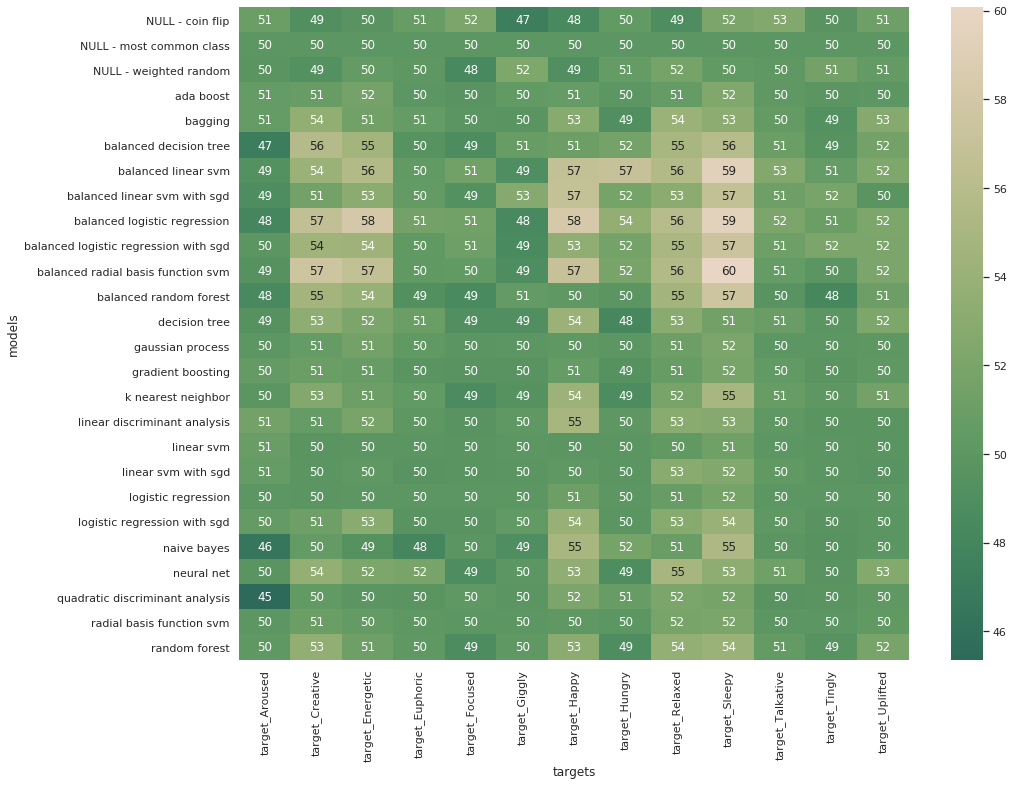

In [63]:
heat_map_0 = pd.pivot_table(cv_results.query('measure == "balanced_accuracy"'), values='mean', index='models',
                    columns='targets', aggfunc=np.sum)

plot, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(heat_map_0, annot=True, ax=ax, center = 50, cmap=sns.cubehelix_palette(start=0, rot=-.70, reverse=True, as_cmap=True))

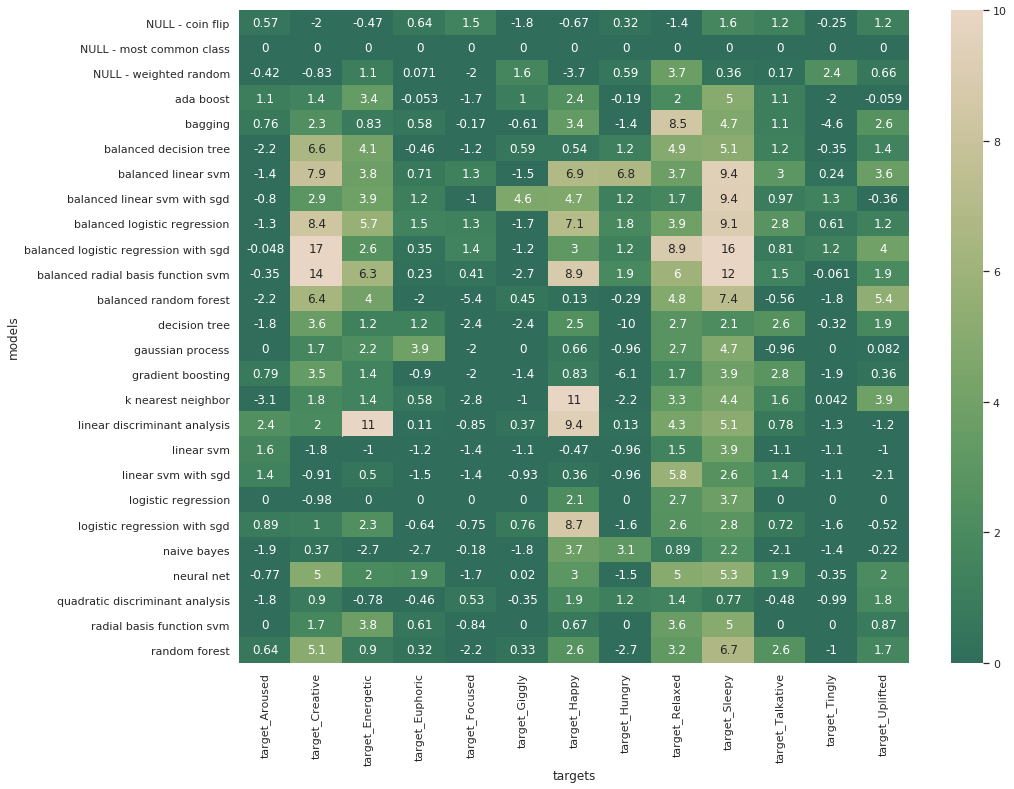

In [28]:
heat_map = (pd.pivot_table(cv_results.query('measure == "balanced_accuracy"'), values='mean', index='models',
                    columns='targets', aggfunc=np.sum) - pd.pivot_table(cv_results.query('measure == "balanced_accuracy"'), values='mean', index='models',
                    columns='targets', aggfunc=np.sum).loc['NULL - most common class'])/pd.pivot_table(cv_results.query('measure == "balanced_accuracy"'), values='se', index='models',
                    columns='targets', aggfunc=np.sum)


plot, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(heat_map.fillna(0), annot=True, ax=ax, vmin=0, center=3, vmax=10, cmap=sns.cubehelix_palette(start=0, rot=-.70, reverse=True, as_cmap=True))

In [29]:
heat_map.fillna(0).T.median().sort_values(ascending=False)

models
balanced linear svm                      3.629560
balanced radial basis function svm       1.883005
neural net                               1.866631
balanced logistic regression             1.812338
k nearest neighbor                       1.420561
balanced logistic regression with sgd    1.374250
balanced linear svm with sgd             1.347196
decision tree                            1.219673
balanced decision tree                   1.198944
ada boost                                1.118034
random forest                            0.897322
bagging                                  0.831596
gradient boosting                        0.789200
linear discriminant analysis             0.775779
logistic regression with sgd             0.762296
radial basis function svm                0.609837
quadratic discriminant analysis          0.528962
NULL - weighted random                   0.356255
NULL - coin flip                         0.324965
balanced random forest                   0.

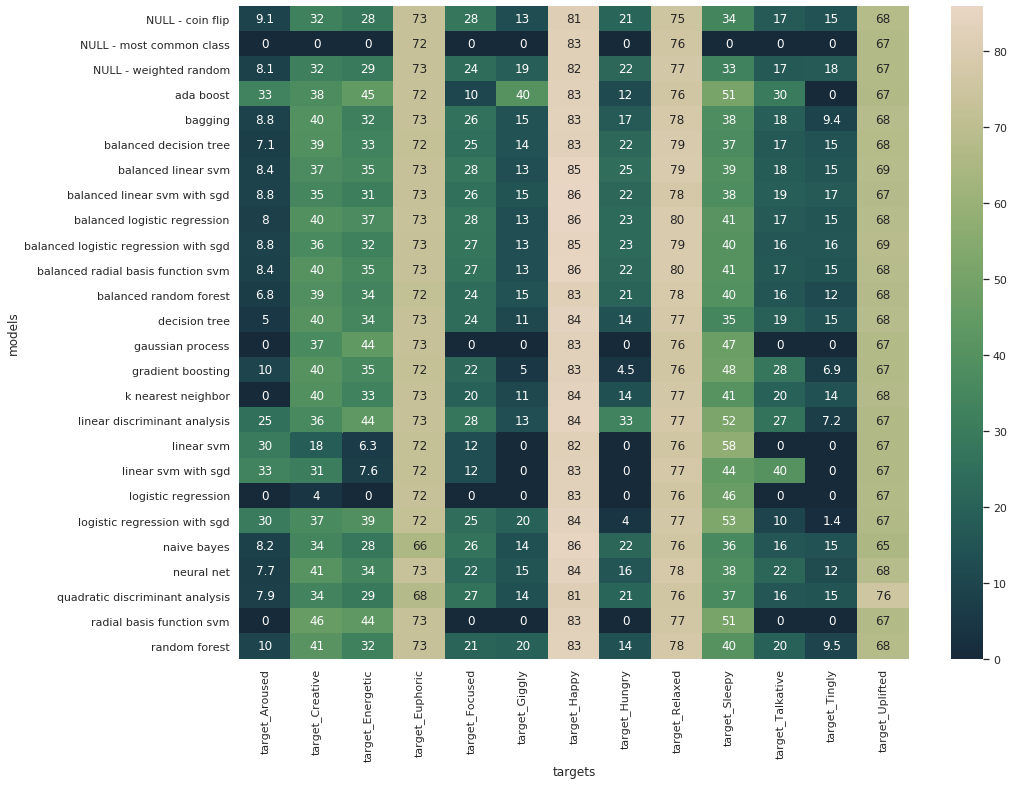

In [30]:
heat_map = pd.pivot_table(cv_results.query('measure == "precision"'), values='mean', index='models',
                    columns='targets', aggfunc=np.sum)
            
plot, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(heat_map.fillna(0), annot=True, ax=ax, cmap=sns.cubehelix_palette(start=0, rot=-.70, reverse=True, as_cmap=True))

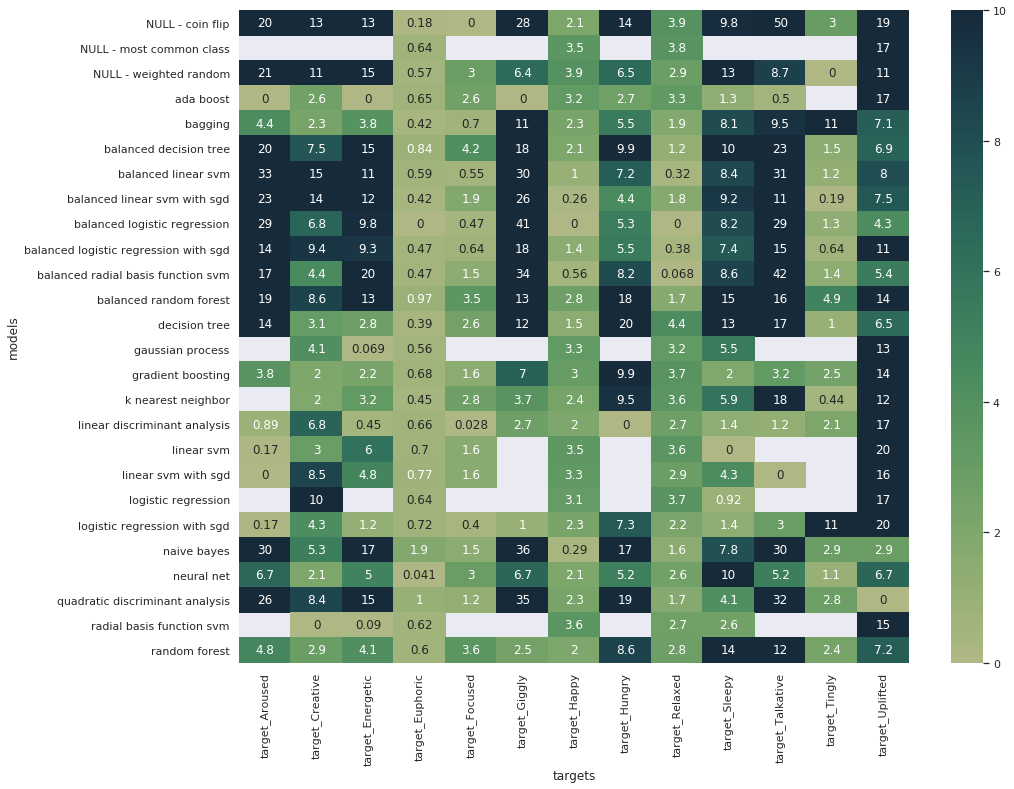

In [31]:
heat_map = (pd.pivot_table(cv_results.query('measure == "precision"'), values='mean', index='models',
                    columns='targets', aggfunc=np.sum).max() - pd.pivot_table(cv_results.query('measure == "precision"'), values='mean', index='models',
                    columns='targets', aggfunc=np.sum))/pd.pivot_table(cv_results.query('measure == "precision"'), values='se', index='models',
                    columns='targets', aggfunc=np.sum)


plot, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(heat_map.fillna(0), annot=True, ax=ax, vmin=0, vmax=10, center=3.5, cmap=sns.cubehelix_palette(start=0, rot=-.70, reverse=False, as_cmap=True))

In [32]:
heat_map.fillna(10).T.median().sort_values(ascending=True)

models
linear discriminant analysis              1.438198
logistic regression with sgd              2.159256
ada boost                                 2.634698
gradient boosting                         3.009375
k nearest neighbor                        3.572568
linear svm                                3.610532
random forest                             3.643205
quadratic discriminant analysis           4.130873
linear svm with sgd                       4.335830
bagging                                   4.355009
decision tree                             4.355472
neural net                                4.968524
naive bayes                               5.263428
balanced logistic regression              5.315331
balanced radial basis function svm        5.428300
NULL - weighted random                    6.491442
balanced logistic regression with sgd     7.405654
balanced linear svm with sgd              7.502236
balanced decision tree                    7.545296
balanced linear svm     

In [134]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import AllKNN

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE

from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek




In [158]:
# sampling trials

In [191]:
feats_train, feats_final_test, targets_train, targets_final_test = train_test_split(features, targets, test_size=0.1, random_state=10)

estimators_to_try = ['ada boost', 'bagging', 'decision tree', 'balanced decision tree', 'gaussian process', 
                     'gradient boosting', 'k nearest neighbor', 'linear discriminant analysis', 
                     'linear svm', 'balanced linear svm', 'linear svm with sgd', 'balanced linear svm with sgd', 'logistic regression', 
                     'balanced logistic regression', 'logistic regression with sgd', 'balanced logistic regression with sgd', 'naive bayes', 'neural net', 
                     'radial basis function svm', 'balanced radial basis function svm', 'random forest', 'balanced random forest',
                     'quadratic discriminant analysis']

samplers_to_try = ['raw data', 'pca42', 'pca36', 'pca30', 'random undersampling', 'tomek links', 'near miss', 'all KNN undersampling', 
                  'random oversampling', 'adasyn', 'smote', 'borderline smote', 'smote enn', 'smote tomek']

seed(10)
kf = KFold(n_splits=5)
kf.get_n_splits(feats_train)

fold_num = 0
models = []
target_of_model = []
samplers = []
cv_results = pd.DataFrame()

for cvtrain_index, cvtest_index in kf.split(feats_train):
    fold_scores = []
    fold_num +=1
    print("fold " + str(fold_num))

    for target_column in targets.columns:
        print('-------------------------------------')
        print(target_column)
        feats_cvtrain_0, feats_cvtest_0 = feats_train.iloc[cvtrain_index], feats_train.iloc[cvtest_index]
        targets_cvtrain_0, targets_cvtest_0 = targets_train.iloc[cvtrain_index][target_column], targets_train.iloc[cvtest_index][target_column]
        
        for s in samplers_to_try:
            print('~~~~~~~~~~~~~~~')
            print('Sampler: ' + s)
            feats_cvtrain = feats_cvtrain_0.copy(deep=True)
            feats_cvtest = feats_cvtest_0.copy(deep=True)
            targets_cvtrain = targets_cvtrain_0.copy(deep=True)
            targets_cvtest = targets_cvtest_0.copy(deep=True)
            
            if s == 'raw data':
                dummy = 0
                
            elif s == 'pca42':
                pca = PCA(n_components=42)
                feats_cvtrain = pca.fit_transform(feats_cvtrain)
                feats_cvtest = pca.transform(feats_cvtest)
            
            elif s == 'pca36':
                pca = PCA(n_components=36)
                feats_cvtrain = pca.fit_transform(feats_cvtrain)
                feats_cvtest = pca.transform(feats_cvtest)
                
            elif s == 'pca30':
                pca = PCA(n_components=30)
                feats_cvtrain = pca.fit_transform(feats_cvtrain)
                feats_cvtest = pca.transform(feats_cvtest)

            elif s == 'random undersampling':
                rus = RandomUnderSampler(random_state=10, replacement=True)
                feats_cvtrain, targets_cvtrain = rus.fit_resample(feats_cvtrain, targets_cvtrain)
                
            elif s == 'tomek links':
                tlus = TomekLinks(n_jobs=-1)
                feats_cvtrain, targets_cvtrain = tlus.fit_resample(feats_cvtrain, targets_cvtrain)

            elif s == 'near miss':
                nmus = NearMiss(n_jobs=-1)
                feats_cvtrain, targets_cvtrain = nmus.fit_resample(feats_cvtrain, targets_cvtrain)

            elif s == 'all KNN undersampling':
                akus = AllKNN(n_jobs=-1)
                feats_cvtrain, targets_cvtrain = akus.fit_resample(feats_cvtrain, targets_cvtrain)
                          
            elif s == 'random oversampling':
                ros = RandomOverSampler(random_state=10)
                feats_cvtrain, targets_cvtrain = ros.fit_resample(feats_cvtrain, targets_cvtrain)

            elif s == 'adasyn':
                aos = ADASYN(random_state=10, n_jobs=-1)
                feats_cvtrain, targets_cvtrain = aos.fit_resample(feats_cvtrain, targets_cvtrain)

            elif s == 'smote':
                sos = SMOTE(random_state=10, n_jobs=-1)
                feats_cvtrain, targets_cvtrain = sos.fit_resample(feats_cvtrain, targets_cvtrain)

            elif s == 'borderline smote':
                bsos = BorderlineSMOTE(random_state=10, n_jobs=-1)
                feats_cvtrain, targets_cvtrain = bsos.fit_resample(feats_cvtrain, targets_cvtrain)

            elif s == 'smote enn':
                seos = SMOTEENN(random_state=10, n_jobs=-1)
                feats_cvtrain, targets_cvtrain = seos.fit_resample(feats_cvtrain, targets_cvtrain)

            elif s == 'smote tomek':
                stos = SMOTETomek(random_state=10, n_jobs=-1)
                feats_cvtrain, targets_cvtrain = stos.fit_resample(feats_cvtrain, targets_cvtrain)
                          
            else:
                print('unsupported sampler!')
                
            print('-')
            print('NULL MODEL - SAMPLE-WEIGHTED RANDOM')
            if fold_num == 1:
                models.append('NULL - weighted random')
                samplers.append(s) 
                target_of_model.append(target_column)
            fold_scores.extend(list(null_model_single('null_rand_draw_single', target_column, targets_cvtest)))
        
            print('-')
            print('NULL MODEL - MOST COMMON CLASS')
            if fold_num == 1:
                models.append('NULL - most common class')
                samplers.append(s)
                target_of_model.append(target_column)
            fold_scores.extend(list(null_model_single('null_common_class_single', target_column, targets_cvtest)))
    
            print('-')
            print('NULL MODEL - COIN FLIP')
            if fold_num == 1:
                models.append('NULL - coin flip')
                samplers.append(s)
                target_of_model.append(target_column)
            fold_scores.extend(list(null_model_single('null_coin_flip_single', target_column, targets_cvtest)))
        
    
            for estimator in estimators_to_try:
                print('-')
                print(estimator + ' - DEFAULT')
                if fold_num == 1:
                    models.append(estimator)
                    samplers.append(s)
                    target_of_model.append(target_column)
                fold_scores.extend(list(estimator_single(estimator, feats_cvtrain, targets_cvtrain, feats_cvtest, targets_cvtest)))
        

    
    cv_results['fold_' + str(fold_num)] = fold_scores
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

cv_results['models'] = [m for mods in models for m in 3*[mods]]
cv_results['measure'] = ['balanced_accuracy', 'precision', 'f-Beta'] * len(models)
cv_results['targets'] = [t for targs in target_of_model for t in 3*[targs]]
cv_results['samplers'] = [s for samps in samplers for s in 3*[samps]]
cv_results['mean'] = list(round(cv_results.T[cv_results.columns.str.contains('fold')].mean(),2))
cv_results['std'] = list(round(cv_results.T[cv_results.columns.str.contains('fold')].std(),2))
cv_results['se'] = cv_results['std']/np.sqrt(fold_num)

fold 1
-------------------------------------
target_Aroused
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221

-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Creative
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Energetic
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Euphoric
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - 

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Focused
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - M

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Giggly
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DE

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


~~~~~~~~~~~~~~~
Sampler: smote tomek
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Happy
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEF

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boos

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - 

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


~~~~~~~~~~~~~~~
Sampler: smote tomek
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Hungry
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAM

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Relaxed
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - D

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLAS

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - 

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Sleepy
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MO

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Talkative
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree -

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


~~~~~~~~~~~~~~~
Sampler: smote tomek
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Tingly
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Uplifted
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - 

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLAS

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


~~~~~~~~~~~~~~~
Sampler: all KNN undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - 

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
fold 2
-------------------------------------
target_Aroused
~~~~~~~~~~~~~~~
Sample

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Creative
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - 

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEI

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Energetic
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree -

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


~~~~~~~~~~~~~~~
Sampler: all KNN undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Euphoric
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - 

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLAS

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


~~~~~~~~~~~~~~~
Sampler: all KNN undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - 

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Focused
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - M

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Giggly
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DE

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Happy
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEF

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLAS

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - 

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Hungry
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MO

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to

-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


~~~~~~~~~~~~~~~
Sampler: smote tomek
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Relaxed
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - D

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - 

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Sleepy
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MO

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLAS

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


~~~~~~~~~~~~~~~
Sampler: smote tomek
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Talkative
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree -

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Tingly
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DE

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Uplifted
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - 

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - 

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
fold 3
-------------------------------------
target_Aroused
~~~~~~~~~~~~~~~
Sample

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Creative
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - 

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


~~~~~~~~~~~~~~~
Sampler: all KNN undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Energetic
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Euphoric
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - 

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLAS

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - 

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Focused
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - M

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


~~~~~~~~~~~~~~~
Sampler: smote tomek
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Giggly
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Happy
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEF

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLAS

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - 

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Hungry
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MO

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Relaxed
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - D

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - 

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Sleepy
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MO

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLAS

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Talkative
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree -

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Tingly
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221

-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Uplifted
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - 

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
fold 4
-------------------------------------
target_Aroused
~~~~~~~~~~~~~~~
Sample

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Creative
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


~~~~~~~~~~~~~~~
Sampler: all KNN undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Energetic
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


~~~~~~~~~~~~~~~
Sampler: smote tomek
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Euphoric
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - 

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Focused
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - M

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Giggly
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Happy
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLAS

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - 

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Hungry
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MO

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Sampler: smote tomek
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Relaxed
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - D

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - 

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Sleepy
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MO

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Talkative
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian proces

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Tingly
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DE

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to

-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Uplifted
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - 

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - 

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
fold 5
-------------------------------------
target_Aroused
~~~~~~~~~~~~~~~
Sample

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Creative
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - 

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


~~~~~~~~~~~~~~~
Sampler: all KNN undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Energetic
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree -

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


~~~~~~~~~~~~~~~
Sampler: all KNN undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Euphoric
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - 

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLAS

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


~~~~~~~~~~~~~~~
Sampler: all KNN undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - 

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Focused
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - M

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


~~~~~~~~~~~~~~~
Sampler: smote tomek
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Giggly
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DE

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to

-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Happy
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boos

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - 

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Hungry
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MO

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


~~~~~~~~~~~~~~~
Sampler: smote tomek
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Relaxed
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - D

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - 

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


~~~~~~~~~~~~~~~
Sampler: smote tomek
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Sleepy
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAM

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Talkative
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree -

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Tingly
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca30
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: tomek links


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


~~~~~~~~~~~~~~~
Sampler: all KNN undersampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


~~~~~~~~~~~~~~~
Sampler: smote tomek
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
-------------------------------------
target_Uplifted
~~~~~~~~~~~~~~~
Sampler: raw data
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca42
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: pca36
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: near miss
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: all KNN undersampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: random oversampling


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: adasyn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - 

/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: borderline smote
-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote enn


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~
Sampler: smote tomek


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-
NULL MODEL - SAMPLE-WEIGHTED RANDOM
-
NULL MODEL - MOST COMMON CLASS
-
NULL MODEL - COIN FLIP
-
ada boost - DEFAULT
-
bagging - DEFAULT
-
decision tree - DEFAULT
-
balanced decision tree - DEFAULT
-
gaussian process - DEFAULT
-
gradient boosting - DEFAULT
-
k nearest neighbor - DEFAULT
-
linear discriminant analysis - DEFAULT
-
linear svm - DEFAULT
-
balanced linear svm - DEFAULT
-
linear svm with sgd - DEFAULT
-
balanced linear svm with sgd - DEFAULT
-
logistic regression - DEFAULT
-
balanced logistic regression - DEFAULT
-
logistic regression with sgd - DEFAULT
-
balanced logistic regression with sgd - DEFAULT
-
naive bayes - DEFAULT
-
neural net - DEFAULT
-
radial basis function svm - DEFAULT
-
balanced radial basis function svm - DEFAULT
-
random forest - DEFAULT
-
balanced random forest - DEFAULT
-
quadratic discriminant analysis - DEFAULT
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


/home/cleber/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [193]:
cv_results.to_csv('./model_survey.csv')

In [194]:
cv_results

fold_1     fold_2     fold_3     fold_4     fold_5  \
0      49.266820  51.616778  50.532842  49.547433  49.542026   
1       7.692308  14.285714  11.111111   6.451613   6.250000   
2       7.772021  13.586957  10.135135   6.493506   6.369427   
3      50.000000  50.000000  50.000000  50.000000  50.000000   
4       0.000000   0.000000   0.000000   0.000000   0.000000   
...          ...        ...        ...        ...        ...   
14191  66.046512  68.281938  66.949153  68.396226  74.235808   
14192  62.610229  65.566836  65.074135  64.330080  70.951586   
14193  50.015754  50.380717  50.679876  48.613117  49.687348   
14194  66.666667  72.727273  71.428571  55.000000  64.285714   
14195   9.677419  12.578616  21.186441  15.320334  13.313609   

                                models            measure          targets  \
0               NULL - weighted random  balanced_accuracy   target_Aroused   
1               NULL - weighted random          precision   target_Aroused   
2               NULL - weighted random             f-Beta   target_Aroused   
3             NULL - most common class  balanced_accuracy   target_Aroused   
4             NULL - most common class          precision   target_Aroused   
...                                ...                ...              ...   
14191           balanced random forest          precision  target_Uplifted   
14192           balanced random forest             f-Beta  target_Uplifted   
14193  quadratic discriminant analysis  balanced_accuracy  target_Uplifted   
14194  quadratic discriminant analysis          precision  target_Uplifted   
14195  quadratic discriminant analysis             f-Beta  target_Uplifted   

          samplers   mean   std        se  
0         raw data  50.10  0.97  0.433797  
1         raw data   9.16  3.47  1.551831  
2         raw data   8.87  3.04  1.359529  
3         raw data  50.00  0.00  0.000000  
4         raw data   0.00  0.00  0.000000  
...            ...    ...   ...       ...  
14191  smote tomek  68.78  3.20  1.431084  
14192  smote tomek  65.71  3.14  1.404251  
14193  smote tomek  49.88  0.80  0.357771  
14194  smote tomek  66.02  7.06  3.157328  
14195  smote tomek  14.42  4.29  1.918546  

[14196 rows x 12 columns]

In [245]:
pd.pivot_table(cv_results.query('measure == "precision"'), values='mean', index=['models','samplers'],
                    columns='targets', aggfunc=np.mean).max().sort_values(ascending=False)

targets
target_Happy        91.35
target_Relaxed      83.02
target_Euphoric     81.56
target_Uplifted     78.45
target_Sleepy       63.04
target_Energetic    48.90
target_Creative     46.43
target_Talkative    44.19
target_Aroused      43.33
target_Giggly       40.00
target_Hungry       33.33
target_Focused      29.50
target_Tingly       27.65
dtype: float64

/home/cleber/miniconda3/lib/python3.7/site-packages/matplotlib/colors.py:972: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/home/cleber/miniconda3/lib/python3.7/site-packages/matplotlib/colors.py:973: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/home/cleber/miniconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


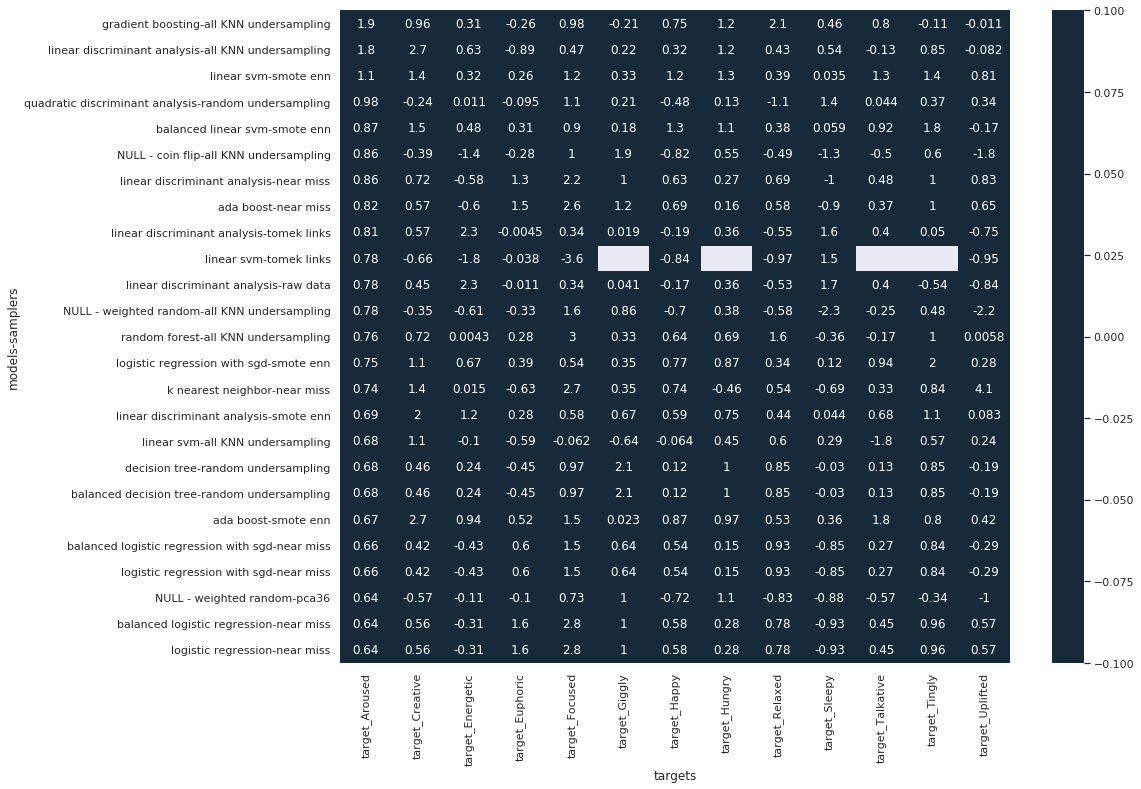

In [240]:
heat_map = (pd.pivot_table(cv_results.query('measure == "precision"'), values='mean', index=['models','samplers'],
                    columns='targets', aggfunc=np.mean) - pd.pivot_table(cv_results.query('measure == "precision"'), values='mean', index=['models','samplers'],
                    columns='targets', aggfunc=np.mean).mean())/pd.pivot_table(cv_results.query('measure == "precision"'), values='std', index=['models','samplers'],
                    columns='targets', aggfunc=np.mean)

heat_map = heat_map.sort_values(by='target_Aroused', ascending=False).head(25)

plot, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(heat_map, annot=True, ax=ax, center = 0, cmap=sns.cubehelix_palette(start=0, rot=-.70, reverse=True, as_cmap=True))

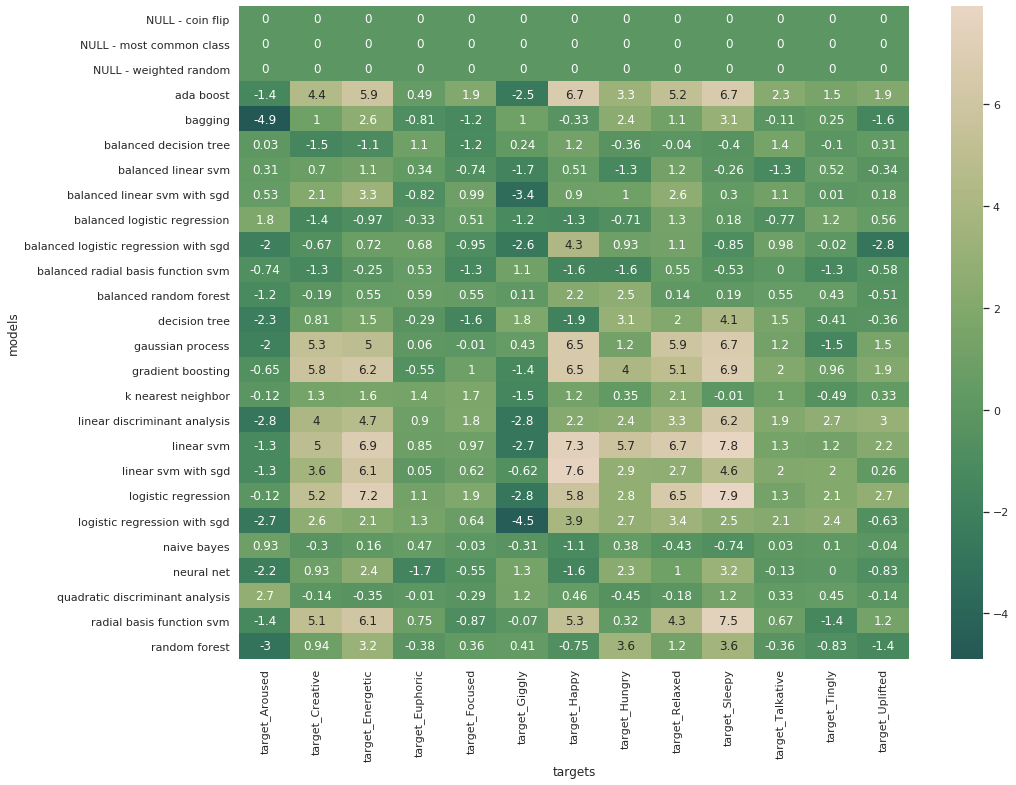

In [156]:
plot, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(heat_map_ros - heat_map_0, annot=True, ax=ax, center = 0, cmap=sns.cubehelix_palette(start=0, rot=-.70, reverse=True, as_cmap=True))

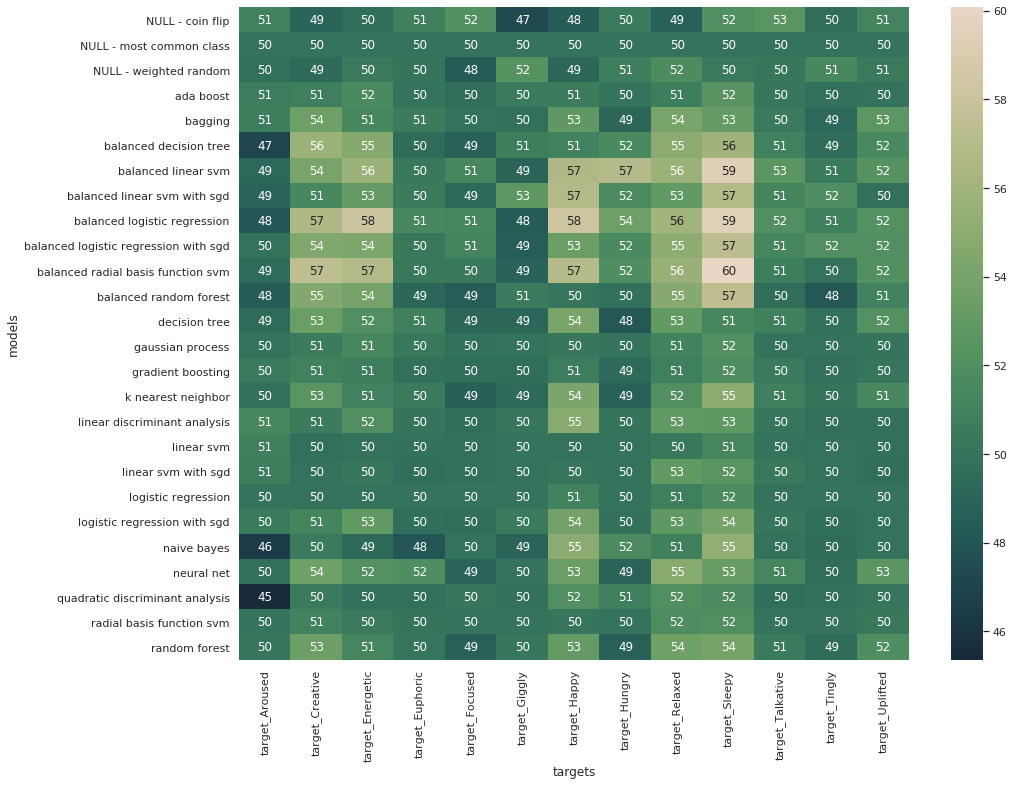

In [149]:
plot, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(heat_map_0, annot=True, ax=ax, cmap=sns.cubehelix_palette(start=0, rot=-.70, reverse=True, as_cmap=True))

In [126]:
heat_map_sos.T.median().sort_values(ascending=False)

models
gaussian process                         53.76
balanced random forest                   52.86
random forest                            52.83
decision tree                            52.79
balanced decision tree                   52.68
logistic regression                      52.44
linear discriminant analysis             52.43
k nearest neighbor                       52.41
balanced logistic regression             52.21
ada boost                                52.15
balanced linear svm with sgd             52.09
gradient boosting                        52.03
neural net                               51.79
bagging                                  51.70
linear svm with sgd                      51.58
balanced radial basis function svm       51.47
balanced logistic regression with sgd    51.44
radial basis function svm                51.44
logistic regression with sgd             51.39
balanced linear svm                      51.25
linear svm                               51.05
NULL -

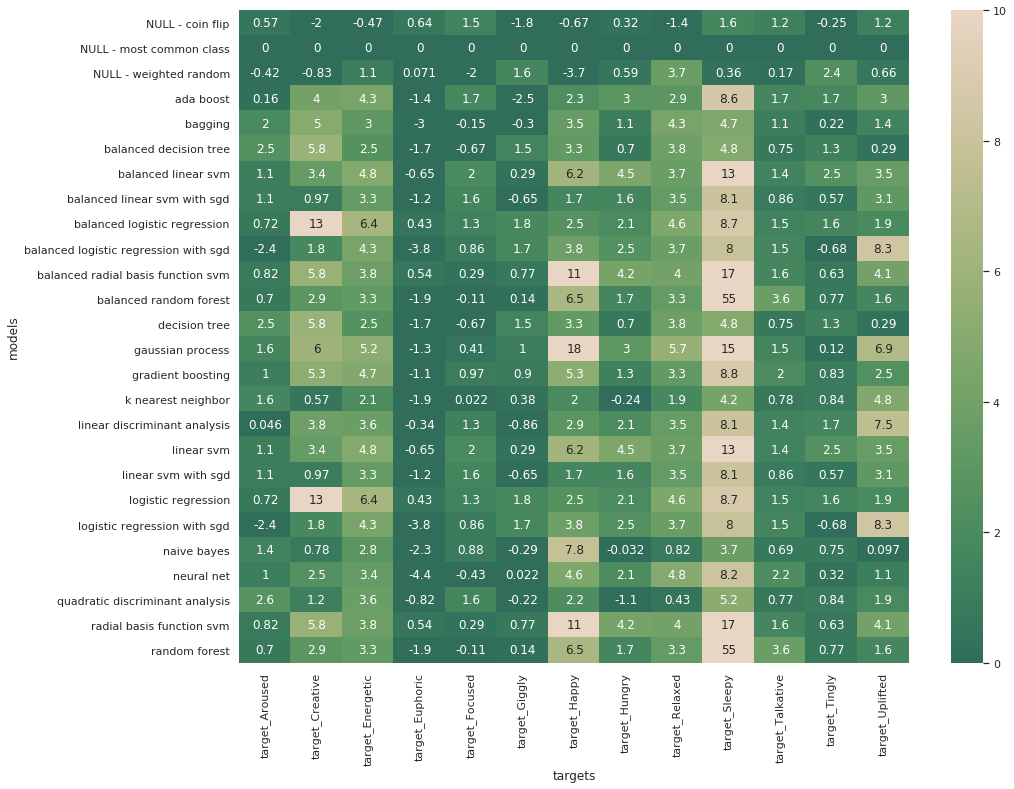

In [55]:
heat_map = (pd.pivot_table(cv_results.query('measure == "balanced_accuracy"'), values='mean', index='models',
                    columns='targets', aggfunc=np.sum) - pd.pivot_table(cv_results.query('measure == "balanced_accuracy"'), values='mean', index='models',
                    columns='targets', aggfunc=np.sum).loc['NULL - most common class'])/pd.pivot_table(cv_results.query('measure == "balanced_accuracy"'), values='se', index='models',
                    columns='targets', aggfunc=np.sum)


plot, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(heat_map.fillna(0), annot=True, ax=ax, vmin=0, center=3, vmax=10, cmap=sns.cubehelix_palette(start=0, rot=-.70, reverse=True, as_cmap=True))

In [56]:
heat_map.fillna(0).T.median().sort_values(ascending=False)

models
balanced radial basis function svm       3.773004
radial basis function svm                3.773004
balanced linear svm                      3.445881
linear svm                               3.445881
gaussian process                         3.036266
ada boost                                2.295924
linear discriminant analysis             2.141586
neural net                               2.112699
gradient boosting                        2.035742
balanced logistic regression             1.926459
logistic regression                      1.926459
logistic regression with sgd             1.795630
balanced logistic regression with sgd    1.795630
balanced random forest                   1.687268
random forest                            1.687268
balanced linear svm with sgd             1.551075
linear svm with sgd                      1.551075
balanced decision tree                   1.521887
decision tree                            1.521887
bagging                                  1.

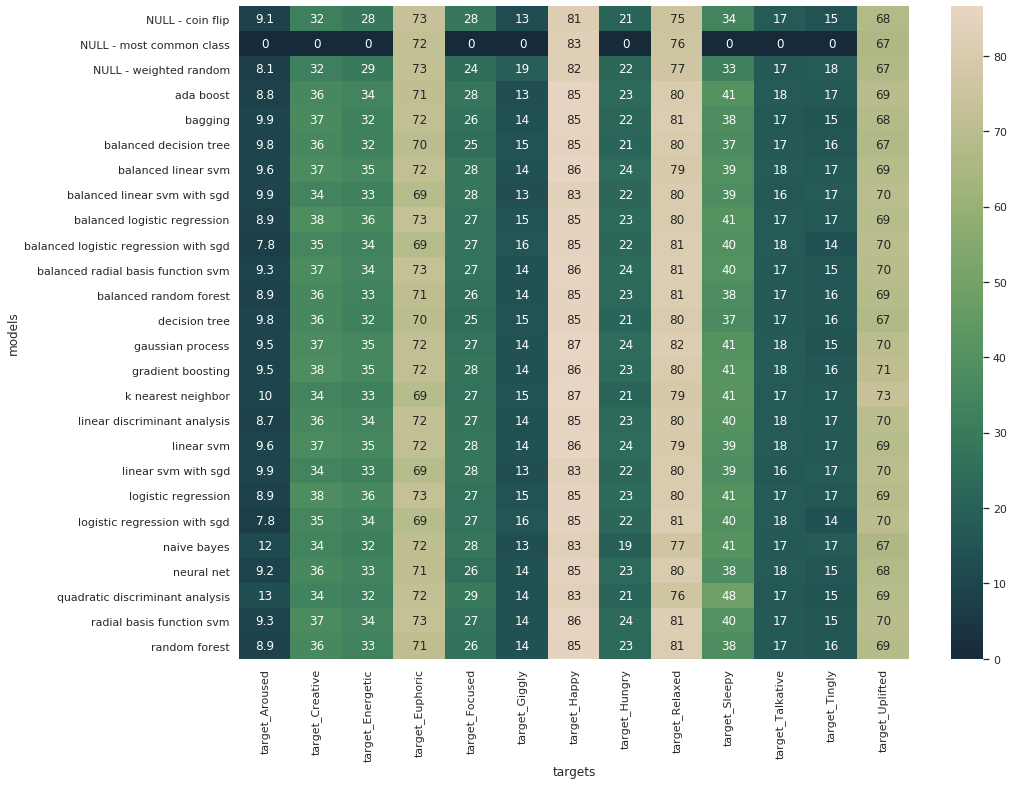

In [57]:
heat_map = pd.pivot_table(cv_results.query('measure == "precision"'), values='mean', index='models',
                    columns='targets', aggfunc=np.sum)
            
plot, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(heat_map.fillna(0), annot=True, ax=ax, cmap=sns.cubehelix_palette(start=0, rot=-.70, reverse=True, as_cmap=True))

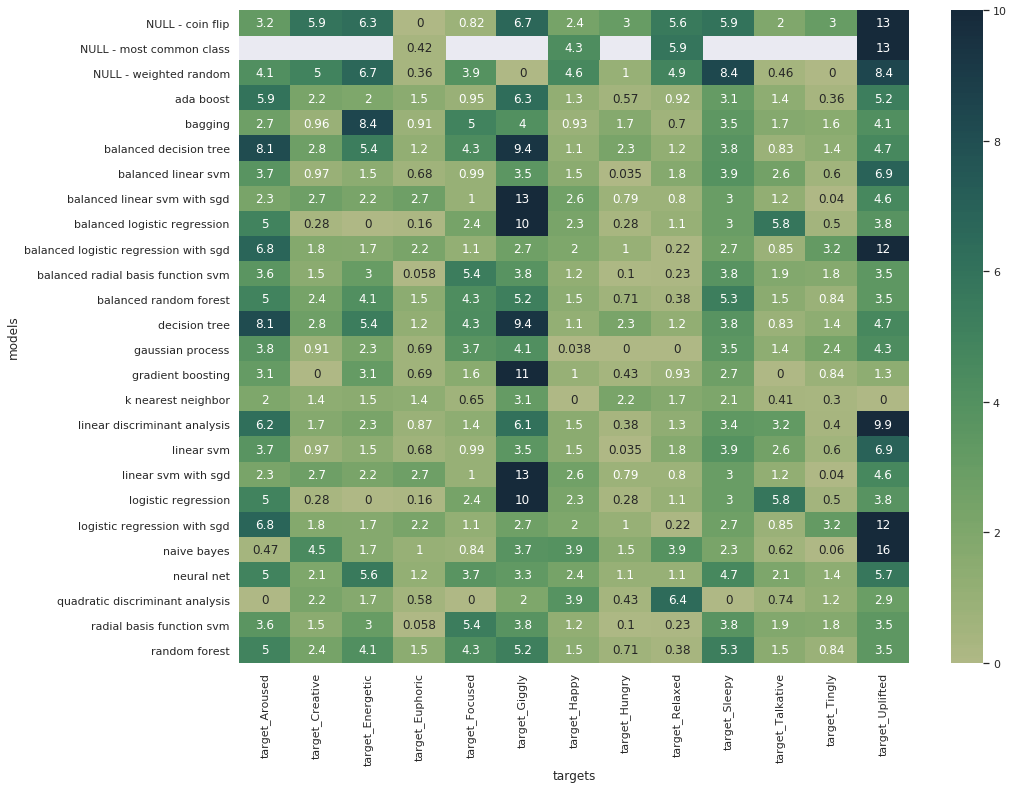

In [58]:
heat_map = (pd.pivot_table(cv_results.query('measure == "precision"'), values='mean', index='models',
                    columns='targets', aggfunc=np.sum).max() - pd.pivot_table(cv_results.query('measure == "precision"'), values='mean', index='models',
                    columns='targets', aggfunc=np.sum))/pd.pivot_table(cv_results.query('measure == "precision"'), values='se', index='models',
                    columns='targets', aggfunc=np.sum)


plot, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(heat_map.fillna(0), annot=True, ax=ax, vmin=0, vmax=10, center=3.5, cmap=sns.cubehelix_palette(start=0, rot=-.70, reverse=False, as_cmap=True))

In [59]:
heat_map.fillna(10).T.median().sort_values(ascending=True)

models
gradient boosting                        1.012807
quadratic discriminant analysis          1.216271
k nearest neighbor                       1.368292
ada boost                                1.502223
linear svm                               1.507462
balanced linear svm                      1.507462
linear discriminant analysis             1.698831
naive bayes                              1.729641
bagging                                  1.732660
balanced radial basis function svm       1.937926
radial basis function svm                1.937926
logistic regression with sgd             2.020667
balanced logistic regression with sgd    2.020667
logistic regression                      2.298528
balanced logistic regression             2.298528
balanced linear svm with sgd             2.302486
linear svm with sgd                      2.302486
gaussian process                         2.323757
neural net                               2.397711
balanced random forest                   2.

In [ ]:
def estimator_single_hp(estimator, feats_train, targets_train, feats_test, targets_test, hyperparameters):
    
    if estimator == 'ada boost':
        est = AdaBoostClassifier(**hyperparameters)
    
    elif estimator == 'bagging':
        est = BaggingClassifier(**hyperparameters)
    
    elif estimator == 'decision tree':
        est = DecisionTreeClassifier(**hyperparameters)
    
    elif estimator == 'gaussian process':
        est = GaussianProcessClassifier(**hyperparameters)
    
    elif estimator == 'gradient boosting':
        est = GradientBoostingClassifier(**hyperparameters)
    
    elif estimator == 'k nearest neighbor':
        est = KNeighborsClassifier(**hyperparameters)
        
    elif estimator == 'linear discriminant analysis':
        est = LinearDiscriminantAnalysis(**hyperparameters)
        
    elif estimator == 'linear svm':
        est = SVC(**hyperparameters)
        
    elif estimator == 'linear svm with sgd':
        est = SGDClassifier(**hyperparameters)
        
    elif estimator == 'logistic regression':
        est = LogisticRegressionCV(**hyperparameters)
        
    elif estimator == 'logistic regression with sgd':
        est = SGDClassifier(**hyperparameters)

    elif estimator == 'naive bayes':
        est = GaussianNB(**hyperparameters)
        
    elif estimator == 'neural net':
        est = MLPClassifier(**hyperparameters)
        
    elif estimator == 'radial basis function svm':
        est = SVC(**hyperparameters)
        
    elif estimator == 'random forest':
        est = RandomForestClassifier(**hyperparameters)
        
    elif estimator == 'quadratic discriminant analysis':
        est = QuadraticDiscriminantAnalysis(**hyperparameters)
     
    else:
        est = 0
        print('unsupported estimator, please try again')
        print('CURRENTLY SUPPORTED: ada boost, bagging, decision tree, gaussian process, gradient boosting, k nearest neighbor, linear discriminant analysis, linear svm, linear svm with sgd, logistic regression, logistic regression with sgd, naive bayes, neural net, radial basis function svm, random forest, quadratic discriminant analysis')
    
    est.fit(feats_train, targets_train)
    targets_test_pred = est.predict(feats_test)
    accuracy = 100 * metrics.accuracy_score(targets_test, targets_test_pred)
    precision = 100 * metrics.precision_score(targets_test, targets_test_pred)
    fB = 100 * metrics.fbeta_score(targets_test, targets_test_pred, beta=0.5)
    
    return accuracy, precision, fB

In [ ]:
#hyper parameters for linear discriminant analysis

hyperparameters_lda = []

In [ ]:
len(list(itertools.product(*hyperparameters_vals)))

In [ ]:
feats_train, feats_final_test, targets_train, targets_final_test = train_test_split(features, targets, test_size=0.1, random_state=10)

estimator = 'linear discrimnant analysis'

seed(10)
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(feats_train, targets_train)

fold_num = 0
models = []
target_of_model = []
cv_results = pd.DataFrame()

for cvtrain_index, cvtest_index in kf.split(feats_train):
    fold_scores = []
    fold_num +=1
    print("fold " + str(fold_num))

    for target_column in targets.columns:
        print('-------------------------------------')
        print(target_column)
        if fold_num == 1:
            target_of_model.append(target_column)
        feats_cvtrain, feats_cvtest = feats_train.iloc[cvtrain_index], feats_train.iloc[cvtest_index]
        targets_cvtrain, targets_cvtest = targets_train.iloc[cvtrain_index][target_column], targets_train.iloc[cvtest_index][target_column]
    
#         print('-')
#         print('NULL MODEL - SAMPLE-WEIGHTED RANDOM')
        if fold_num == 1:
            models.append('NULL - weighted random')
        fold_scores.extend(list(null_model_single('null_rand_draw_single', target_column, targets_cvtest)))
    
#         print('-')
#         print('NULL MODEL - COIN FLIP')
        if fold_num == 1:
            models.append('NULL - coin flip')
        fold_scores.extend(list(null_model_single('null_coin_flip_single', target_column, targets_cvtest)))
        
    
#       print('-')
#       print(estimator + ' - DEFAULT')
        if fold_num == 1:
            models.append(estimator)
        fold_scores.extend(list(estimator_single(estimator, feats_cvtrain, targets_cvtrain, feats_cvtest, targets_cvtest)))
        
#     model_hp_record = []
#     hps = list(rf.get_params().keys())
    hp_search_mod_num = 0
    for model_val_set in list(itertools.product(*hyperparameters_vals)):
        hp_search_mod_num +=1
        model_hp_record.append(('model_hp_' + str(hp_search_mod_num), model_val_set))
        hyperparams = dict(zip(hps, model_val_set))
        print('-')
        print('RANDOM FOREST - model_' + str(hp_search_mod_num))
        if fold_num == 1:
            models.append('model_' + str(hp_search_mod_num))
        fold_scores.extend(list(RF_single_hps(feats_cvtrain, targets_cvtrain, feats_cvtest, targets_cvtest, hyperparams)))
    
    cv_results['fold_' + str(fold_num)] = fold_scores
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

cv_results['models'] = [m for mods in models for m in 3*[mods]]
cv_results['measure'] = ['accuracy', 'precision', 'f-Beta'] * len(models)
cv_results['targets'] = [t for targs in target_of_model for t in (len(estimators_to_try)+2)*3*[targs]]
cv_results['mean'] = list(round(cv_results.T[cv_results.columns.str.contains('fold')].mean(),2))
cv_results['std'] = list(round(cv_results.T[cv_results.columns.str.contains('fold')].std(),2))
cv_results['se'] = cv_results['std']/np.sqrt(fold_num)

In [ ]:
seed(10)
kf = KFold(n_splits=5)
kf.get_n_splits(feats_train)

fold_num = 0
models = []
cv_results = pd.DataFrame()

for cvtrain_index, cvtest_index in kf.split(feats_train):
    fold_scores = []
    fold_num +=1
    print("fold " + str(fold_num))
    feats_cvtrain, feats_cvtest = feats_train.iloc[cvtrain_index], feats_train.iloc[cvtest_index]
    targets_cvtrain, targets_cvtest = targets_train.iloc[cvtrain_index], targets_train.iloc[cvtest_index]
    
    print('size of test set: ' + str(len(feats_cvtest)))
    
    print('-')
    print('NULL MODEL - SAMPLE-WEIGHTED RANDOM')
    if fold_num == 1:
        models.append('model_0')
    fold_scores.extend(list(null_model_single('null_rand_draw_single', target_column, targets_cvtest)))
    
    print('-')
    print('NULL MODEL - COIN FLIP')
    if fold_num == 1:
        models.append('model_00')
    fold_scores.extend(list(null_model_single('null_coin_flip_single', target_column, targets_cvtest)))
        
    print('-')
    print('RANDOM FOREST - DEFAULT')
    
    if fold_num == 1:
        models.append('model_1')
    fold_scores.extend(list(RF_single(feats_cvtrain, targets_cvtrain, feats_cvtest, targets_cvtest)))
    
    model_hp_record = []
    rf = RandomForestClassifier()
    hps = list(rf.get_params().keys())
    hp_search_mod_num = 1
    for model_val_set in list(itertools.product(*hyperparameters_vals)):
        hp_search_mod_num +=1
        model_hp_record.append(('model_' + str(hp_search_mod_num), model_val_set))
        hyperparams = dict(zip(hps, model_val_set))
        print('-')
        print('RANDOM FOREST - model_' + str(hp_search_mod_num))
        if fold_num == 1:
            models.append('model_' + str(hp_search_mod_num))
        fold_scores.extend(list(RF_single_hps(feats_cvtrain, targets_cvtrain, feats_cvtest, targets_cvtest, hyperparams)))
    
    cv_results['fold_' + str(fold_num)] = fold_scores
    
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

cv_results['models'] = [m for mods in models for m in 3*[mods]]
cv_results['measure'] = ['accuracy', 'precision', 'recall'] * len(models)
cv_results['mean'] = list(round(cv_results.T[cv_results.columns.str.contains('fold')].mean(),2))
cv_results['std'] = list(round(cv_results.T[cv_results.columns.str.contains('fold')].std(),2))


In [ ]:
#cv_results

In [ ]:
pt = pd.pivot_table(cv_results, values='mean', index='models',
                    columns='measure', aggfunc=np.sum)

In [ ]:
hp_lookup = pd.DataFrame()
for x in range(len(model_hp_record)):
    hp_lookup[model_hp_record[x][0]] = list(model_hp_record[x][1])
hp_lookup.index = hps

for hp in hps:
    if len(hp_lookup.loc[hp].unique()) == 1:
        hp_lookup = hp_lookup.drop([hp], axis=0)
    

In [ ]:
results = pd.concat([pt,hp_lookup.T], axis=1).sort_values(by='precision', ascending=False)

In [ ]:
results[results['precision'] > 41.07 ]

In [ ]:
cv_results[cv_results['models'] == 'model_1']

In [ ]:
# MULTI-OUTPUT

In [ ]:
#leave out test data for final evaluation
feats_train, feats_final_test, targets_train, targets_final_test = train_test_split(features, targets, test_size=0.09, random_state=10)
print('size of final test set: ' + str(len(feats_final_test)))

In [ ]:
def null_rand_draw(test_samp_size):
    preds = []
    for x in range(test_samp_size):
        randpred = list(np.random.choice(a = list((np.sum(targets)/np.sum(np.sum(targets))).index), size = 5, replace = False, p = list((np.sum(targets)/np.sum(np.sum(targets))).values)))
        preds.append([1 if target in randpred else 0 for target in list(targets.columns)])
    return preds

In [ ]:
def null_top_5(test_samp_size):
    top5 = list(np.sum(targets).sort_values(ascending = False).head(5).index)
    preds = [[1 if target in top5 else 0 for target in list(targets.columns)]] * test_samp_size
    return preds

In [ ]:
def null_model(model, targets_test):
    if model == 'null_rand_draw':
        targets_test_pred = null_rand_draw(len(targets_test))
    elif model == 'null_top_5':
        targets_test_pred = null_top_5(len(targets_test))
    else:
        print('unsupported model, please try again.')
        

    scores = []
    for x in targets_test.values - targets_test_pred:
        scores.append(list(x).count(0))
#     print('subset accuracy: ' + str(round(scores.count(len(targets.columns))/len(scores)*100, 2)) + '%')
    subset_accuracy = scores.count(len(targets.columns))/len(scores)*100

#     print('coverage error: ' + str(round(coverage_error(targets_test, targets_test_pred), 2)))
    coverage_error_score = coverage_error(targets_test, targets_test_pred)

    scores = []
    for x in targets_test.values + targets_test_pred:
        scores.append(list(x).count(2))
#     print('avg number of correct labels: ' + str(round(np.mean(scores), 2)))
    avg_num_correct_labels = np.mean(scores)
    
    return subset_accuracy, coverage_error_score, avg_num_correct_labels

In [ ]:
def RF_3x_metrics(feats_train, targets_train, feats_test, targets_test):
    
    rf = RandomForestClassifier(random_state=10)
    rf.fit(feats_train, targets_train)
#     print('subset accuracy: ' + str(round(100 * rf.score(feats_test, targets_test), 2)) + '%')
    subset_accuracy = 100 * rf.score(feats_test, targets_test)

    targets_test_pred = rf.predict(feats_test)
#     print('coverage error: ' + str(round(coverage_error(targets_test, targets_test_pred), 2)))
    coverage_error_score = coverage_error(targets_test, targets_test_pred)

    scores = []
    for x in targets_test.values + targets_test_pred:
        scores.append(list(x).count(2))
#     print('avg number of correct labels: ' + str(round(np.mean(scores), 2)))
    avg_num_correct_labels = np.mean(scores)
    
    return subset_accuracy, coverage_error_score, avg_num_correct_labels


In [ ]:
kf = KFold(n_splits=10)
kf.get_n_splits(feats_train)

fold_num = 0
models = []
cv_results = pd.DataFrame()

for cvtrain_index, cvtest_index in kf.split(feats_train):
    fold_scores = []
    fold_num +=1
    print("fold " + str(fold_num))
    feats_cvtrain, feats_cvtest = feats_train.iloc[cvtrain_index], feats_train.iloc[cvtest_index]
    targets_cvtrain, targets_cvtest = targets_train.iloc[cvtrain_index], targets_train.iloc[cvtest_index]
    
    print('size of test set: ' + str(len(feats_cvtest)))
    
    print('-')
    print('NULL MODEL - SAMPLE-WEIGHTED RANDOM')
    if fold_num == 1:
        models.append('model_0')
    fold_scores.extend(list(null_model('null_rand_draw', targets_cvtest)))
    
    print('-')
    print('NULL MODEL - SELECT TOP 5 TARGETS')
    if fold_num == 1:
        models.append('model_00')
    fold_scores.extend(list(null_model('null_top_5', targets_cvtest)))
        
    print('-')
    print('RANDOM FOREST - DEFAULT')
    if fold_num == 1:
        models.append('model_1')
    fold_scores.extend(list(RF_3x_metrics(feats_cvtrain, targets_cvtrain, feats_cvtest, targets_cvtest)))
    
    cv_results['fold_' + str(fold_num)] = fold_scores
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

cv_results['models'] = [m for mods in models for m in 3*[mods]]
cv_results['measure'] = ['subset_accuracy', 'coverage_error', 'avg_num_correct_labels'] * len(models)
cv_results['mean'] = list(round(cv_results.T[cv_results.columns.str.contains('fold')].mean(),2))
cv_results['std'] = list(round(cv_results.T[cv_results.columns.str.contains('fold')].std(),2))

In [ ]:
cv_results

In [ ]:
pd.pivot_table(cv_results, values='mean', index='models',
                    columns='measure', aggfunc=np.sum)

19 parameters!! Luckily, we do not need to optimize for some of them:

'n_jobs': None, -1 (all)
for running in parallel

'oob_score': False,
measure of generalization accuracy

'random_state': 10,
'verbose': 0,
'warm_start': False
'min_weight_fraction_leaf': 0.0,

'bootstrap': True
use bootstrap to select which samples are used in tree




In [ ]:
rf.get_params()

In [ ]:
def RF_3x_metrics_hps(feats_train, targets_train, feats_test, targets_test, hyperparameters):
    
    rf = RandomForestClassifier(**hyperparameters)
    rf.fit(feats_train, targets_train)
#     print('subset accuracy: ' + str(round(100 * rf.score(feats_test, targets_test), 2)) + '%')
    subset_accuracy = 100 * rf.score(feats_test, targets_test)

    targets_test_pred = rf.predict(feats_test)
#     print('coverage error: ' + str(round(coverage_error(targets_test, targets_test_pred), 2)))
    coverage_error_score = coverage_error(targets_test, targets_test_pred)

    scores = []
    for x in targets_test.values + targets_test_pred:
        scores.append(list(x).count(2))
#     print('avg number of correct labels: ' + str(round(np.mean(scores), 2)))
    avg_num_correct_labels = np.mean(scores)
    
    return subset_accuracy, coverage_error_score, avg_num_correct_labels

In [ ]:
# bootstrap_vals = [True]
# ccp_alpha_vals = [0.0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
# class_weight_vals = [None, 'balanced', 'balanced_subsample']
# criterion_vals = ['gini', 'entropy']
# max_depth_vals = [None, 1, 2, 3, 5, 8]
# max_features_vals = [3, 5, 8, 12]
# max_leaf_nodes_vals = [None, 25, 50, 100, 200, 500, 1000]
# max_samples_vals = [None]
# min_impurity_decrease_vals = [0.0]
# min_impurity_split_vals = [None]
# min_samples_leaf_vals = [1, 3, 5]
# min_samples_split_vals = [2, 6, 10, 20]
# min_weight_fraction_leaf_vals = [0.0]
# n_estimators_vals = [50, 100, 500, 1000, 5000]
# n_jobs_vals = [6]
# oob_score_vals = [False]
# random_state_vals = [10]
# verbose_vals = [0]
# warm_start_vals = [False]

bootstrap_vals = [True]
ccp_alpha_vals = [0.0005, 0.0007, 0.001, 0.0015, 0.002, 20, 25, 30]
class_weight_vals = [None]
criterion_vals = ['entropy']
max_depth_vals = [None]
max_features_vals = ['auto']
max_leaf_nodes_vals = [None]
max_samples_vals = [None]
min_impurity_decrease_vals = [0.0]
min_impurity_split_vals = [None]
min_samples_leaf_vals = [1]
min_samples_split_vals = [2]
min_weight_fraction_leaf_vals = [0.0]
n_estimators_vals = [100]
n_jobs_vals = [6]
oob_score_vals = [False]
random_state_vals = [10]
verbose_vals = [0]
warm_start_vals = [False]

hyperparameters_vals = [bootstrap_vals, ccp_alpha_vals, class_weight_vals, \
                        criterion_vals, max_depth_vals, max_features_vals, \
                        max_leaf_nodes_vals, max_samples_vals, min_impurity_decrease_vals, \
                        min_impurity_split_vals, min_samples_leaf_vals, min_samples_split_vals, \
                        min_weight_fraction_leaf_vals, n_estimators_vals, n_jobs_vals, \
                        oob_score_vals, random_state_vals, verbose_vals, warm_start_vals]\


In [ ]:
len(list(itertools.product(*hyperparameters_vals)))


In [ ]:
kf = KFold(n_splits=10)
kf.get_n_splits(feats_train)

fold_num = 0
models = []
cv_results = pd.DataFrame()
rf = RandomForestClassifier()

for cvtrain_index, cvtest_index in kf.split(feats_train):
    fold_scores = []
    fold_num +=1
    print("fold " + str(fold_num))
    feats_cvtrain, feats_cvtest = feats_train.iloc[cvtrain_index], feats_train.iloc[cvtest_index]
    targets_cvtrain, targets_cvtest = targets_train.iloc[cvtrain_index], targets_train.iloc[cvtest_index]
    
    print('size of test set: ' + str(len(feats_cvtest)))
    
    print('-')
    print('NULL MODEL - SAMPLE-WEIGHTED RANDOM')
    if fold_num == 1:
        models.append('model_0')
    fold_scores.extend(list(null_model('null_rand_draw', targets_cvtest)))
    
    print('-')
    print('NULL MODEL - SELECT TOP 5 TARGETS')
    if fold_num == 1:
        models.append('model_00')
    fold_scores.extend(list(null_model('null_top_5', targets_cvtest)))
        
    print('-')
    print('RANDOM FOREST - DEFAULT')
    if fold_num == 1:
        models.append('model_1')
    fold_scores.extend(list(RF_3x_metrics(feats_cvtrain, targets_cvtrain, feats_cvtest, targets_cvtest)))
    
    model_hp_record = []
    hps = list(rf.get_params().keys())
    hp_search_mod_num = 1
    for model_val_set in list(itertools.product(*hyperparameters_vals)):
        hp_search_mod_num +=1
        model_hp_record.append(('model_' + str(hp_search_mod_num), model_val_set))
        hyperparams = dict(zip(hps, model_val_set))
        print('-')
        print('RANDOM FOREST - model_' + str(hp_search_mod_num))
        if fold_num == 1:
            models.append('model_' + str(hp_search_mod_num))
        fold_scores.extend(list(RF_3x_metrics_hps(feats_cvtrain, targets_cvtrain, feats_cvtest, targets_cvtest, hyperparams)))
        
        
    
    cv_results['fold_' + str(fold_num)] = fold_scores
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

cv_results['models'] = [m for mods in models for m in 3*[mods]]
cv_results['measure'] = ['subset_accuracy', 'coverage_error', 'avg_num_correct_labels'] * len(models)
cv_results['mean'] = list(round(cv_results.T[cv_results.columns.str.contains('fold')].mean(),2))
cv_results['std'] = list(round(cv_results.T[cv_results.columns.str.contains('fold')].std(),2))

In [ ]:
cv_results

In [ ]:
pd.pivot_table(cv_results, values='mean', index='models',
                    columns='measure', aggfunc=np.sum).sort_values(by='avg_num_correct_labels', ascending = False)

In [ ]:
cv_results_top = pd.DataFrame()

In [ ]:
cv_results_top['model_1'] = list(rf.get_params().values())

In [ ]:
model_number = 7
print('model_' + str(model_number))
list(itertools.product(*hyperparameters_vals))[model_number - 2]
cv_results_top['model_' + str(model_number)] = list(itertools.product(*hyperparameters_vals))[model_number - 2]
#hyperparams = dict(zip(hps, list(itertools.product(*hyperparameters_vals))[model_number - 2]))
#hyperparams


In [ ]:
cv_results_top.index = hps

In [ ]:
cv_results_top

In [ ]:
model_hp_record

In [ ]:
cv_results

In [ ]:
#generate df of conditional probabilities between all pairs
probs = []
ratios = []
labels = []
event = []
cond_event = []
event_base = []
for A in features.columns:
    for B in features.columns:
        print('Pr(' + B + ' | ' + A + ')')
        event.append(B)
        cond_event.append(A)
        labels.append('Pr(' + B + ' | ' + A + ')')
        print(features[features[A] == 1].sum()[B]/features[features[A] == 1].sum()[A])
        probs.append(features[features[A] == 1].sum()[B]/features[features[A] == 1].sum()[A])
        ratios.append((features[features[A] == 1].sum()[B]/features[features[A] == 1].sum()[A])/(len(features[(features[B] == 1)])/len(features)))
        event_base.append(features.sum()[B]/len(features))

In [ ]:
Pr_data = pd.DataFrame()
Pr_data['labels'] = labels
Pr_data['events'] = event
Pr_data['cond_events'] = cond_event
Pr_data['probs'] = probs
Pr_data['event_base'] = event_base
Pr_data['ratios'] = ratios


Pr_data#[(Pr_data['probs'] < 1) & (Pr_data['events'] == 'feature_Apple')].sort_values(by='ratios', ascending=False).head(50)

In [ ]:
probs = []
labels = []
event = []
cond_eventA = []
cond_eventC = []
for A in features.columns:
    for B in features.columns:
        for C in features.columns:
            print('Pr(' + B + ' | ' + A + ',' + C +')')
            event.append(B)
            cond_eventA.append(A)
            cond_eventC.append(C)
            labels.append('Pr(' + B + ' | ' + A + ',' + C +')')
            num = len(features[(features[A] == 1) & (features[B] == 1) & (features[C] == 1)])/len(features)
            denom = ((len(features[(features[A] == 1) & (features[C] == 1)])+1)/len(features))

            print(num/denom)
            probs.append(num/denom)




In [ ]:
Pr_data_2 = pd.DataFrame()
Pr_data_2['labels'] = labels
Pr_data_2['events'] = event
Pr_data_2['cond_events_A'] = cond_eventA
Pr_data_2['cond_events_C'] = cond_eventC
Pr_data_2['probs'] = probs

Pr_data_2

In [ ]:
len(features[(features[A] == 1)])/2000
len(features[(features[A] == 1)])/len(features)

In [ ]:
A = 'feature_Vanilla'
C = 'feature_Coffee'
B = 'feature_Sweet'
num = len(features[(features[A] == 1) & (features[B] == 1) & (features[C] == 1)])/len(features)
denom = ((len(features[(features[A] == 1) & (features[C] == 1)])+1)/len(features))

print(num)
print(denom)

print(num/denom)

In [ ]:
len(features[(features[A] == 1) & (features[C] == 1)])+1

In [ ]:
# bayes 1 - Pr(B|A) = Pr(A and B) / Pr(A) 
num = (features[features[A] == 1].sum()[A]/len(features))*(features[features[B] == 1].sum()[B]/len(features))
denom = (features[features[A] == 1].sum()[A]/len(features))
num/denom

In [ ]:
# bayes 1 alt - Pr(B|A) = Pr(A and B) / Pr(A) 
num = len(features[(features[A] == 1) & (features[B] == 1)])/len(features)
denom = (len(features[features[A] == 1])/len(features))
num/denom


In [ ]:
# bayes 2 - Pr(B|A) = Pr(A|B) * Pr(B) / Pr(A|B) * Pr(B) + Pr(A|Bc) * Pr(Bc)
num = (features[features[B] == 1].sum()[A]/features[features[B] == 1].sum()[B]) * (len(features[features[B] == 1])/len(features))
denom = num + ((features[features[B] == 0].sum()[A]/len(features[features[B] == 0])) * (len(features[features[B] == 0])/len(features)))
num/denom

In [ ]:
#ISSUE: does not account base frequency (most instances of B might not also have A, but that might be because A is just not very frequent!)
Pr(A) * Pr(A|B)/Pr(Ac|B) * Pr(A|C)/Pr(Ac|C) * Pr(A|D)/Pr(Ac|D) * Pr(A|B,C)/Pr(Ac|B,C) * Pr(A|B,D)/Pr(Ac|B,D) * Pr(A|C,D)/Pr(Ac|C,D) 